# <b> *Loan Default Risk Analysis using Exploratory Data Analysis (EDA)*
- This case study aims to identify patterns which indicate if a client has difficulty paying their instalments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.
- Identification of such applicants using EDA is the aim of this case study.
- the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  

### <b><b>APPLICATION DATASET:

>### Importing Libraries

In [4]:
#importing Libraries
import pandas as pd,numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

>### Loading and Understanding The Dataset

In [8]:
df = pd.read_csv('application_data.csv')
df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [10]:
df.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868  -16036.995067   63815.045904   
std                      0.013831    4363.988632  141275.766519   
min                      0.000290  -25229.000000  -17912.000000   
25%                      0.010006  -19682.000000   -2760.000000   
50%                      0.018850  -15750.000000   -1213.000000   
75%                      0.028663  -12413.000000    -289.000000   
max                      0.072508   -7489.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH    OWN_CAR_AGE     FLAG_MOBIL  \
count      307511.000000    307511.000000  104582.000000  307511.000000   
mean        -4986.120328     -2994.202373      12.061091       0.999997   
std          3522.886321      1509.450419      11.944812       0.001803   
min        -24672.000000     -7197.000000       0.000000       0.000000   
25%         -7479.500000     -4299.000000       5.000000       1.000000   
50%         -4504.000000     -3254.000000       9.000000       1.000000   
75%         -2010.000000     -1720.000000      15.000000       1.000000   
max             0.000000         0.000000      91.000000       1.000000   

       FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE  \
count   307511.000000    307511.000000     307511.000000  307511.000000   
mean         0.819889         0.199368          0.998133       0.281066   
std          0.384280         0.399526          0.043164       0.449521   
min          0.000000         0.000000          0.000000       0.000000   
25%          1.000000         0.000000          1.000000       0.000000   
50%          1.000000         0.000000          1.000000       0.000000   
75%          1.000000         0.000000          1.000000       1.000000   
max          1.000000         1.000000          1.000000       1.000000   

          FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count  307511.000000    307509.000000         307511.000000   
mean        0.056720         2.152665              2.052463   
std         0.231307         0.910682              0.509034   
min         0.000000         1.000000              1.000000   
25%         0.000000         2.000000              2.000000   
50%         0.000000         2.000000              2.000000   
75%         0.000000         3.000000              2.000000   
max         1.000000        20.000000              3.000000   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
count                307511.000000            307511.000000   
mean                      2.031521                12.063419   
std                       0.502737                 3.265832   
min                       1.000000                 0.000000   
25%                       

In [11]:
df.shape

(307511, 122)

In [12]:
df.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
OWN_CAR_AGE                     float64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64


>### Checking for Missing Value and Quality of Data

In [14]:
#Calculating missing value percentage
df.isna().mean()*100

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
OWN_CAR_AGE                     65.990810
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0

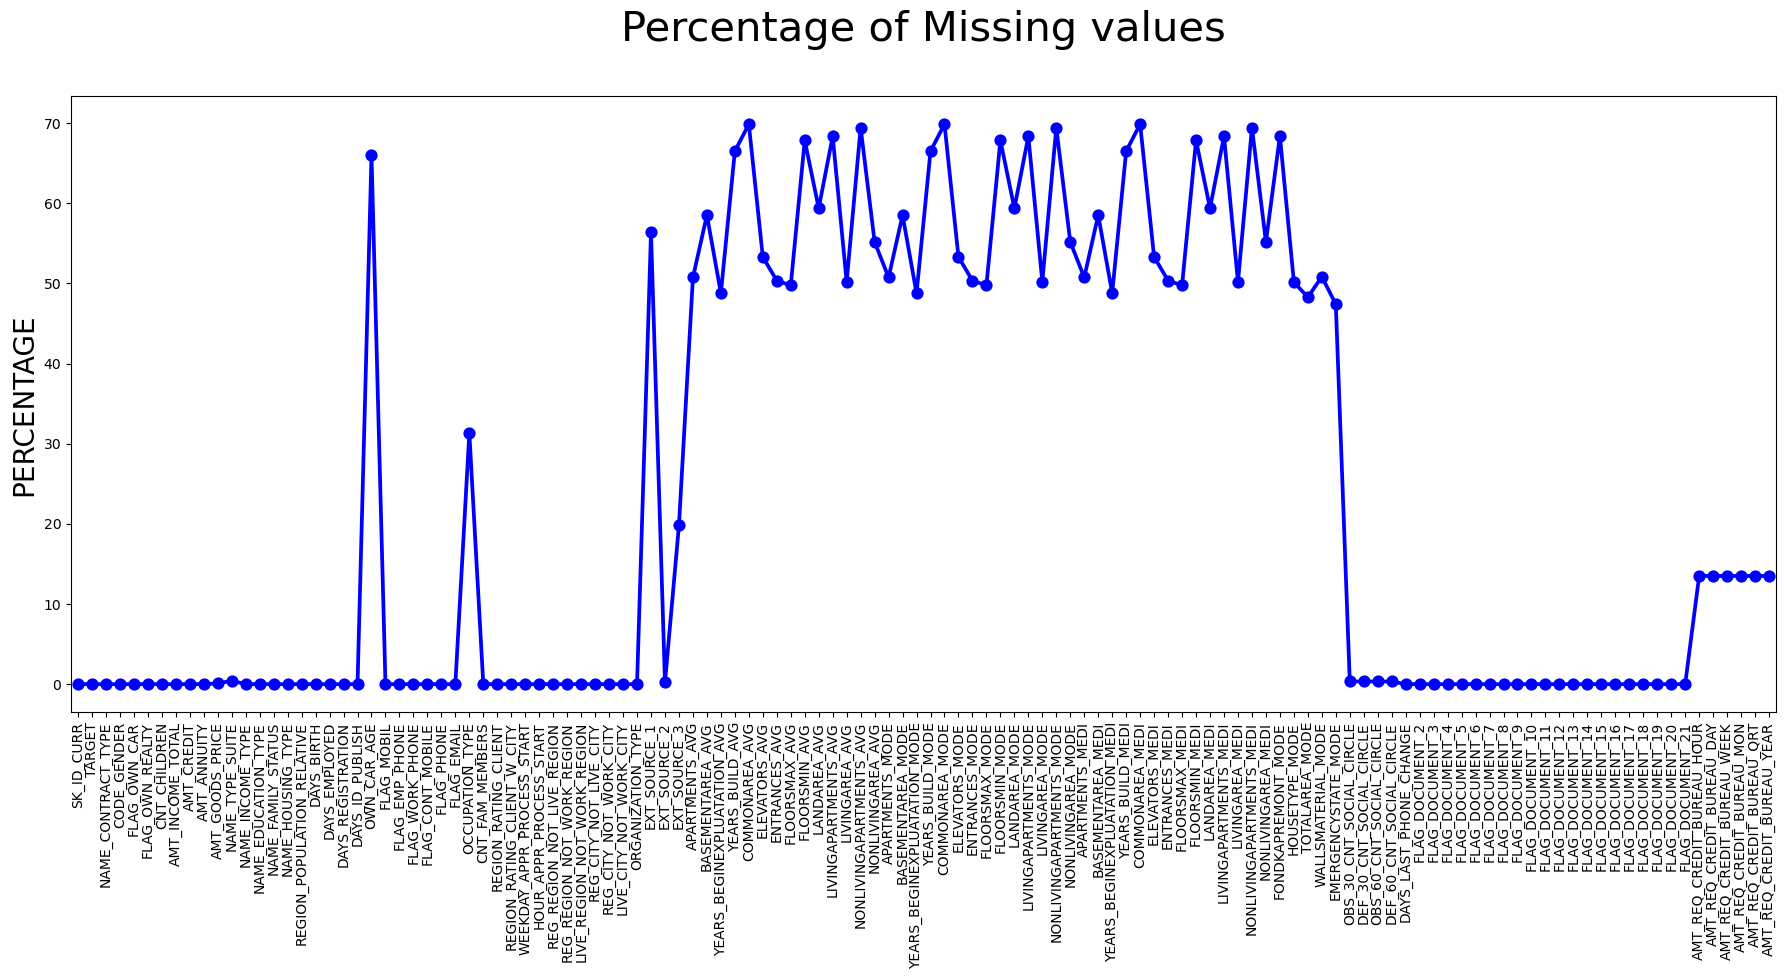

In [15]:
# Ploting a point chart for missing value percentage
plt.figure(figsize=[22,8])
sns.pointplot(df.isna().mean()*100,color='blue')
plt.title("Percentage of Missing values\n", fontsize=30)
plt.ylabel("PERCENTAGE",fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

In [16]:
#list of columns with missing values
col_missing_val = df.columns[df.isna().mean()*100 > 0]
col_missing_val

Index(['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'OWN_CAR_AGE',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'EXT_SOURCE_1', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG',
       'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG',
       'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG',
       'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE',
       'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE',
       'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE',
       'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE',
       'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE',
       'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI',
       'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI',
       'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMI

>### Deleting Columns having missing values
>> - Here I am deleting columns having missing value more than 45% to reduce complexity and to improve quality of data

In [18]:
# List of columns having missing values more than 45%
col_45 = df.columns[df.isna().mean()*100 > 45].to_list()

In [19]:
#dropping the columns having more than 45% of null value
df.drop(columns=col_45 , axis=1,inplace=True)

In [20]:
df.shape

(307511, 73)

In [21]:
missing_col = df.isna().mean()*100
missing_col = missing_col[missing_col > 0]
missing_col

AMT_ANNUITY                    0.003902
AMT_GOODS_PRICE                0.090403
NAME_TYPE_SUITE                0.420148
OCCUPATION_TYPE               31.345545
CNT_FAM_MEMBERS                0.000650
EXT_SOURCE_2                   0.214626
EXT_SOURCE_3                  19.825307
OBS_30_CNT_SOCIAL_CIRCLE       0.332021
DEF_30_CNT_SOCIAL_CIRCLE       0.332021
OBS_60_CNT_SOCIAL_CIRCLE       0.332021
DEF_60_CNT_SOCIAL_CIRCLE       0.332021
DAYS_LAST_PHONE_CHANGE         0.000325
AMT_REQ_CREDIT_BUREAU_HOUR    13.501631
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
dtype: float64

>### Imputing missing values
>> - I am imputing the missing values with mode in those columns which has less than 1% of missing values
>> - For other columns having missing values around 13% and more, I will check them individually and determine what would be the best possible value to impute them with.

In [23]:
#Series of columns having less than 1% missing values
col_1_less = missing_col[missing_col<1]
col_1_less

AMT_ANNUITY                 0.003902
AMT_GOODS_PRICE             0.090403
NAME_TYPE_SUITE             0.420148
CNT_FAM_MEMBERS             0.000650
EXT_SOURCE_2                0.214626
OBS_30_CNT_SOCIAL_CIRCLE    0.332021
DEF_30_CNT_SOCIAL_CIRCLE    0.332021
OBS_60_CNT_SOCIAL_CIRCLE    0.332021
DEF_60_CNT_SOCIAL_CIRCLE    0.332021
DAYS_LAST_PHONE_CHANGE      0.000325
dtype: float64

In [24]:
# Automation for filling null values with mode in columns having less than 1% of missing Values
for i in col_1_less.index:
    mode = df[i].mode()[0]
    df[i].fillna(mode,inplace=True)

In [25]:
# list of columns with missing values
cols_missing = df.isna().mean()*100
cols_missing = cols_missing[cols_missing>0]
cols_missing

OCCUPATION_TYPE               31.345545
EXT_SOURCE_3                  19.825307
AMT_REQ_CREDIT_BUREAU_HOUR    13.501631
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
dtype: float64

In [26]:
# checking for numerical/continuous columns
df[cols_missing.index].nunique().sort_values()

AMT_REQ_CREDIT_BUREAU_HOUR      5
AMT_REQ_CREDIT_BUREAU_DAY       9
AMT_REQ_CREDIT_BUREAU_WEEK      9
AMT_REQ_CREDIT_BUREAU_QRT      11
OCCUPATION_TYPE                18
AMT_REQ_CREDIT_BUREAU_MON      24
AMT_REQ_CREDIT_BUREAU_YEAR     25
EXT_SOURCE_3                  814
dtype: int64

> - Here, we can see that the last variables, i.e, EXT_SOURCE_3 is continuous variable as they have such high unique values and remaining are categorical variables given such less unique values.

Text(0.5, 1.0, 'BoxPlot of EXT_SOURCE_3\n')

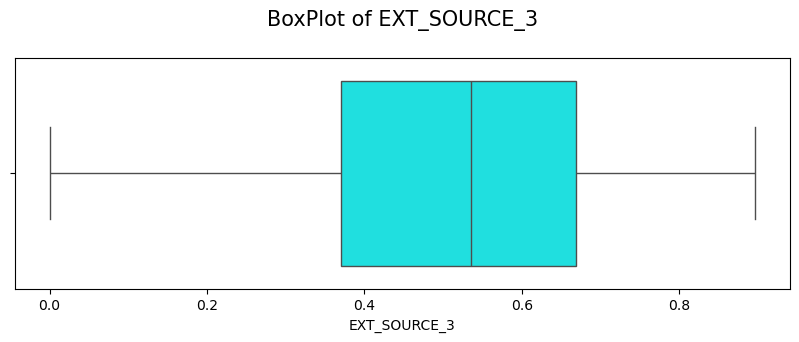

In [28]:
#Ploting a boxplot for EXT_SOURCE_3 variable as it is a continuous variable
plt.figure(figsize=[10,3])
sns.boxplot(x = df['EXT_SOURCE_3'],color='cyan')
plt.title('BoxPlot of EXT_SOURCE_3\n',fontsize=15)

>#### Observation:
>> - EXT_SOURCE_3 has no outliers so data is correctly presented

> - OCCUPATION_TYPE column is having 31% of missing values imputing them with mode would not be the right thing to do so I will keep those value as missing values

In [31]:
# Imputing Null values as Missing
df.OCCUPATION_TYPE = np.where(df.OCCUPATION_TYPE.isna(),'Missing' , df.OCCUPATION_TYPE)
df.OCCUPATION_TYPE.isnull().sum()

0

>### Identifying Numerical, Continuous and Categorical variables

In [33]:
df.nunique().sort_values()

REG_CITY_NOT_LIVE_CITY              2
FLAG_EMAIL                          2
FLAG_DOCUMENT_9                     2
REG_REGION_NOT_LIVE_REGION          2
REG_REGION_NOT_WORK_REGION          2
LIVE_REGION_NOT_WORK_REGION         2
REG_CITY_NOT_WORK_CITY              2
LIVE_CITY_NOT_WORK_CITY             2
FLAG_DOCUMENT_16                    2
FLAG_DOCUMENT_15                    2
FLAG_PHONE                          2
FLAG_DOCUMENT_14                    2
FLAG_DOCUMENT_12                    2
FLAG_DOCUMENT_11                    2
FLAG_DOCUMENT_2                     2
FLAG_DOCUMENT_3                     2
FLAG_DOCUMENT_4                     2
FLAG_DOCUMENT_5                     2
FLAG_DOCUMENT_6                     2
FLAG_DOCUMENT_7                     2
FLAG_DOCUMENT_8                     2
FLAG_DOCUMENT_13                    2
FLAG_CONT_MOBILE                    2
FLAG_DOCUMENT_10                    2
FLAG_EMP_PHONE                      2
FLAG_MOBIL                          2
FLAG_DOCUMEN

> - We can see that all the variables having less than 20 unique values can be treated as categorical variables

In [35]:
# checking CODE_GENDER column
df.CODE_GENDER.value_counts()

CODE_GENDER
F      202448
M      105059
XNA         4
Name: count, dtype: int64

> - CODE_GENDER column is having XNA (Gender is not define we can replace those values with Mode of the column i.e. Female)

In [37]:
# Handling code Gender Column
df.loc[df.CODE_GENDER == 'XNA', 'CODE_GENDER'] = 'F'
df.CODE_GENDER.value_counts()

CODE_GENDER
F    202452
M    105059
Name: count, dtype: int64

In [38]:
df.nunique().sort_values().index

Index(['REG_CITY_NOT_LIVE_CITY', 'FLAG_EMAIL', 'FLAG_DOCUMENT_9',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_15',
       'FLAG_PHONE', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_13',
       'FLAG_CONT_MOBILE', 'FLAG_DOCUMENT_10', 'FLAG_EMP_PHONE', 'FLAG_MOBIL',
       'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'TARGET', 'NAME_CONTRACT_TYPE',
       'CODE_GENDER', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'FLAG_WORK_PHONE', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
 

In [39]:
# converting categorical columns into categorical type
categorical = ['REG_CITY_NOT_LIVE_CITY', 'FLAG_EMAIL', 'FLAG_DOCUMENT_9',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_15',
       'FLAG_PHONE', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_13',
       'FLAG_CONT_MOBILE', 'FLAG_DOCUMENT_10', 'FLAG_EMP_PHONE', 'FLAG_MOBIL',
       'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'TARGET', 'NAME_CONTRACT_TYPE',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'FLAG_WORK_PHONE',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'CODE_GENDER',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'NAME_TYPE_SUITE',
       'WEEKDAY_APPR_PROCESS_START', 'NAME_INCOME_TYPE',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'CNT_CHILDREN', 'CNT_FAM_MEMBERS',
       'OCCUPATION_TYPE']

In [40]:
#here SK_ID_CURR is int type column that contains the loan ID so convert them into object type
df['SK_ID_CURR'] = df['SK_ID_CURR'].astype('object')

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  object 
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307511 non-null  float64
 10  AMT_GOODS_PRICE              307511 non-null  float64
 11  NAME_TYPE_SUITE              307511 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [42]:
#  Checking for DAYS_BIRTH ,DAYS_EMPLOYED, DAYS_REGISTRATION and DAYS_ID_PUBLISH variables
df[['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH']].head()

DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH
0       -9461           -637            -3648.0            -2120
1      -16765          -1188            -1186.0             -291
2      -19046           -225            -4260.0            -2531
3      -19005          -3039            -9833.0            -2437
4      -19932          -3038            -4311.0            -3458

> - 'DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION' and 'DAYS_ID_PUBLISH' columns are having Negative values which is not correctly presented

In [44]:
# Converting values of 'DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION' and 'DAYS_ID_PUBLISH' columns
df.DAYS_BIRTH = df.DAYS_BIRTH.abs()
df.DAYS_EMPLOYED = df.DAYS_EMPLOYED.abs()
df.DAYS_REGISTRATION = df.DAYS_REGISTRATION.abs()
df.DAYS_ID_PUBLISH = df.DAYS_ID_PUBLISH.abs()

>### Checking for outliers

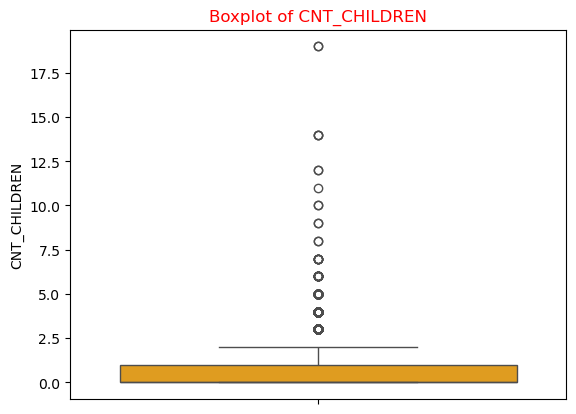

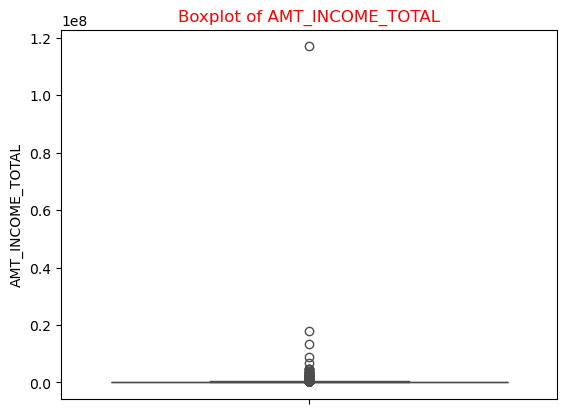

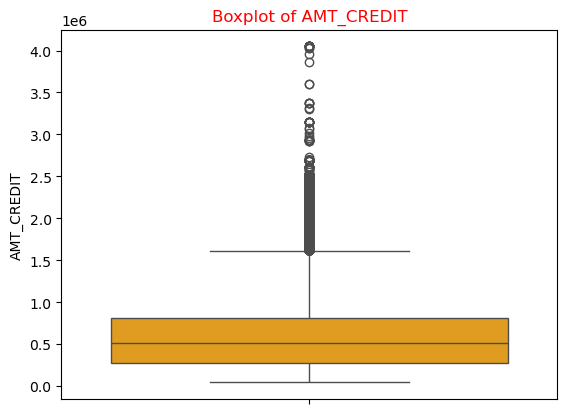

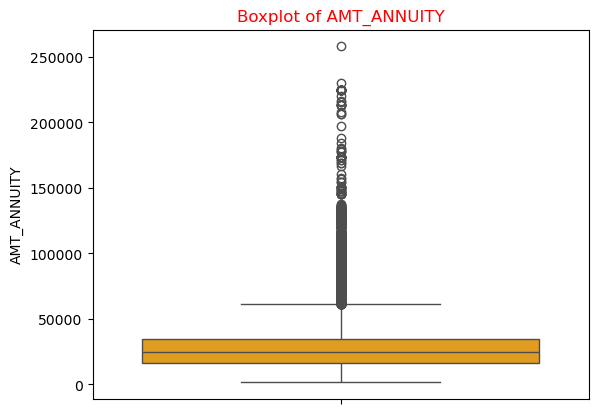

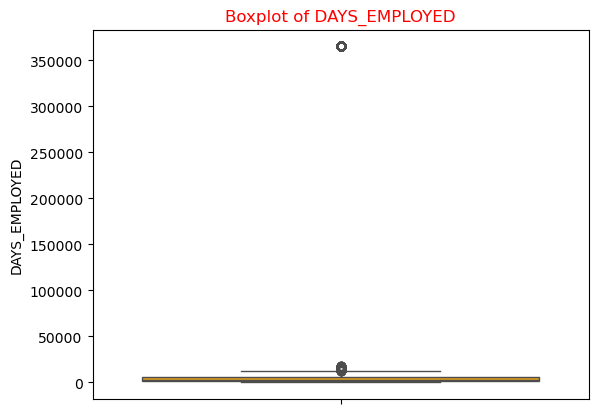

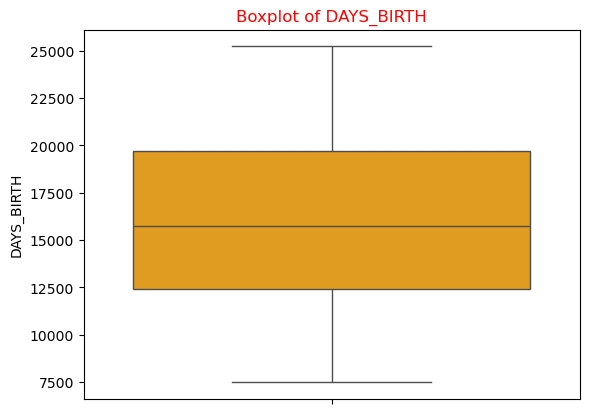

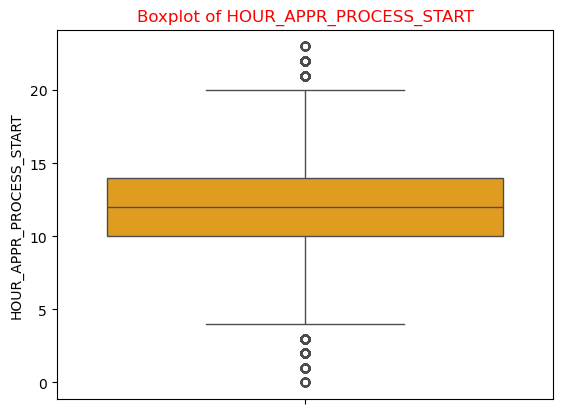

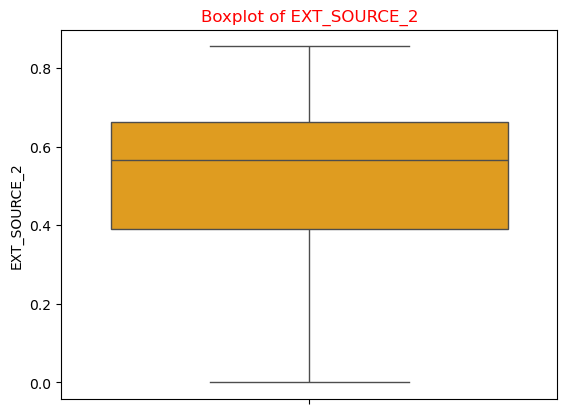

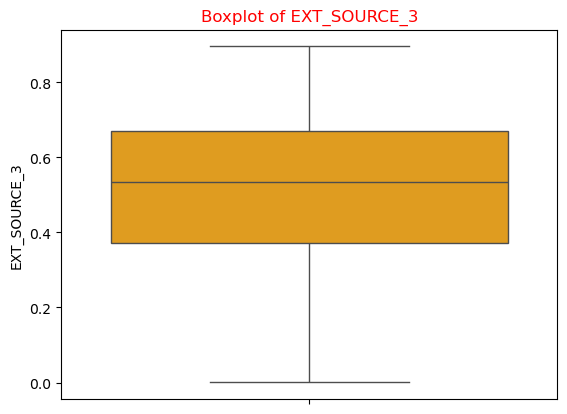

In [46]:
# Creating Boxplot for continous columns to get more insights
cols = ['CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','DAYS_EMPLOYED', 'DAYS_BIRTH','HOUR_APPR_PROCESS_START','EXT_SOURCE_2','EXT_SOURCE_3']
for i,j in enumerate(cols):
    plt.figure(i)
    sns.boxplot(df[j],color='orange')
    plt.title(('Boxplot of '+j),fontdict = {'size' : 12,'color':'red'})

>#### Observation:
>> - CNT_CHILDREN variable is having so many outlier
>> - AMT_INCOME_TOTAL variable has only one value very higher than rest of the values
>> - AMT_CREDIT variable is having so many outliers
>> - AMT_ANNUITY variable is having so many outliers
>> - DAYS_BIRTH variable has no outliers
>> - DAYS_EMPLOYED variable has only one value very higher than rest of the values
>> - EXT_SOURCE_2 & EXT_SOURCE_3 has no outliers

>#####  To identify the type of client it will be better to convert AMT_INCOME_TOTAL and AMT_CREDIT columns into categorical by binning them

>### Binning Variables

In [50]:
df[['AMT_INCOME_TOTAL', 'AMT_CREDIT']].describe()

AMT_INCOME_TOTAL    AMT_CREDIT
count      3.075110e+05  3.075110e+05
mean       1.687979e+05  5.990260e+05
std        2.371231e+05  4.024908e+05
min        2.565000e+04  4.500000e+04
25%        1.125000e+05  2.700000e+05
50%        1.471500e+05  5.135310e+05
75%        2.025000e+05  8.086500e+05
max        1.170000e+08  4.050000e+06

In [51]:
# Binning AMT_CREDIT Variable

bins=[0,150000,300000,450000,600000,750000, 900000, 1050000, 1200000, 1350000, 1500000,3750000]
labels = ['0-150k','150k-300k','300k-450k','450k-600k','600k-750k','750k-900k','900k-1.05M','1.05M-1.2M','1.2M-1.35M',
          '1.35M-1.5M','1.5M above']

df['AMT_CREDIT_RANGE'] = pd.cut(df['AMT_CREDIT'],bins,labels=labels)

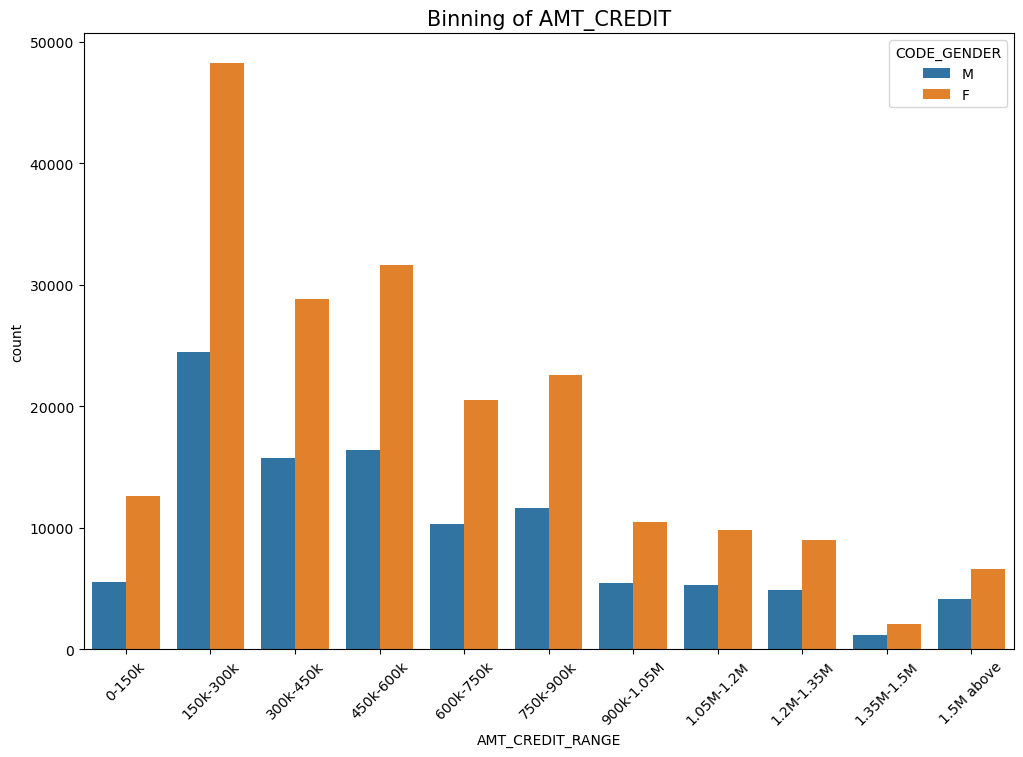

In [52]:
# plotting count plot for AMT_CREDIT

plt.figure(figsize = [12,8])
sns.countplot(data = df,x='AMT_CREDIT_RANGE',hue='CODE_GENDER')
plt.xticks(rotation=45)
plt.title('Binning of AMT_CREDIT',fontsize=15)
plt.show()

>#### Observation:
>> - Female counts are higher than male counts
>> - Most of the clients are having credit amount between 150k-900k

In [54]:
# Binning AMT_INCOME_TOTAL Variable

bins = [0,100000,200000,300000,400000,500000,600000,700000,800000,900000,100000000]
labels = ['0-100k','100k-200k','200k-300k','300k-400k','400k-500k','500k-600k','600k-700k','700k-800k','800k-900k','900k above']

df['AMT_INCOME_RANGE'] = pd.cut(df['AMT_INCOME_TOTAL'],bins,labels=labels)

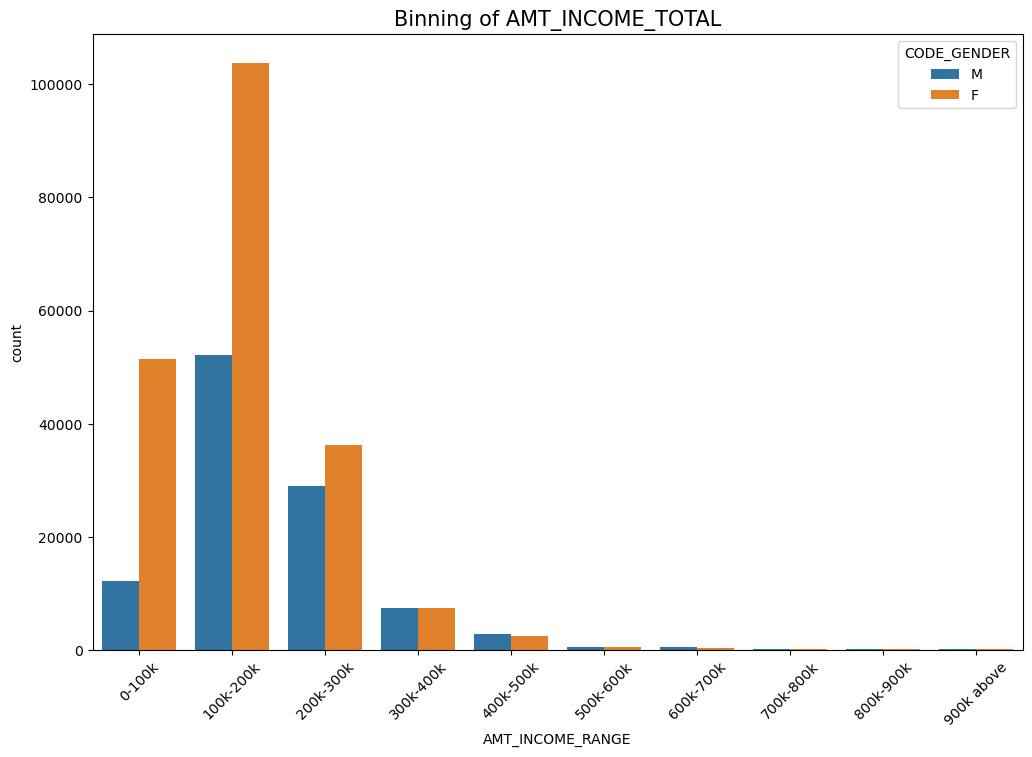

In [55]:
# plotting count plot for AMT_INCOME_TOTAL

plt.figure(figsize = [12,8])
sns.countplot(data = df,x='AMT_INCOME_RANGE', hue='CODE_GENDER')
plt.xticks(rotation=45)
plt.title('Binning of AMT_INCOME_TOTAL',fontsize=15)
plt.show()

>#### Observation:
>> - Female counts are higher than male counts
>> - Most of the clients having income between 0-300k

In [57]:
# Further Binning Total income as clients with high, medium and low income
def income_category(x):
    if x <= 100000:
        return 'Low'
    elif x > 100000 and x < 200000:
        return 'Medium'
    else:
        return 'High'

df['INCOME_CATEGORY'] = df.AMT_INCOME_TOTAL.apply(income_category)
df['INCOME_CATEGORY'].value_counts()

INCOME_CATEGORY
Medium    155898
High       87915
Low        63698
Name: count, dtype: int64

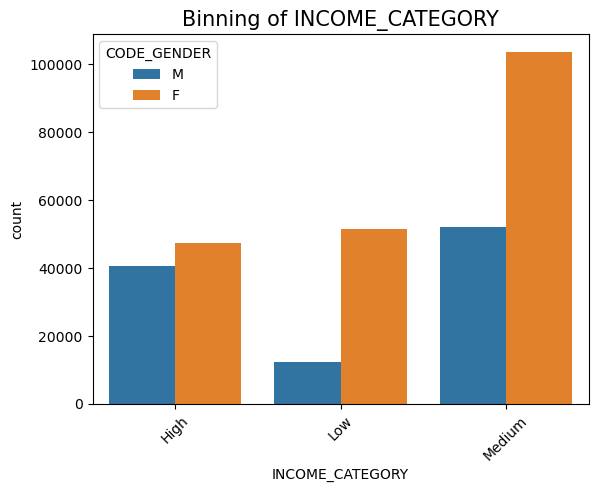

In [58]:
# Plotting count plot for income Category
sns.countplot(data = df,x='INCOME_CATEGORY', hue='CODE_GENDER')
plt.xticks(rotation=45)
plt.title('Binning of INCOME_CATEGORY',fontsize=15)
plt.show()

>#### Observation:
>> - Number of clients with medium income is more(i.e. between 100000 and 200000)

In [60]:
# Converting DAYS_BIRTH to Age Group by binning them

#Coverting DAYS_BIRTH into YEAR form
df.DAYS_BIRTH = round(df.DAYS_BIRTH/365 , 0)


In [61]:
#Binning DAYS_BIRTH
df['AGE_GROUP'] =pd.cut(df['DAYS_BIRTH'], bins=[19, 30, 55, 100], labels = ['Young','Mid_Age','Senior_citizen'])

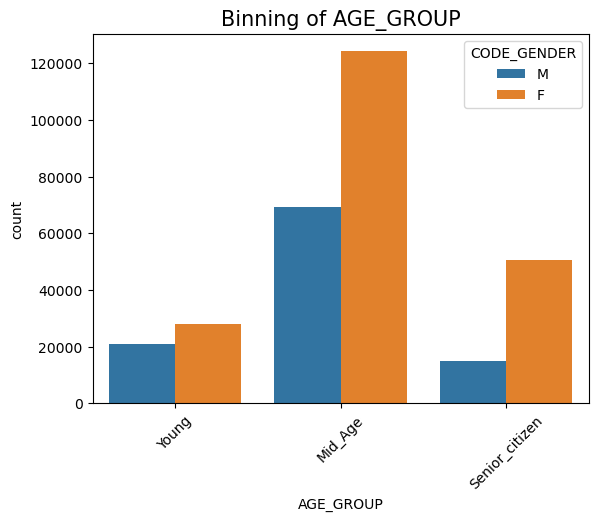

In [62]:
sns.countplot(data = df,x='AGE_GROUP', hue='CODE_GENDER')
plt.xticks(rotation=45)
plt.title('Binning of AGE_GROUP',fontsize=15)
plt.show()

>#### Observation:
>> - Most of the clients are of Mid-Age (i.e. between 30-55) and very less clients from Senior citizen age group

># _DATA EXPLORATION:_

>### Checking for Imbalanced Data

In [66]:
# Checking for TARGET Variable
df.TARGET.value_counts(normalize=True)

TARGET
0    0.919271
1    0.080729
Name: proportion, dtype: float64

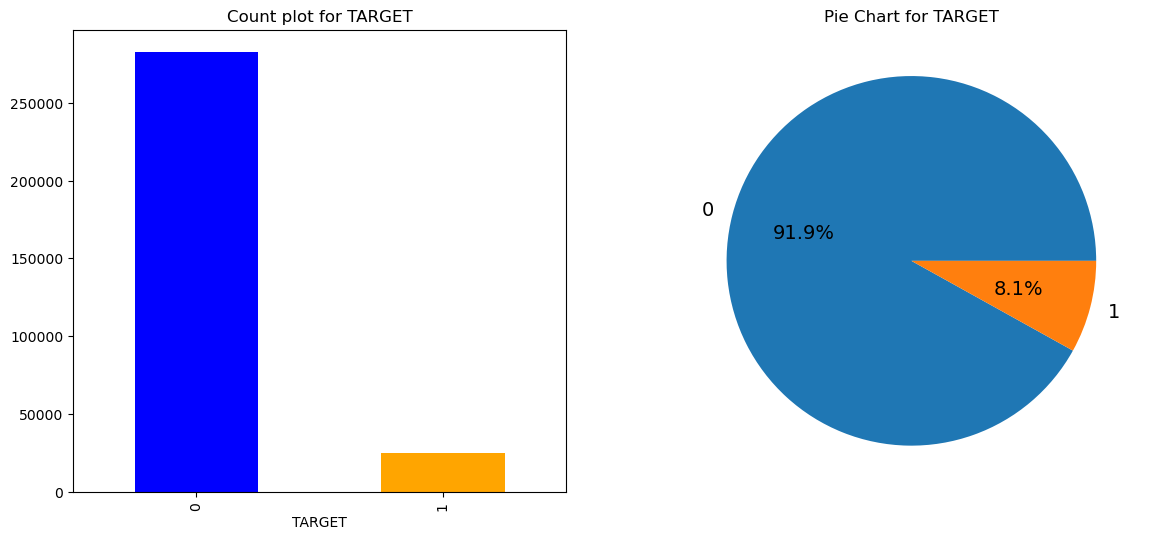

In [67]:
# ploting bar chart for TARGET variable
plt.figure(figsize=[14,6])
plt.subplot(1,2,1)
df.TARGET.value_counts().plot.bar(color=['blue','orange'])
plt.title('Count plot for TARGET')

plt.subplot(1,2,2)
target_type_counts = df['TARGET'].value_counts()
plt.pie(target_type_counts, labels=target_type_counts.index, autopct='%1.1f%%', textprops={'fontsize': 14})
plt.title('Pie Chart for TARGET')
plt.show()

>#### Observation:
>> - Target variable is Highly imbalanced.
>> - 91.92% customers are Non-defaulters and 8.07% people are Defaulters
>> - Imbalanced ratio is =  (0.919271 / 0.080729) = 11.3871222

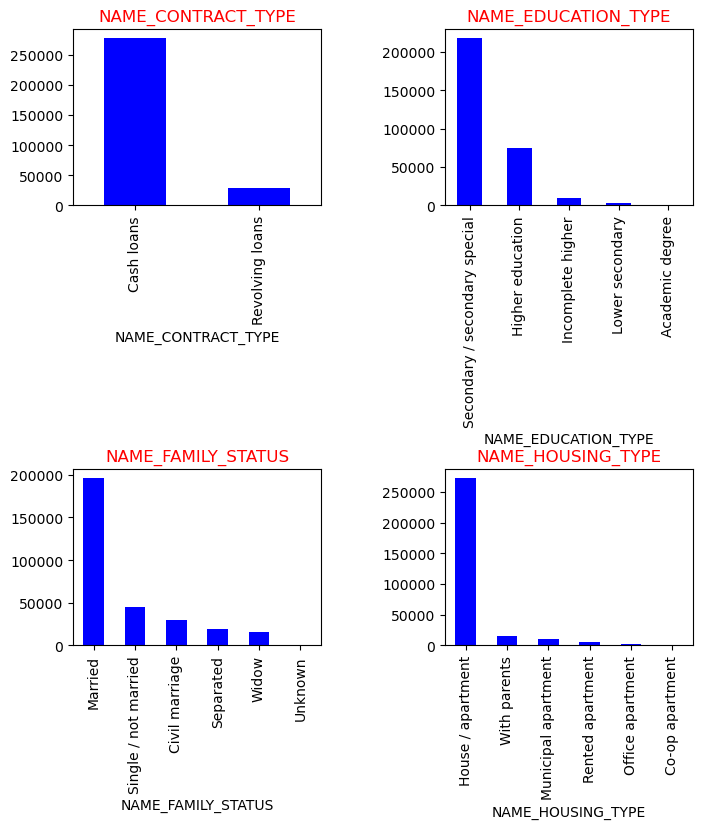

In [69]:
# Checking for other imbalanced variables
cols = ['NAME_CONTRACT_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE']#,'REG_REGION_NOT_LIVE_REGION',
            # 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY']

plt.figure(figsize=[8,8])

for i,j in enumerate(cols):
    plt.subplot(2, 2,i+1)
    df[j].value_counts().plot.bar(color='blue')
    plt.title(j, fontdict={'size':12 , 'color':'red'})
    plt.xticks(rotation=90, fontsize=10 )
    plt.yticks(fontsize=10)


# Adjusting space between the plots
plt.subplots_adjust(wspace=0.5, hspace=1.5)

plt.show()

>#### Observation:
>> - NAME_CONTRACT_TYPE - There are very few 'Revolving loans' than 'Cash loans'.
>> - NAME_EDUCATION_TYPE - Most of the loans are applied by 'Secondary/Secondary special' educated people
>> - NAME_FAMILY_STATUS - Most of the loans are applied by 'Married' people.
>> - NAME_HOUSING_TYPE - Most of the application came from 'Home/appartment' owner.

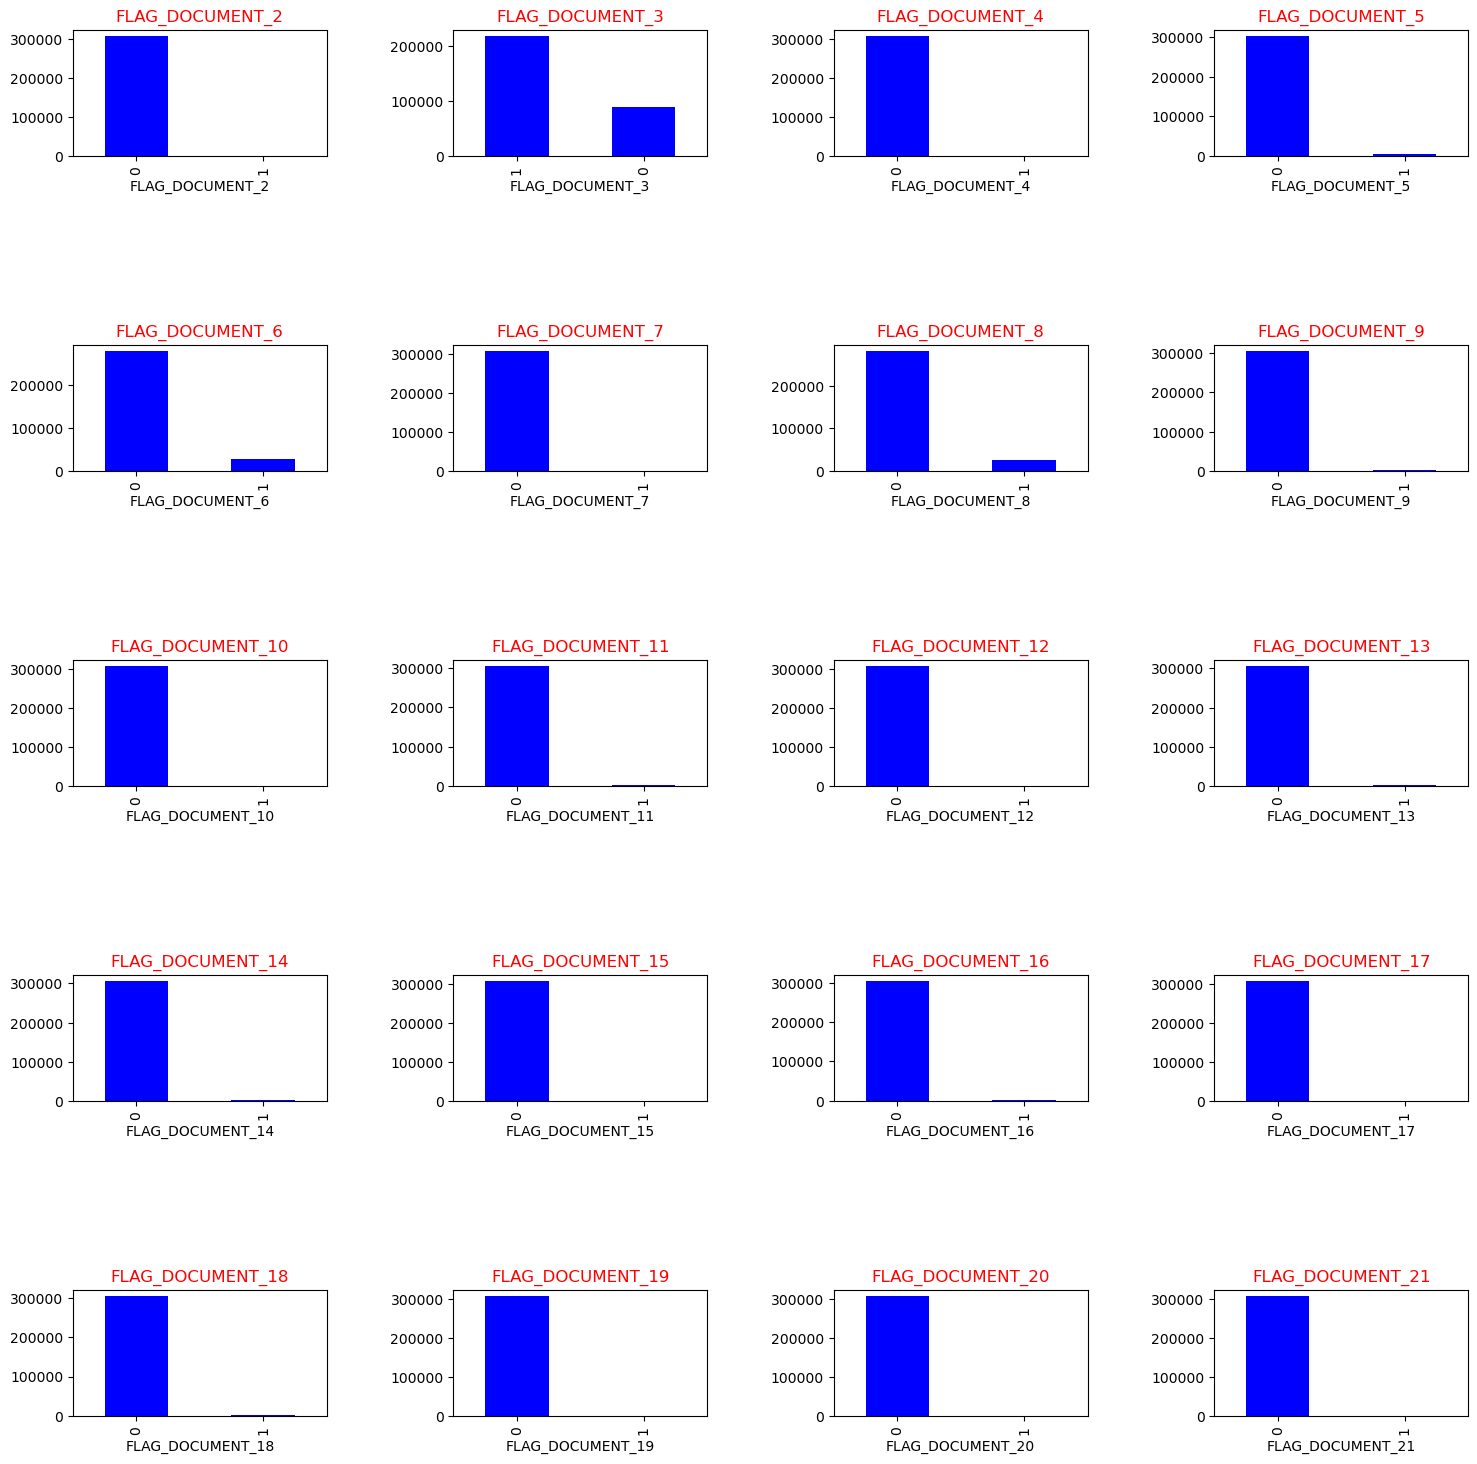

In [71]:
# Checking for flag document variables
flag_doc = ['FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6','FLAG_DOCUMENT_7',
            'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12','FLAG_DOCUMENT_13',
            'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19',
            'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']
plt.figure(figsize=[18,18])
for i,j in enumerate(flag_doc):
    plt.subplot(5, 4,i+1)
    df[j].value_counts().plot.bar(color='blue')
    plt.title(j, fontdict={'size':12 , 'color':'red'})
    plt.xticks(rotation=90, fontsize=10 )
    plt.yticks(fontsize=10)


# Adjusting space between the plots
plt.subplots_adjust(wspace=0.5, hspace=1.5)

plt.show()

>#### Observation:
>> - Most of the Client has provided only Document_3
>> - Very few has provided document 6 and 8

># UNIVARIATE ANALYSIS:

In [74]:
# Defining function for charts
def customeplot(x,type):
    if type == 'count':
        plt.figure(figsize=(5,5))
        sns.countplot(x=df[x],palette='magma')
        plt.ylabel('Counts', fontsize=10)
        plt.xlabel(x,fontsize=10)
        plt.title(('\nCountplot for '+x), fontdict = {'size':12, 'color':'brown'})
        plt.xticks(rotation=90, fontsize=10)
        plt.yticks(fontsize=10)

    elif type == 'hist':
        plt.figure(figsize=(5,5))
        sns.histplot(x=df[x],color='Blue',alpha=0.6 , edgecolor =None)
        plt.ylabel('Counts', fontsize=10)
        plt.xlabel(x,fontsize=10)
        plt.title(('\nHistplot for '+x), fontdict = {'size':12, 'color':'brown'})
        plt.xticks(rotation=90, fontsize=10)
        plt.yticks(fontsize=10)


    plt.subplots_adjust(wspace=0.5, hspace=0.5)


>### 1.Categorical Univariate Analysis

<Figure size 640x480 with 0 Axes>

<Figure size 700x700 with 0 Axes>

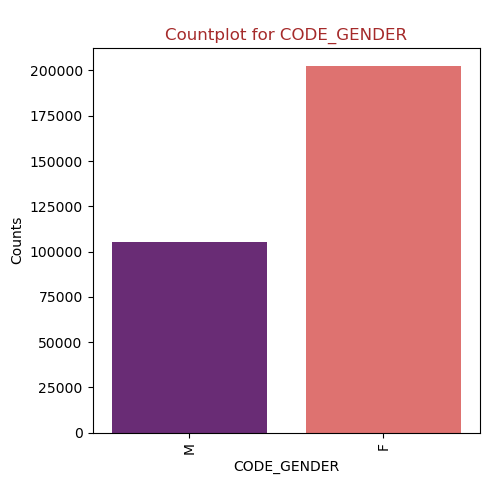

<Figure size 700x700 with 0 Axes>

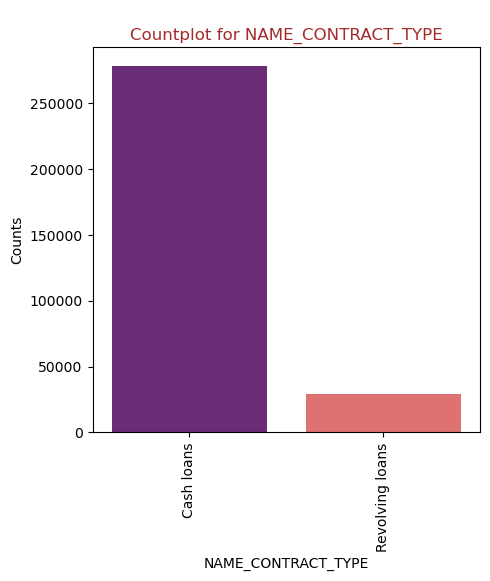

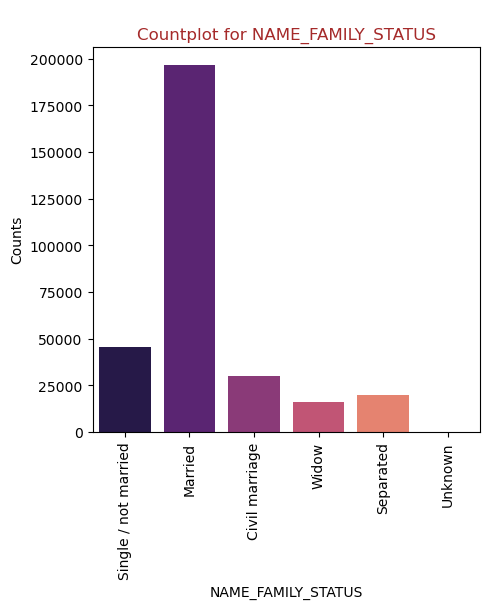

<Figure size 700x700 with 0 Axes>

<Figure size 700x700 with 0 Axes>

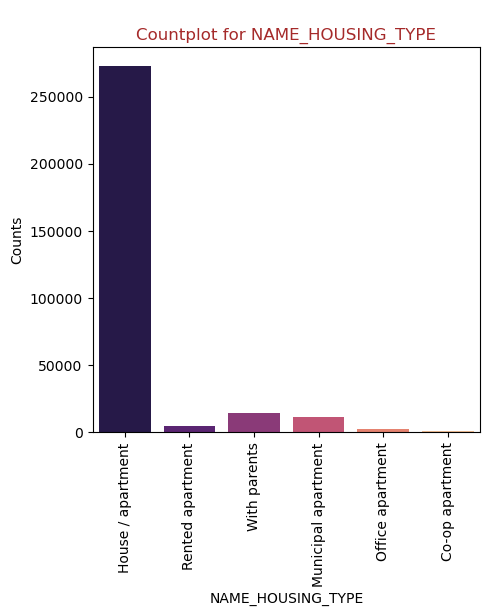

<Figure size 700x700 with 0 Axes>

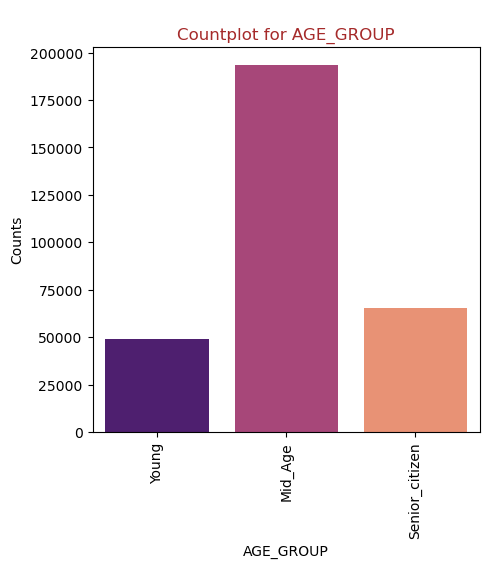

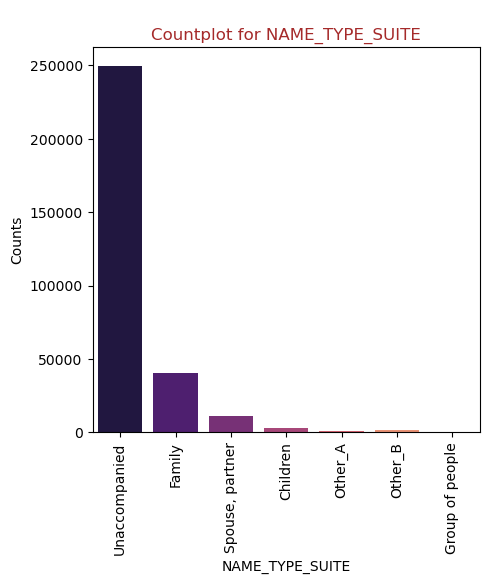

<Figure size 700x700 with 0 Axes>

<Figure size 700x700 with 0 Axes>

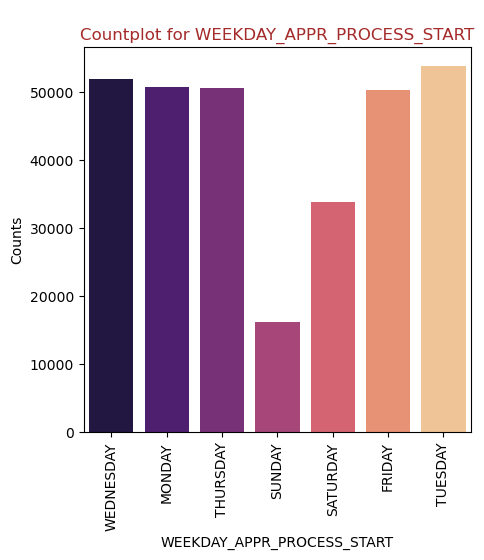

<Figure size 700x700 with 0 Axes>

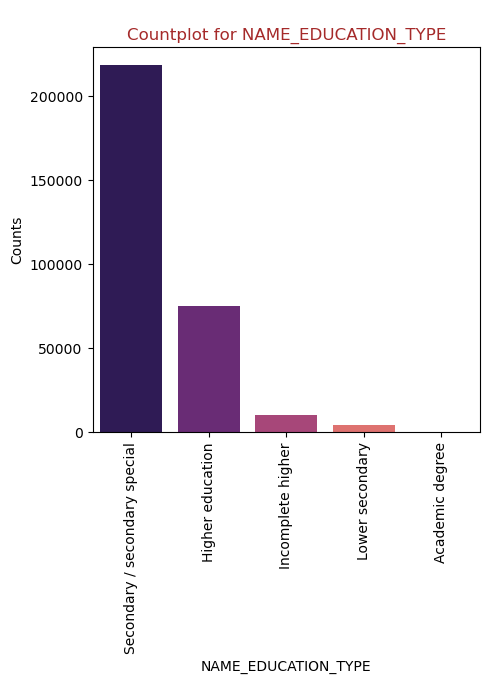

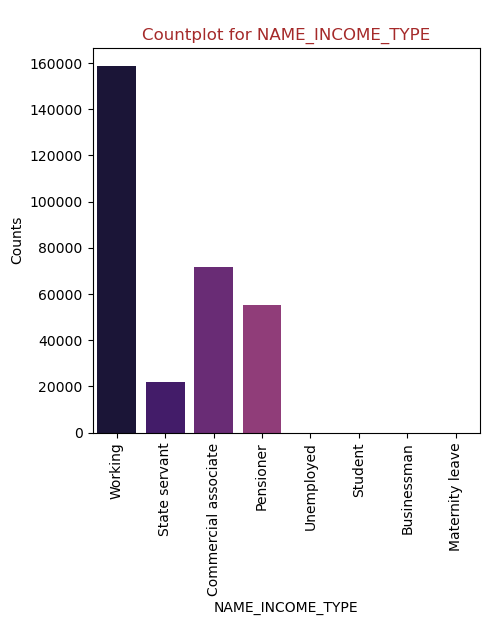

<Figure size 700x700 with 0 Axes>

<Figure size 700x700 with 0 Axes>

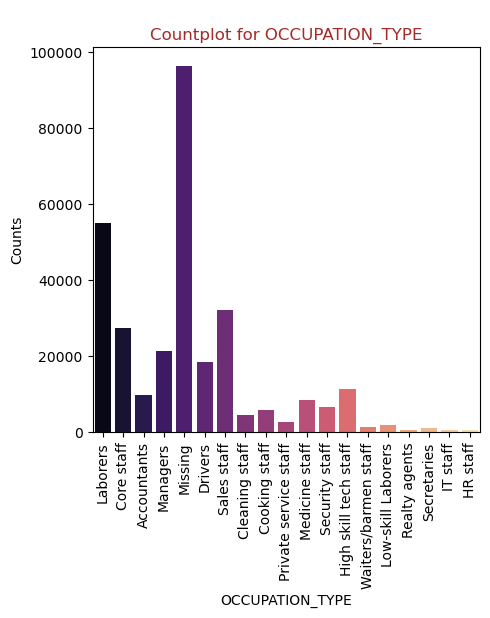

In [76]:
# count plot for categorical variables
cat_cols = ['CODE_GENDER','NAME_CONTRACT_TYPE','AGE_GROUP','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','NAME_TYPE_SUITE',
            'WEEKDAY_APPR_PROCESS_START','NAME_INCOME_TYPE','OCCUPATION_TYPE']
for i,j in enumerate(cat_cols):
    plt.figure(figsize=[7,7])
    plt.figure(i)
    customeplot(j,'count')

>#### Observation:
>> - CODE_GENDER --> Most of the clients are Female. Ratio of Male Female is approx 1:2
>> - NAME_CONTRACT_TYPE --> Most of the clients are having Cash Loans
>> - NAME_EDUCATION_TYPE --> Among all the clients most of them are having secondary/secondary special education
>> - NAME_FAMILY_STATUS --> Married people are more likely to take a loan
>> - NAME_HOUSING_TYPE --> Most of the clients are having House/apartment
>> - NAME_TYPE_SUITE --> Most of the clients are unaccompanied
>> - WEEKDAY_APPR_PROCESS_START --> Most of the clients are likely to apply on weekdays very few are there who have applied on weekends
>> - NAME_INCOME_TYPE --> Most of the clients are working and Commercial associate
>> - OCCUPATION_TYPE --> Most of the clients are Laborers, Sales staff, Core staff

>### 1.Numerical Univariate Analysis

<Figure size 640x480 with 0 Axes>

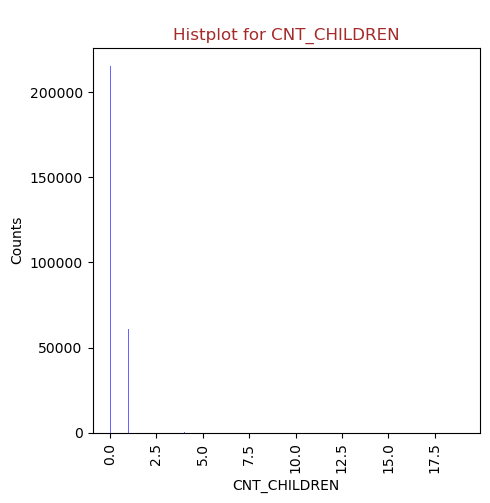

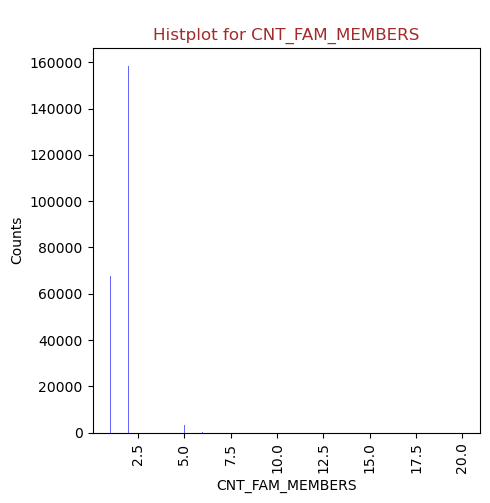

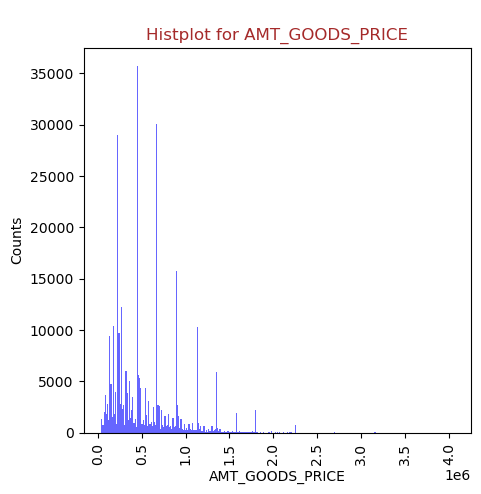

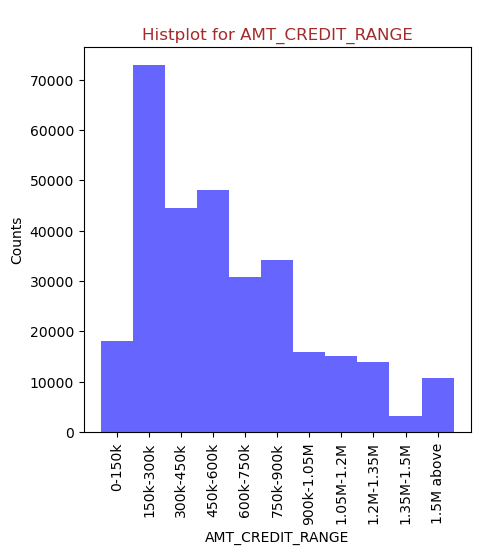

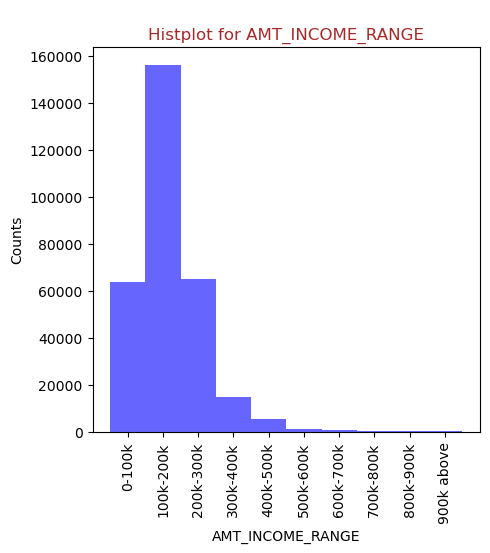

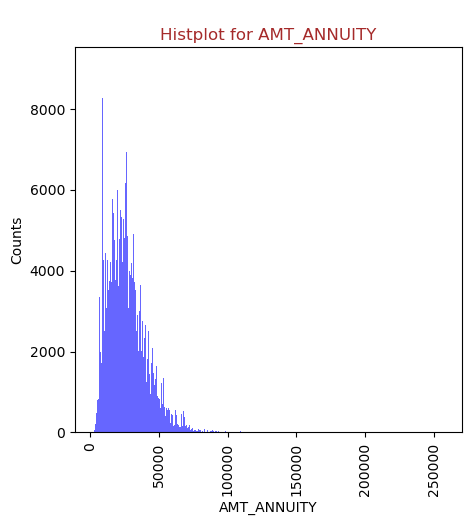

In [79]:
# count plot for Numerical/ Continuous variables
num_cols = ['CNT_CHILDREN','CNT_FAM_MEMBERS','AMT_GOODS_PRICE','AMT_CREDIT_RANGE','AMT_INCOME_RANGE','AMT_ANNUITY']
for i,j in enumerate(num_cols):
    plt.figure(i)
    customeplot(j,'hist')

>#### Observation:
>> - CNT_CHILDREN --> Most of the clients are having 0 or 1 child
>> - CNT_FAM_MEMBER--> Most of the clients are having 1 to 3 Family members
>> - AMT_GOODS_PRICE --> Most of the clients having less Goods Price
>> - AMT_CREDIT_RANGE --> Most of the clients having credit amount from 150k to 900k
>> - AMT_INCOME_RANGE --> Most of the clients having total income from 0 to 300k
>> - AMT_ANNUITY --> Most of the clients have annuity amount from 5000 to 50000

># Segmented Univariate Analysis with percentage being defaulter

In [82]:
# Dividing data into two segments for segmented univariate analysis
df_target0 = df[df.TARGET == 0]
df_target1 = df[df.TARGET == 1]

In [83]:
# Converting value of Target column
df.TARGET = df.TARGET.apply(lambda x : 'Defaulter' if x==1 else 'Non-Defaulter')

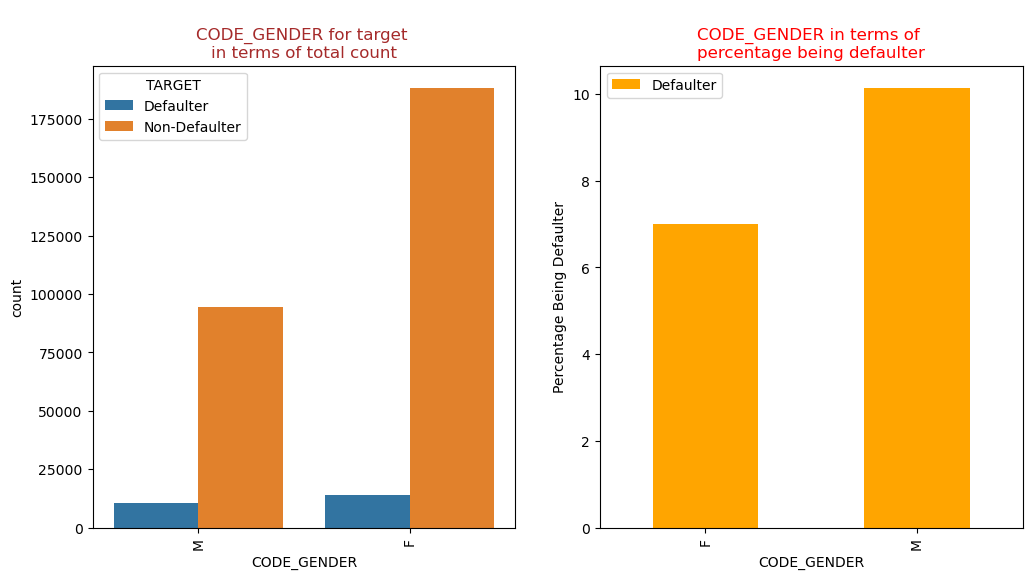

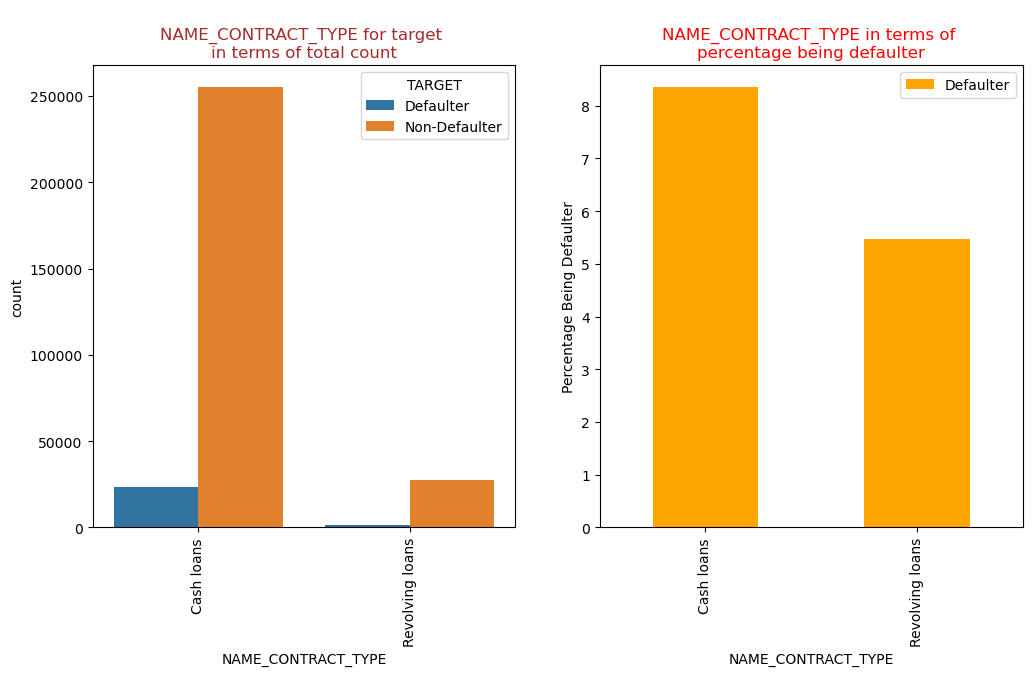

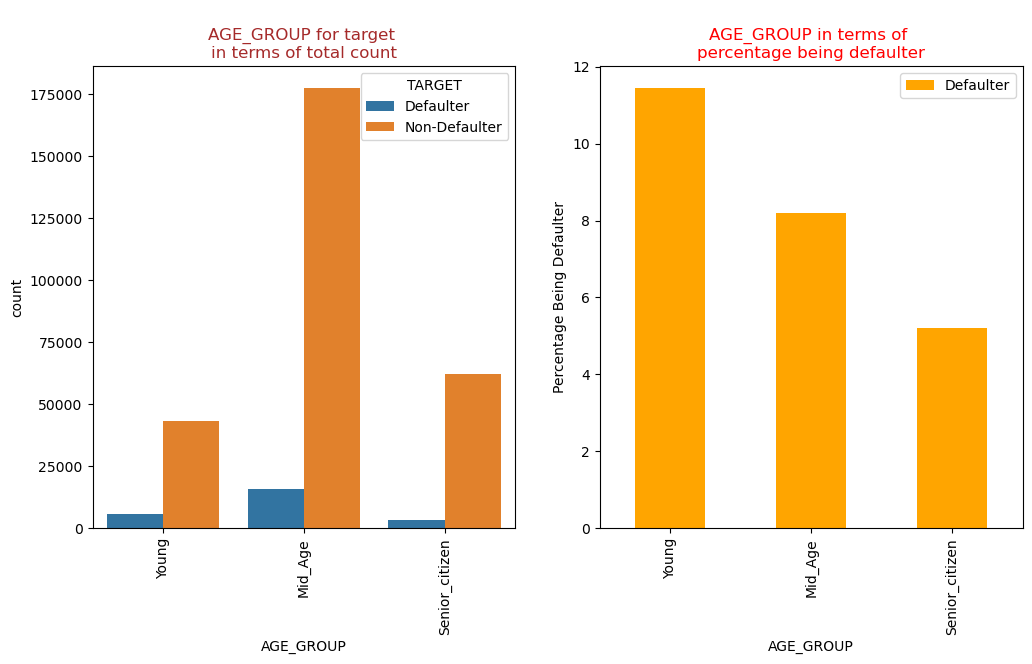

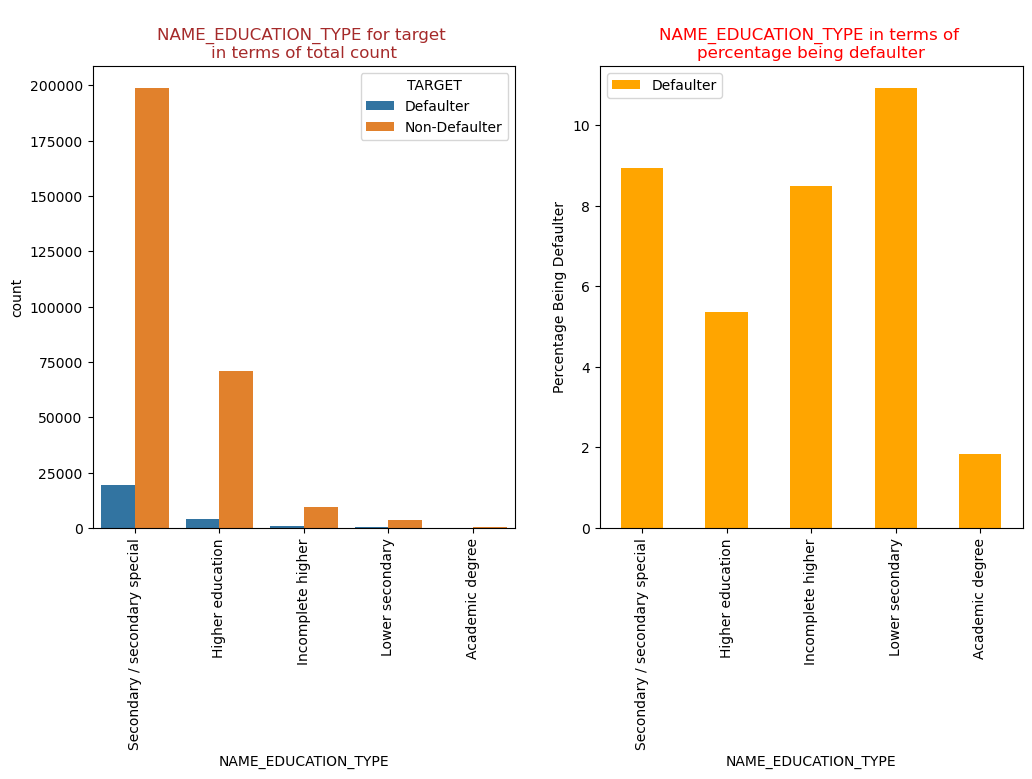

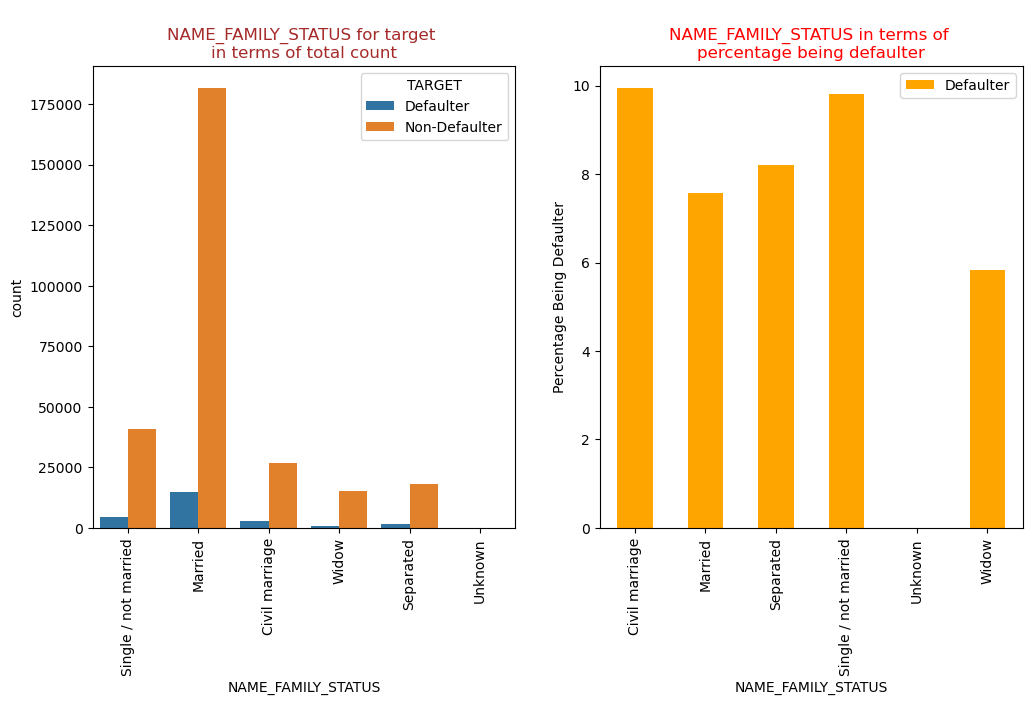

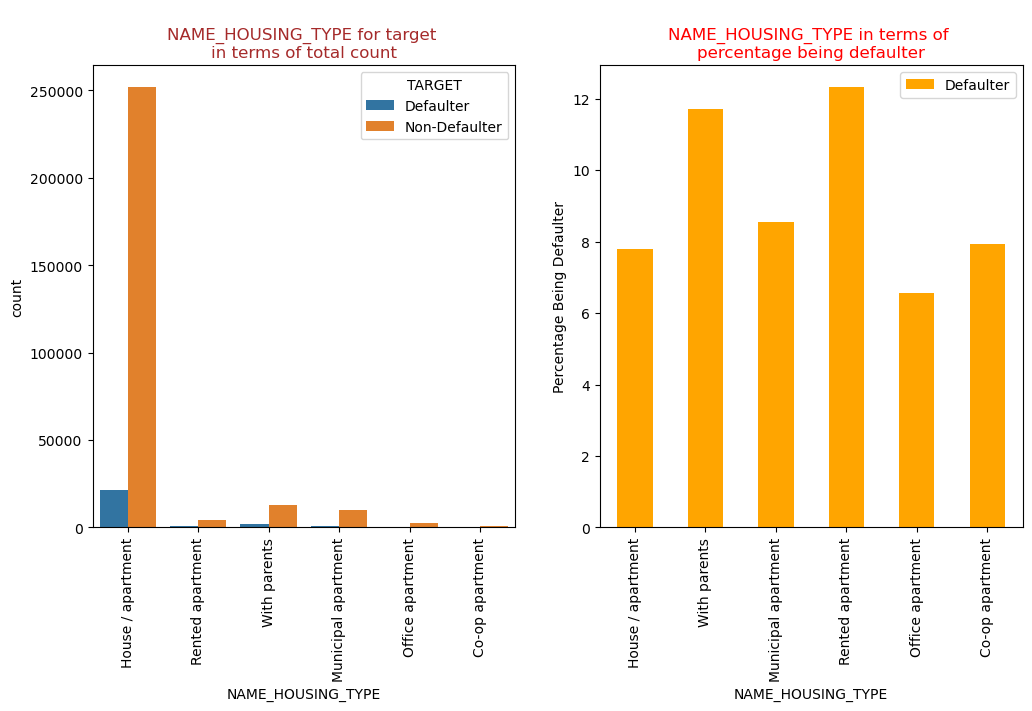

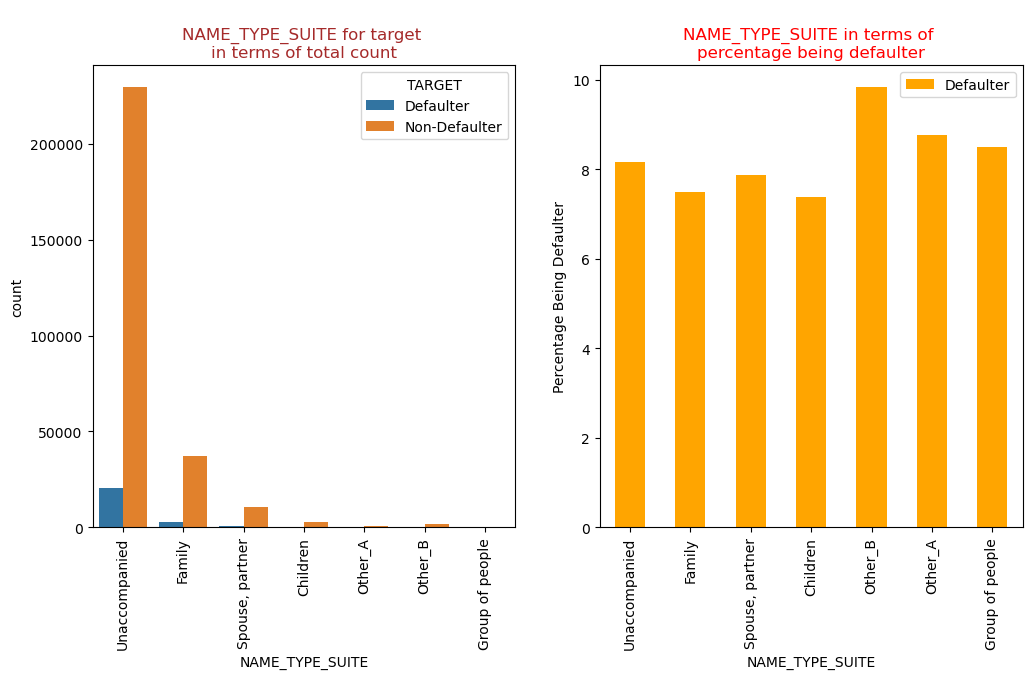

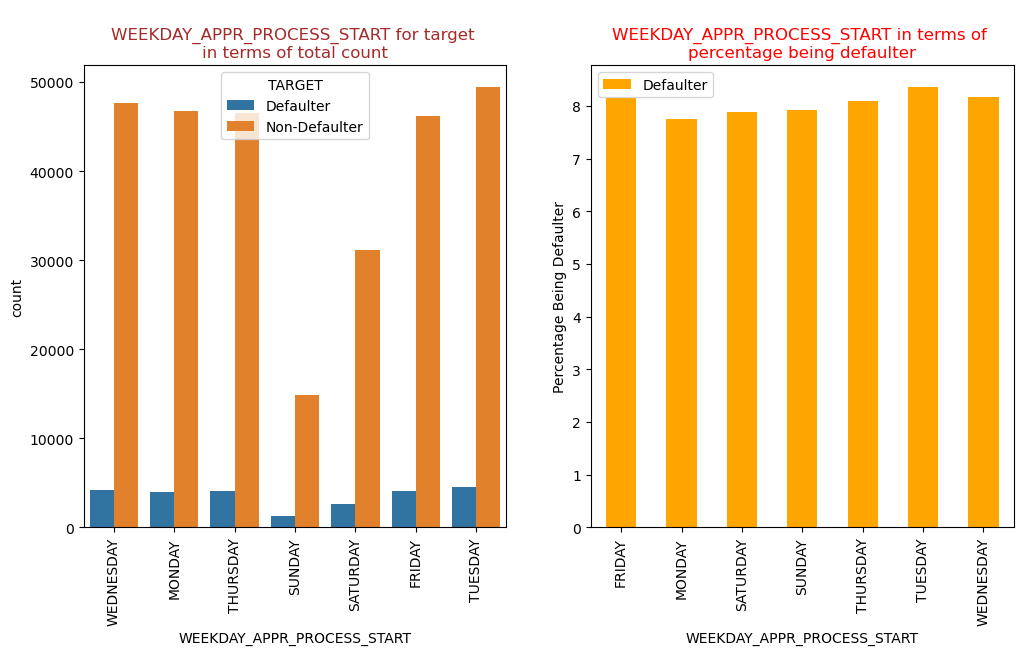

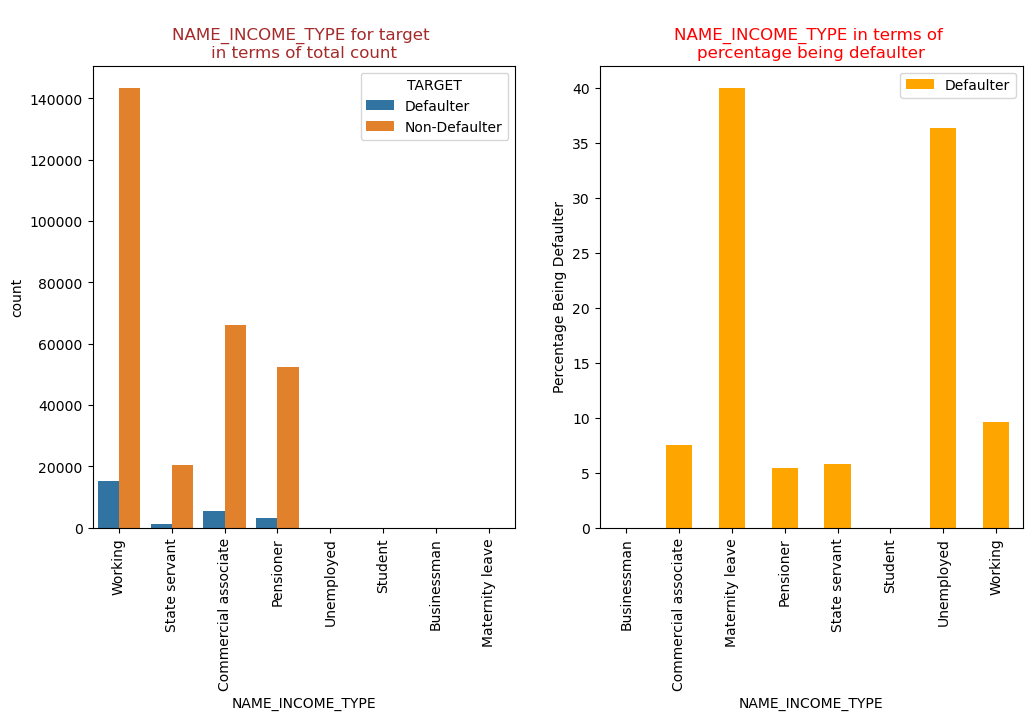

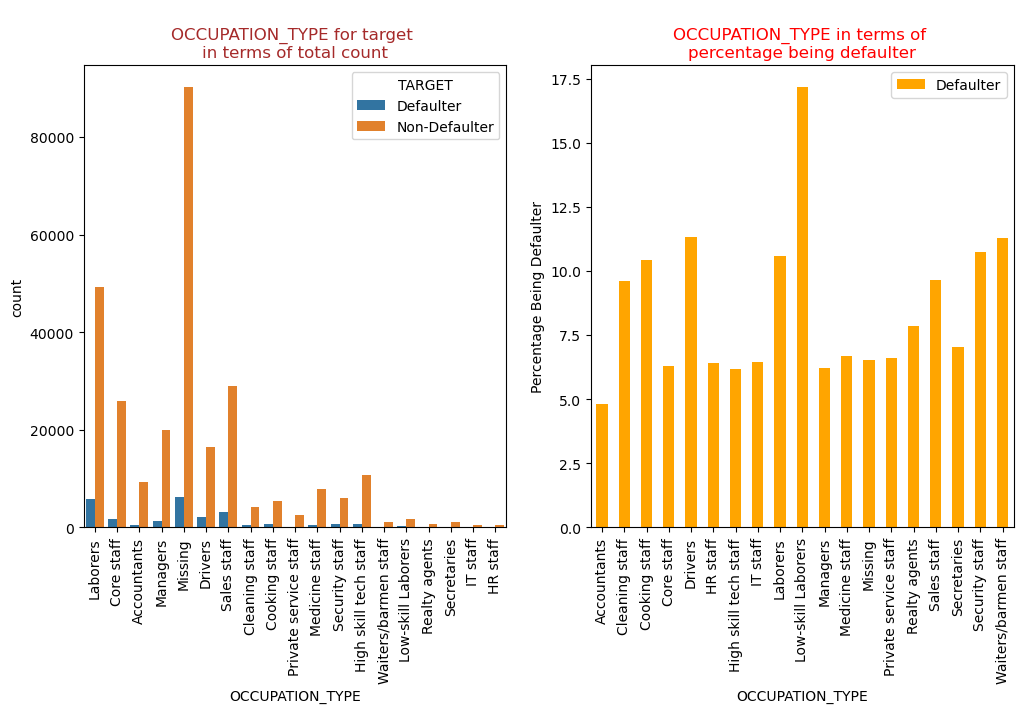

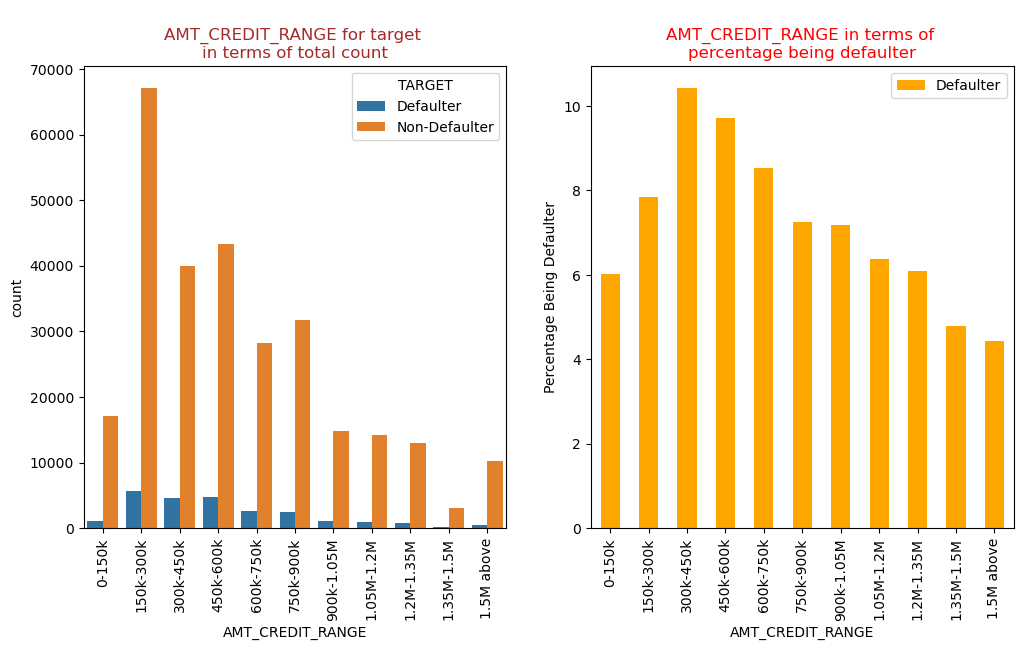

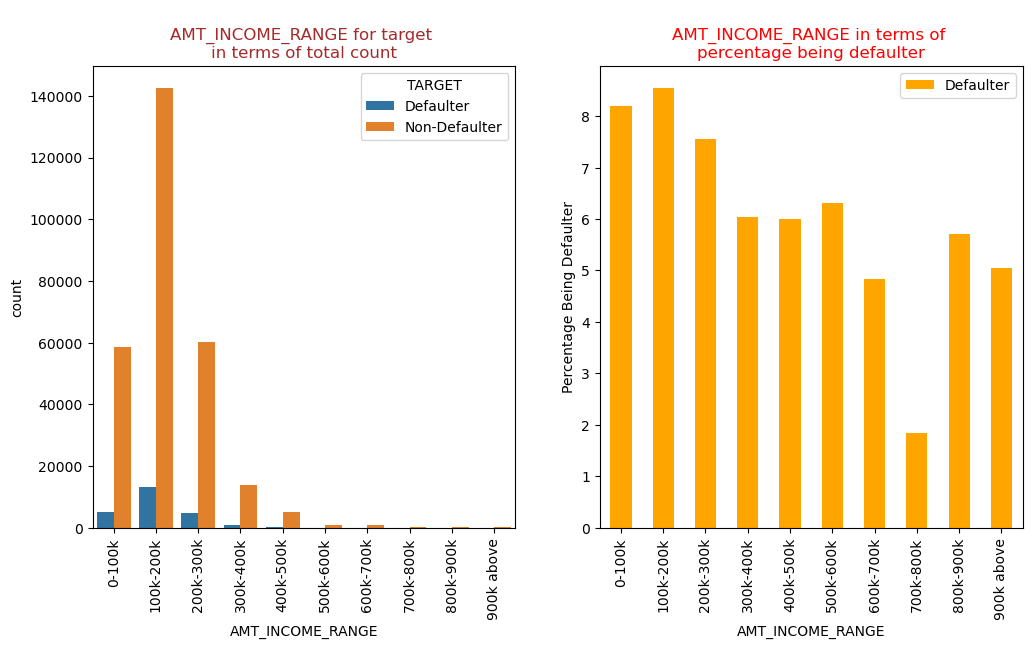

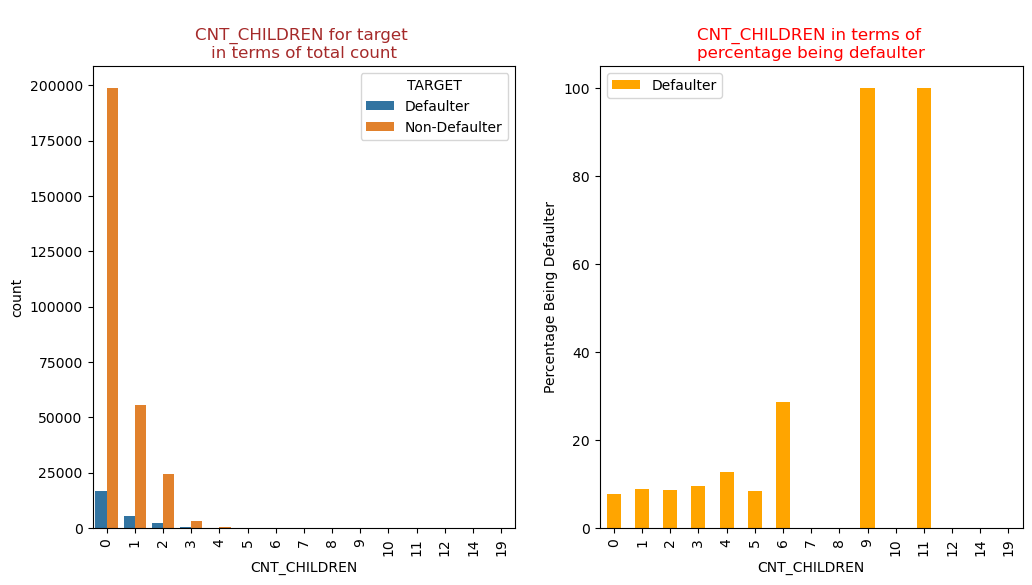

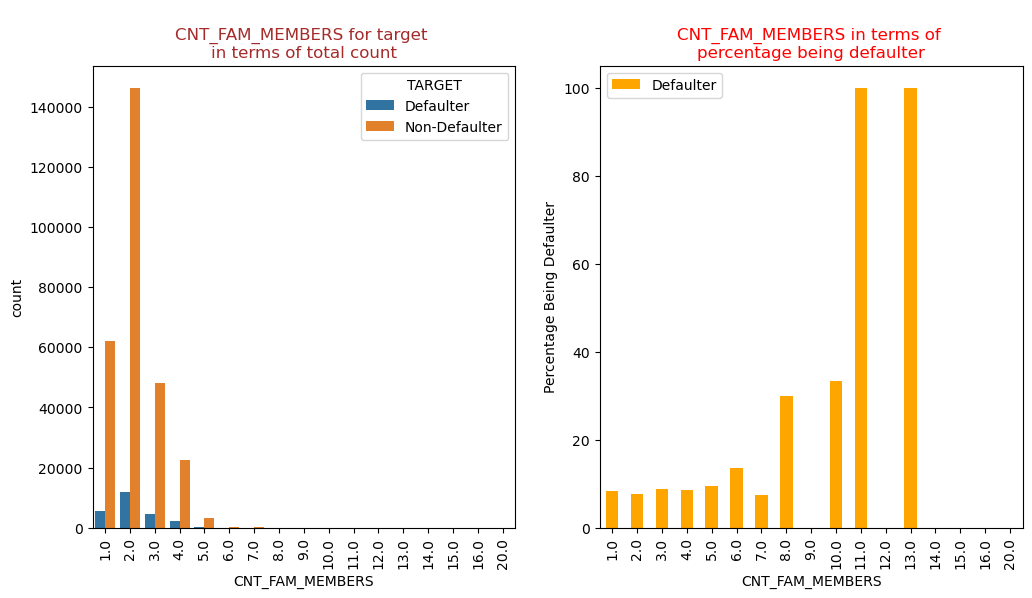

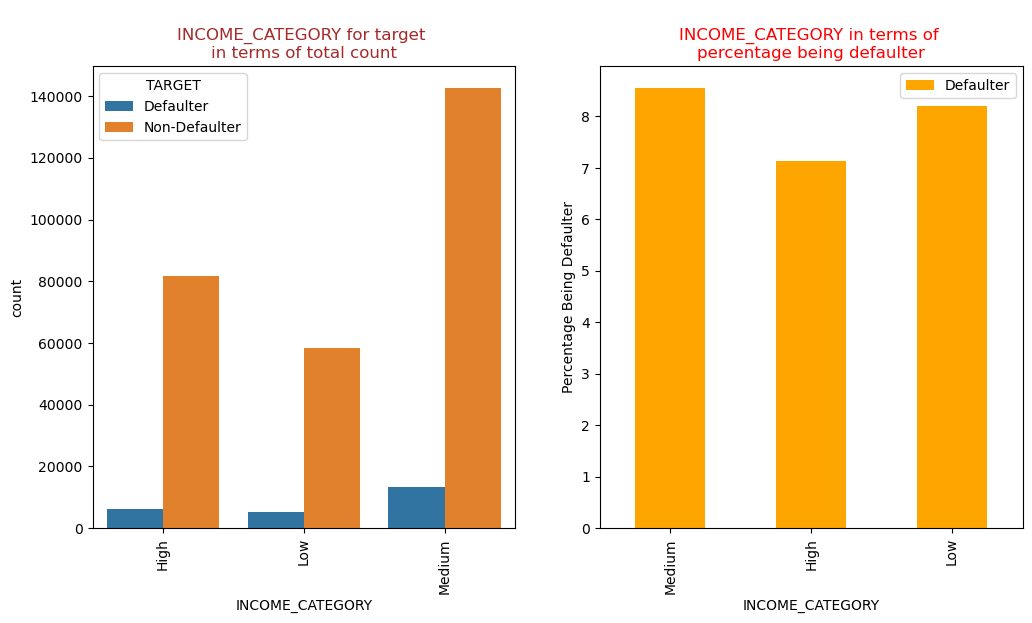

In [84]:
# plotting data for target column in terms of count and percentage
cat_cols = ['CODE_GENDER','NAME_CONTRACT_TYPE','AGE_GROUP','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','NAME_TYPE_SUITE',
            'WEEKDAY_APPR_PROCESS_START','NAME_INCOME_TYPE','OCCUPATION_TYPE']
columns = cat_cols + ['AMT_CREDIT_RANGE','AMT_INCOME_RANGE','CNT_CHILDREN','CNT_FAM_MEMBERS','INCOME_CATEGORY']
# NEED TO ADD COMMENT REGARDING CALCULATION

for i in columns:
    plt.figure(figsize=[12,6])
    axis1=plt.subplot(1,2,1)
    sns.countplot(x= i, hue = 'TARGET', data = df, ax = axis1)
    plt.xticks(rotation=90)
    plt.title((f'\n{i} for target \nin terms of total count'),fontdict={'size':12,'color':'brown'})

    axis2=plt.subplot(1,2,2)
    df_new = pd.DataFrame()
    df_new['Defaulter'] = df_target1[i].value_counts()/df[i].value_counts()*100
    df_new.plot.bar(color='orange',ax = axis2)
    plt.ylabel('Percentage Being Defaulter')
    plt.title((f'\n{i} in terms of \npercentage being defaulter'),fontdict={'size':12,'color':'red'})
    plt.show()

>#### Observation:
>> - CODE_GENDER --> Percentage of male being a defaulter is higher than the female being a defaulter
>> - AGE_GROUP --> Percentage of young people being defaulter is higher than other age groups
>> - INCOME_CATEGORY --> Percentage of being defaulter is very less for High income category people
>> - NAME_EDUCATION_TYPE --> Percentage of being defaulter is very less for High educated people

># BIVARIATE ANALYSIS

>### 1.Numerical-Numerical Bivariate Analysis

In [88]:
# list of NUmerical variables
num_cols = ['CNT_CHILDREN', 'CNT_FAM_MEMBERS', 'AMT_GOODS_PRICE', 'AMT_CREDIT', 'AMT_INCOME_TOTAL', 'AMT_ANNUITY']

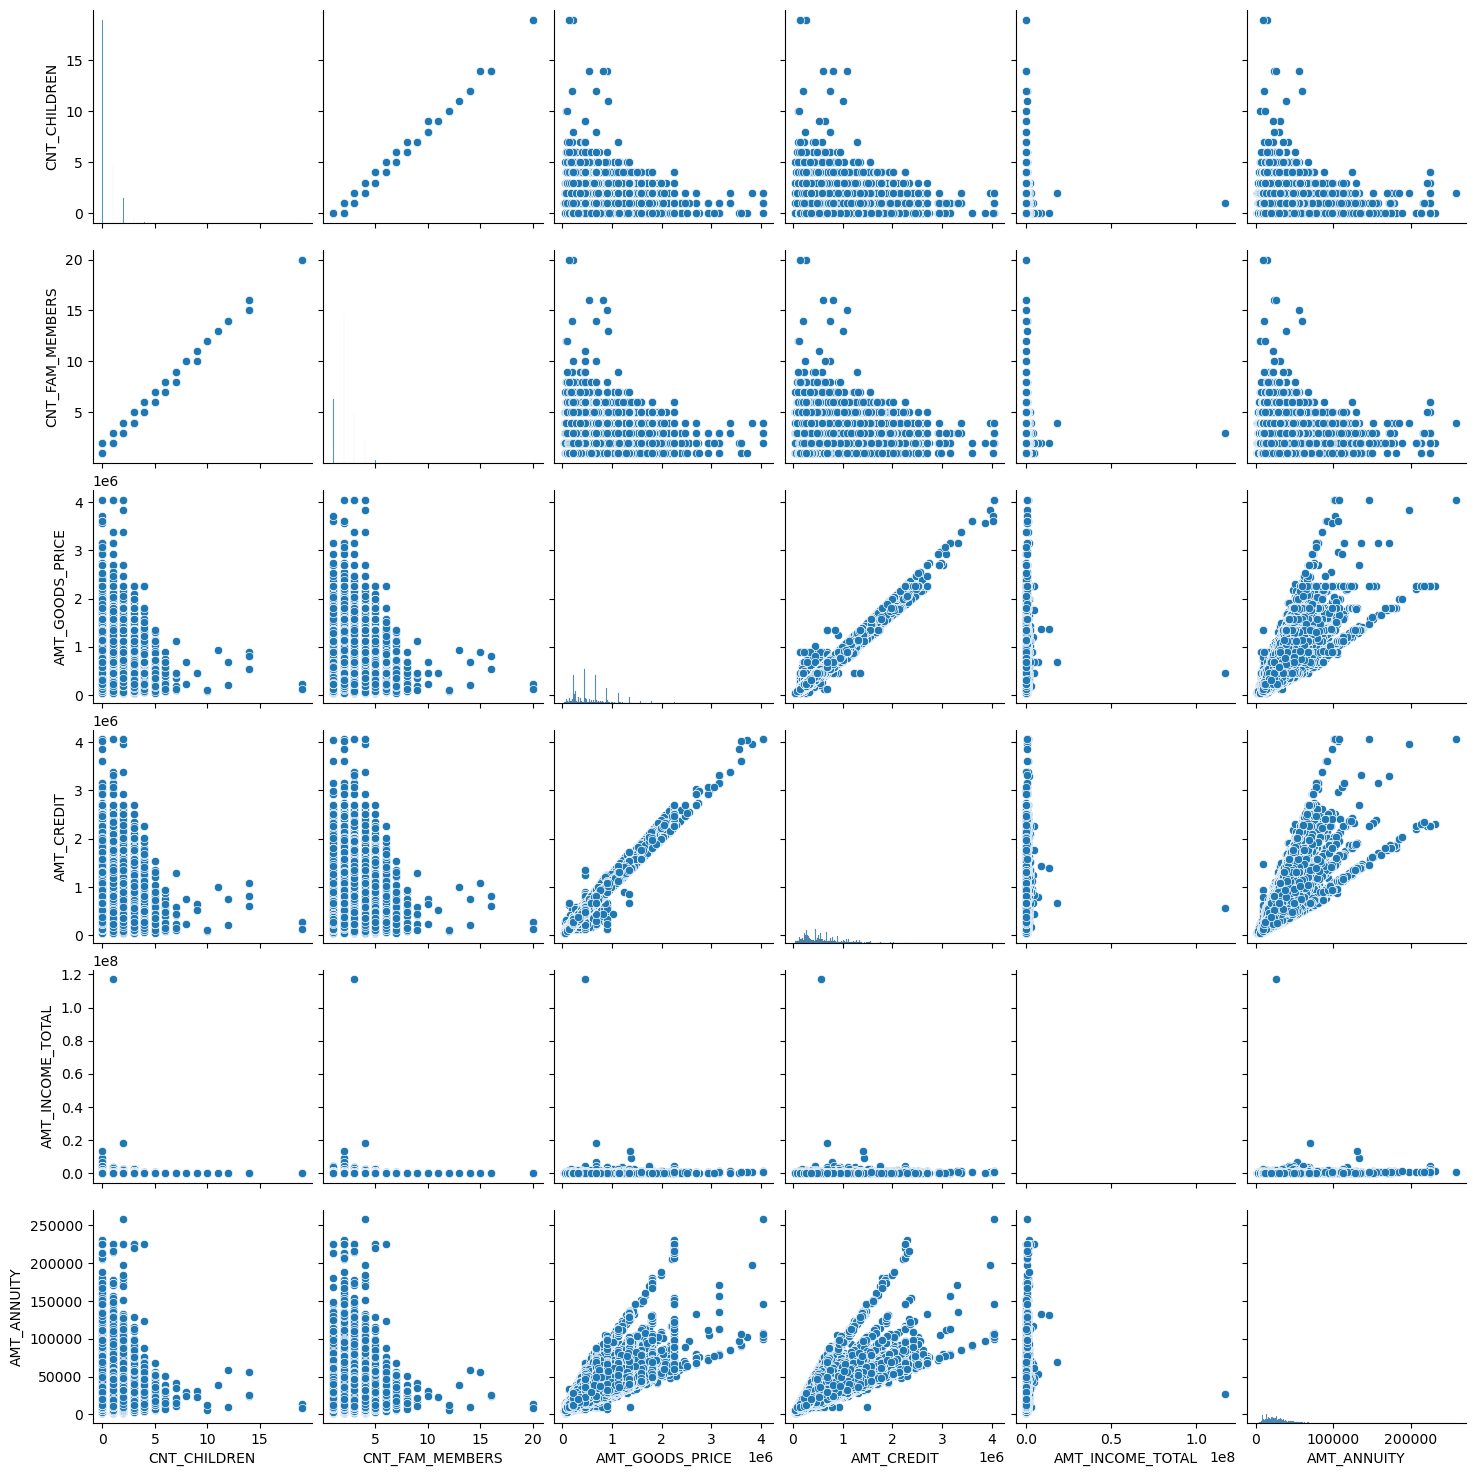

In [89]:
sns.pairplot(df[num_cols])

>#### Observation:
>> - AMT_CREDIT and AMT_GOODS_PRICE shows same trend
>> - AMT_GOODS_PRICE and AMT_ANNUITY are correlated
>> - CNT_CHILDREN and CNT_FAM_MEMBER are correlated

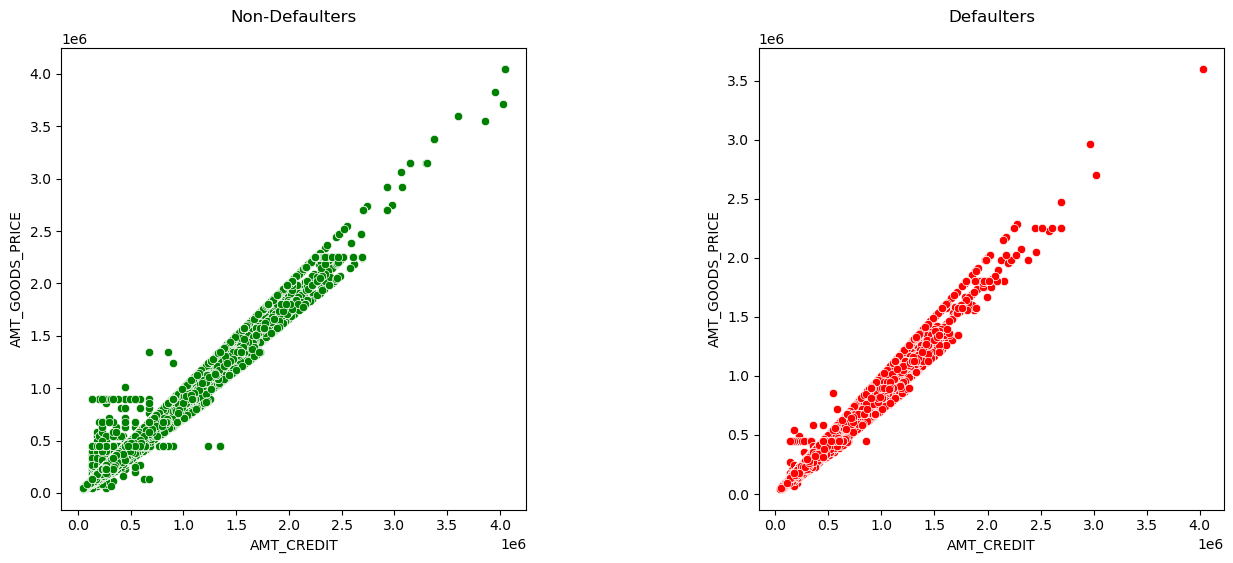

In [91]:
# Bivariate Analysis between 'AMT_CREDIT' & 'AMT_GOODS_PRICE' for Defaulters and Non-Defaulters
plt.figure(figsize=[15,6])
plt.subplot(1,2,1)
plt.title("Non-Defaulters\n", fontsize=12)
sns.scatterplot(x = 'AMT_CREDIT', y = 'AMT_GOODS_PRICE', data = df_target0, color='green')

plt.subplots_adjust(wspace = 0.5)
plt.subplot(1,2,2)
plt.title("Defaulters\n", fontsize=12)
sns.scatterplot(x = 'AMT_CREDIT', y = 'AMT_GOODS_PRICE', data = df_target1, color = 'red')
plt.show()

>#### Observation:
>> - 'AMT_CREDIT' and 'AMT_GOODS_PRICE' are showing the same kind of trend in both the cases for defaulter as well as non defaulter

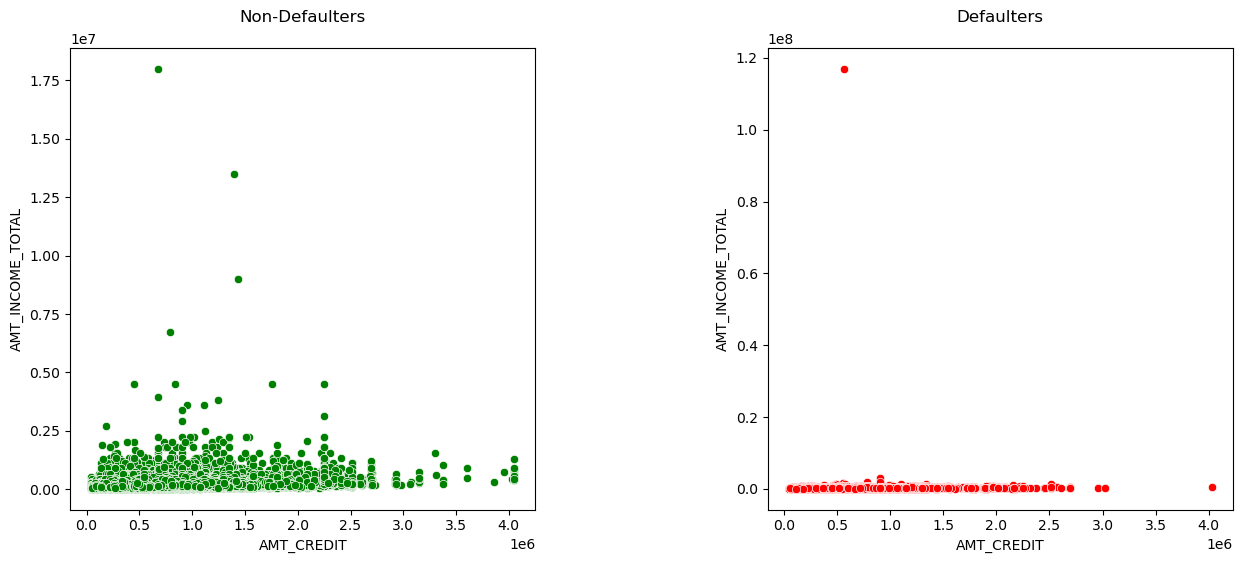

In [93]:
# Bivariate Analysis between 'AMT_CREDIT' & 'AMT_INCOME_TOTAL' for Defaulters and Non-Defaulters
plt.figure(figsize=[15,6])
plt.subplot(1,2,1)
plt.title("Non-Defaulters\n", fontsize=12)
sns.scatterplot(x = 'AMT_CREDIT', y = 'AMT_INCOME_TOTAL', data = df_target0, color='green')

plt.subplots_adjust(wspace = 0.5)
plt.subplot(1,2,2)
plt.title("Defaulters\n", fontsize=12)
sns.scatterplot(x = 'AMT_CREDIT', y = 'AMT_INCOME_TOTAL', data = df_target1, color = 'red')
plt.show()

>#### Observation:
>> - Clients with low AMT_INCOME_TOTAL being more likely to default, regardless of the credit amount.

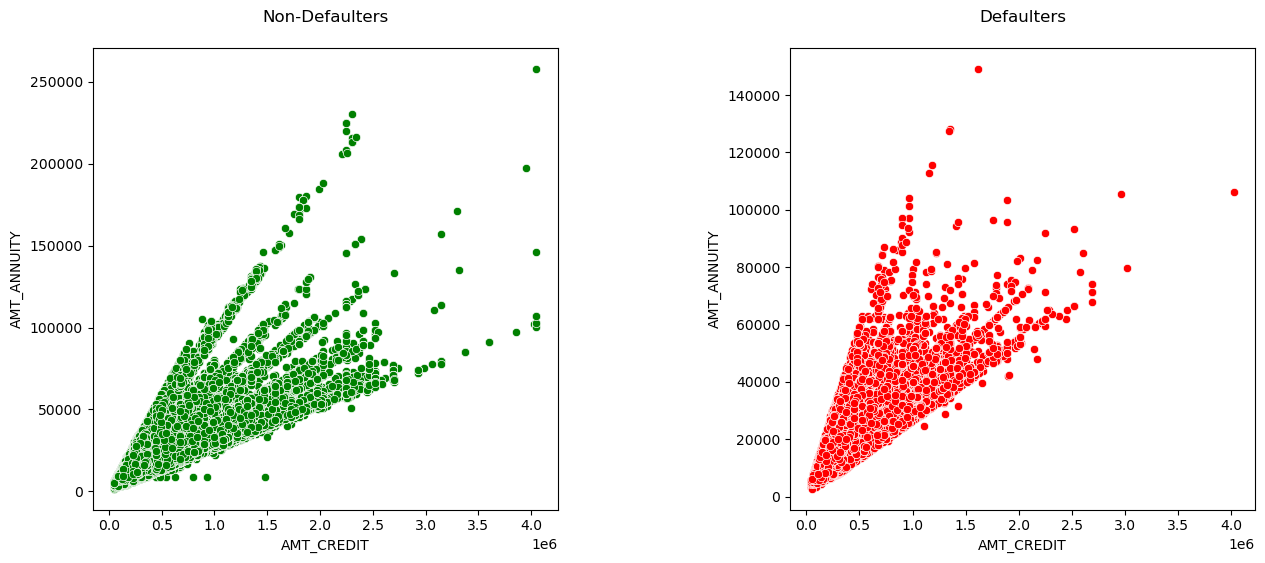

In [95]:
# Bivariate Analysis between 'AMT_CREDIT' & 'AMT_ANNUITY' for Defaulters and Non-Defaulters
plt.figure(figsize=[15,6])
plt.subplot(1,2,1)
plt.title("Non-Defaulters\n", fontsize=12)
sns.scatterplot(x = 'AMT_CREDIT', y = 'AMT_ANNUITY', data = df_target0, color='green')

plt.subplots_adjust(wspace = 0.5)
plt.subplot(1,2,2)
plt.title("Defaulters\n", fontsize=12)
sns.scatterplot(x = 'AMT_CREDIT', y = 'AMT_ANNUITY', data = df_target1, color = 'red')
plt.show()

>#### Observation:
>> - There is positive relationship between AMT_ANNUITY and AMT_CREDIT for both the cases but we can see for Defaulters the slope is slightly more than the Non-defaulter so we can say that clients having more Annuity amount for low credit are more likely to be defaulters

>### 2.Numerical-Categorical Bivariate Analysis

In [98]:
# list of categorical columns
cat_cols = ['CODE_GENDER', 'NAME_CONTRACT_TYPE', 'AGE_GROUP', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 
            'NAME_TYPE_SUITE', 'WEEKDAY_APPR_PROCESS_START', 'NAME_INCOME_TYPE', 'OCCUPATION_TYPE']

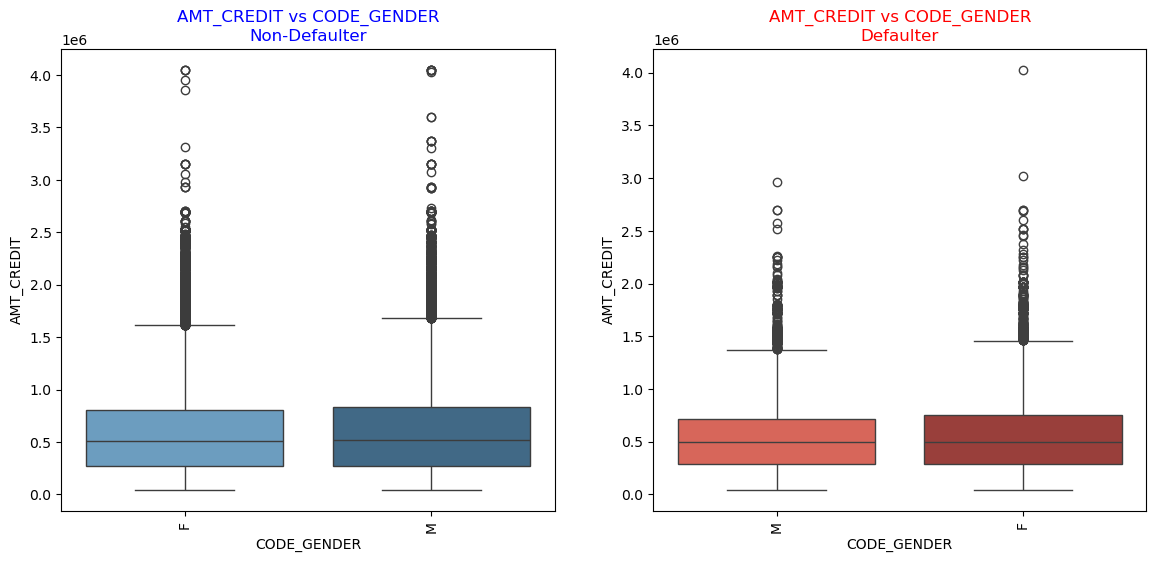

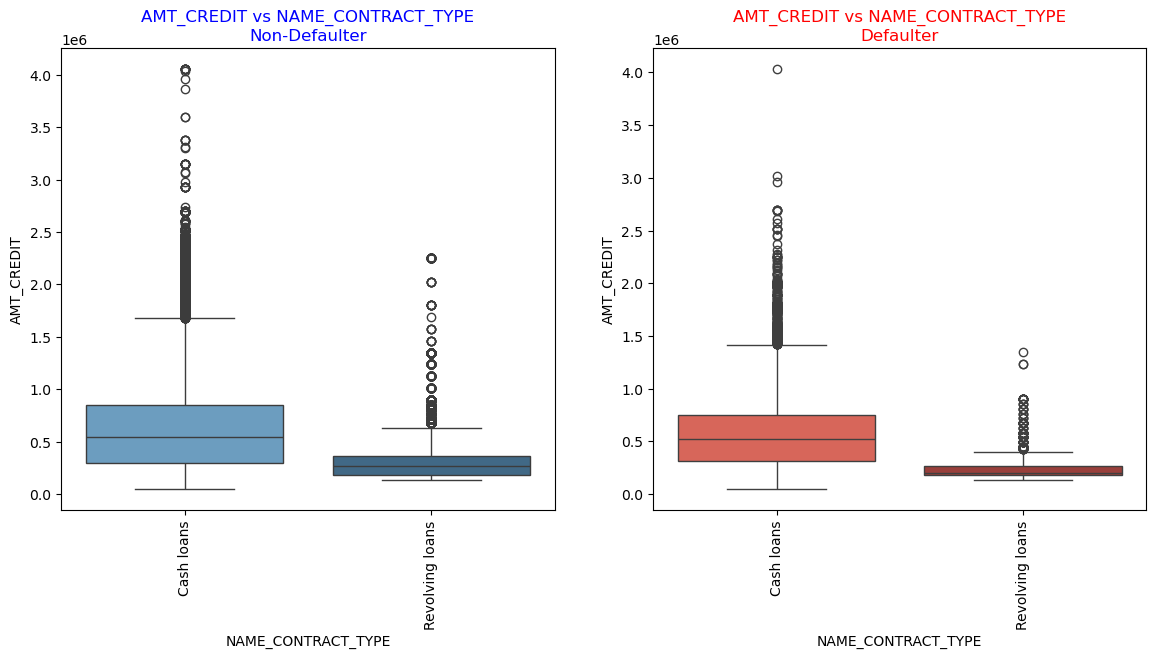

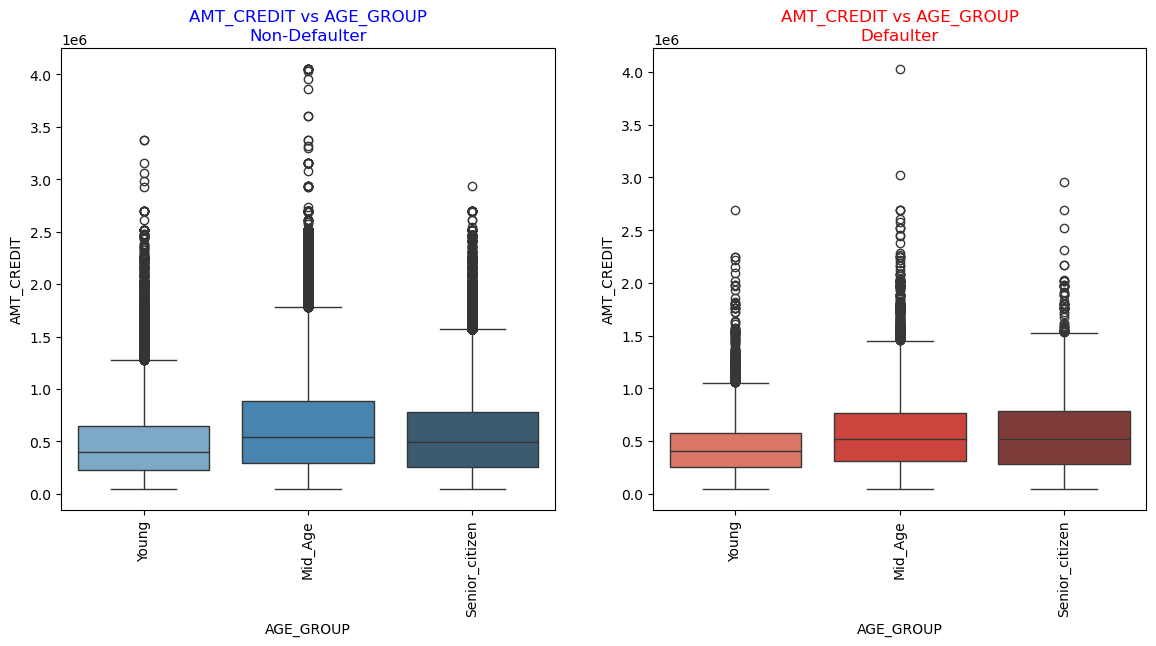

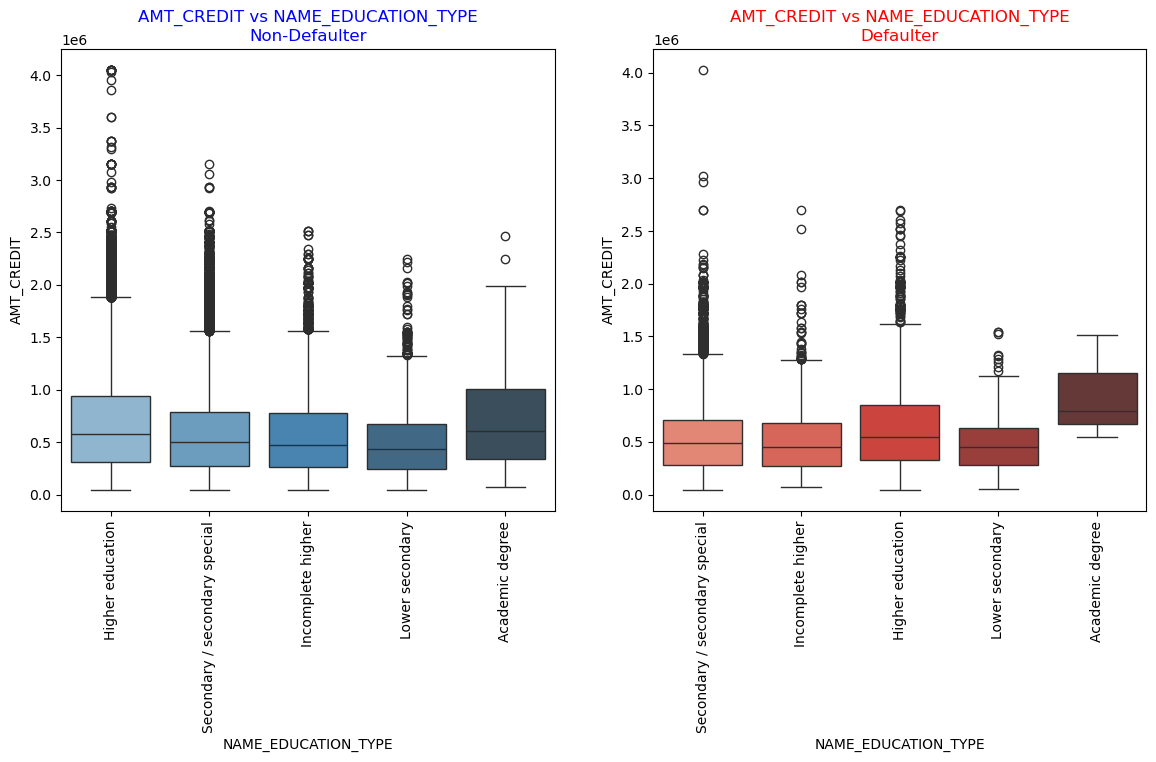

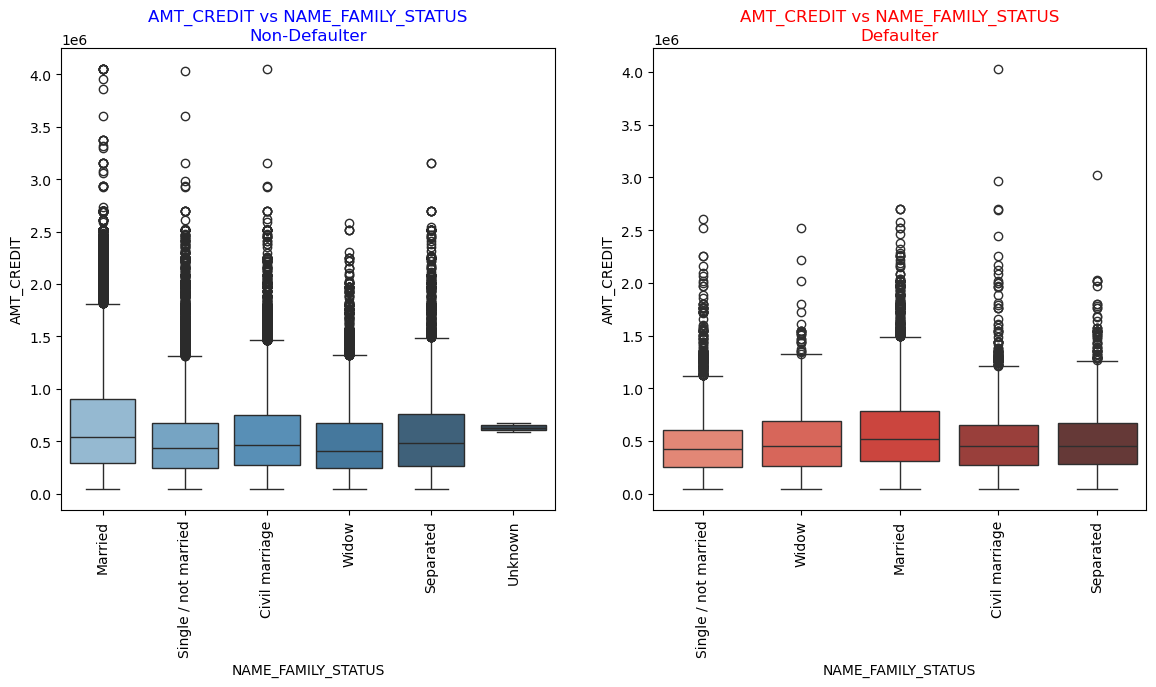

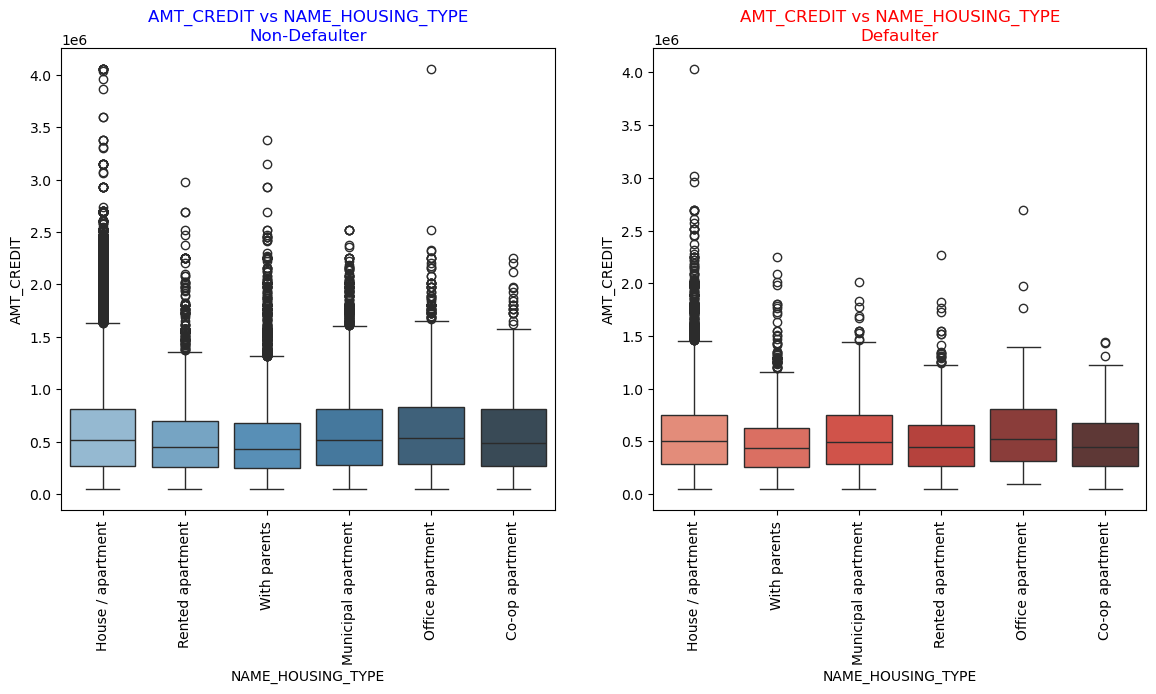

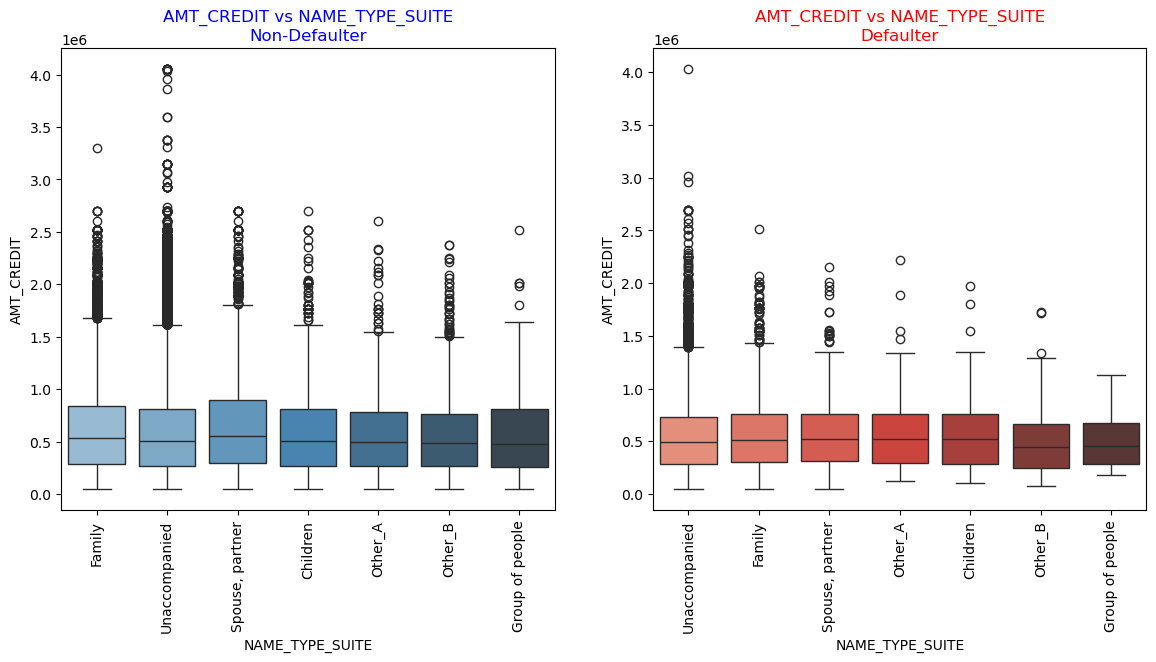

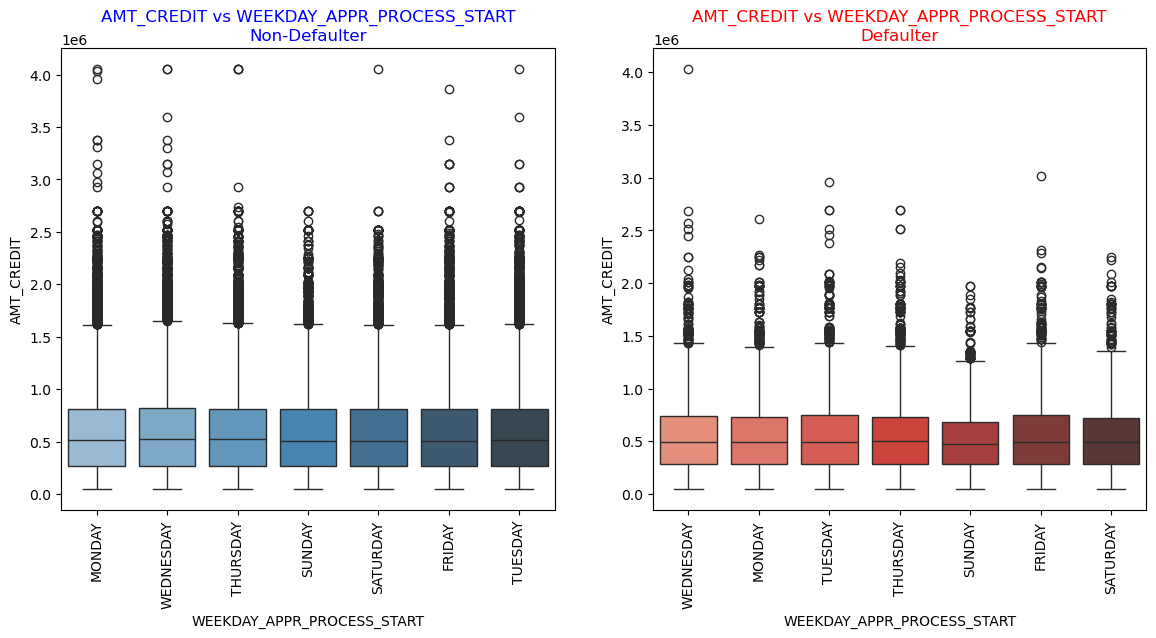

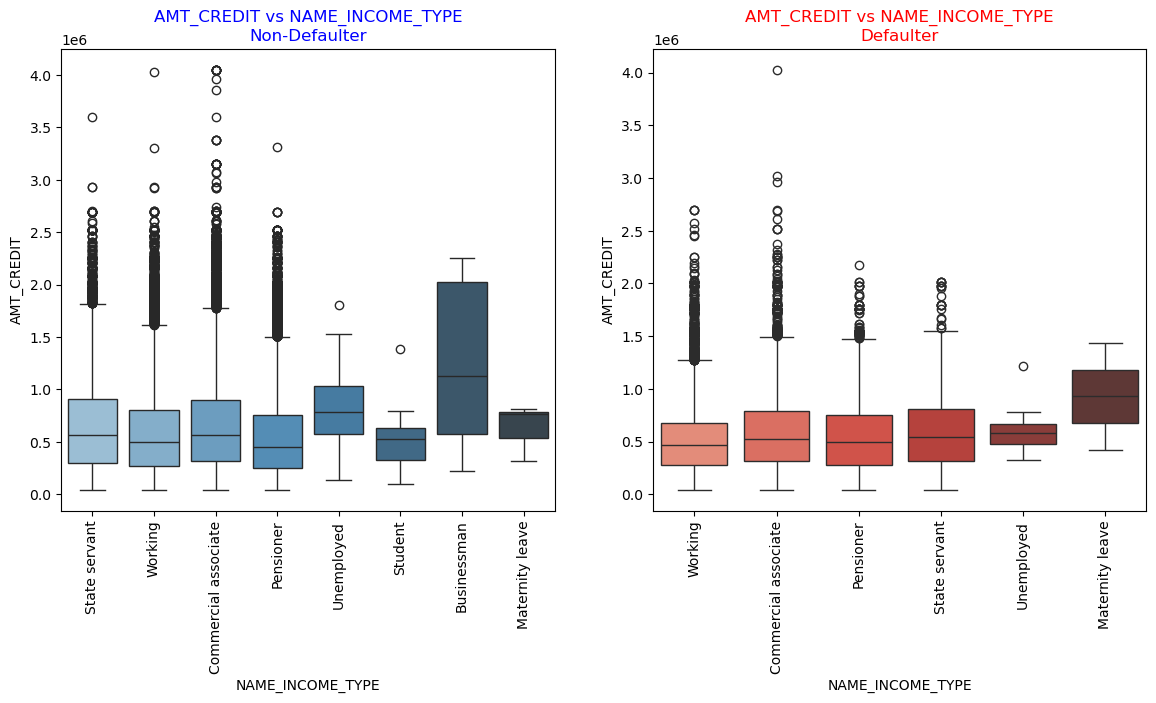

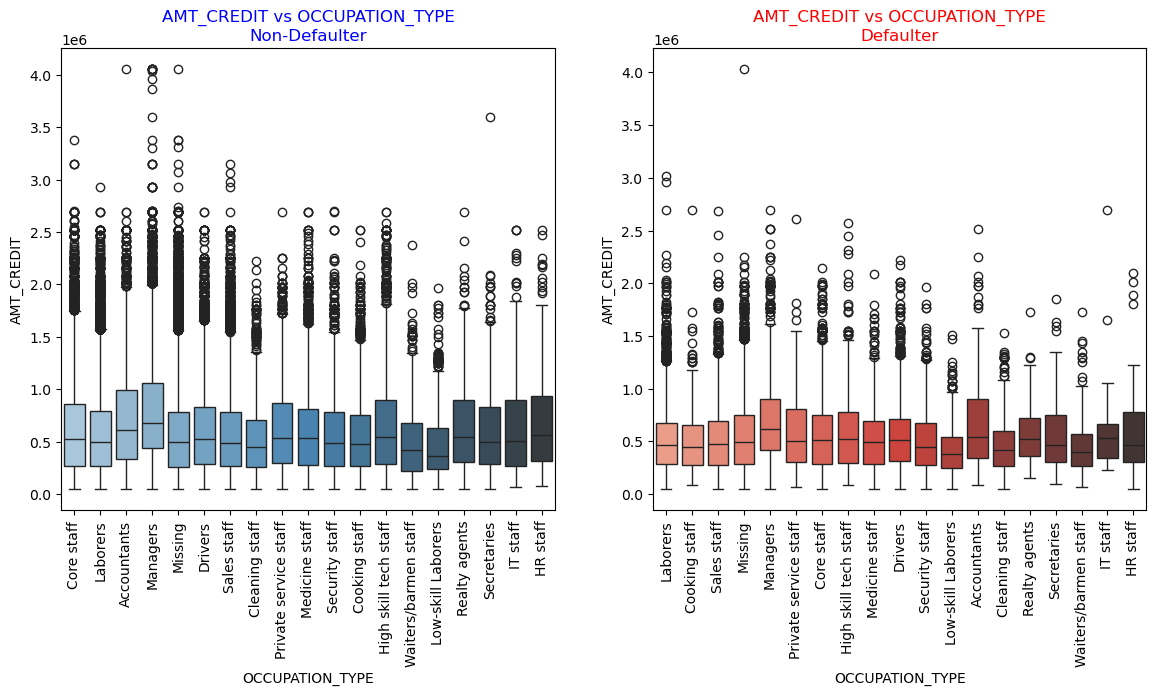

In [99]:
# plotting box plots for all the categorical columns for AMT_CREDIT
for i,j in enumerate(cat_cols):
    plt.figure(figsize=[14,6])
    plt.subplot(1,2,1)
    sns.boxplot(x = j, y = 'AMT_CREDIT', data=df_target0, palette='Blues_d')
    plt.title(('AMT_CREDIT vs '+j+'\nNon-Defaulter') , fontdict = {'size':12, 'color':'blue'})
    plt.xticks(rotation=90)
    
    plt.subplot(1,2,2)
    sns.boxplot(x = j, y = 'AMT_CREDIT', data=df_target1 ,palette='Reds_d')
    plt.title(('AMT_CREDIT vs '+j+'\nDefaulter') , fontdict = {'size':12, 'color':'red'})
    plt.xticks(rotation=90)
    plt.subplots_adjust(wspace=0.2, hspace=0.5)

>#### Observation:
>> 1. There is no credit amount differnce between genders in both the cases
>> 2. Credit amount of the loans are very low for Revolving loans in both the cases
>> 3. Clients having Academic degree with higher Credit amount of loan are more likely to be a defaulter
>> 4. Credit amount of the loans are high for married people in both the cases
>> 5. Credit amount of the loans are low for clients with rented appartment in both the cases
>> 6. Credit amount of the loans for Business man is very high and none of them is defaulter and Client with maternity leave and having high credit amount of loans are more likely to be a defaulter
>> 7. Credit amount of the loans are high for Managers and Accountants in both the cases

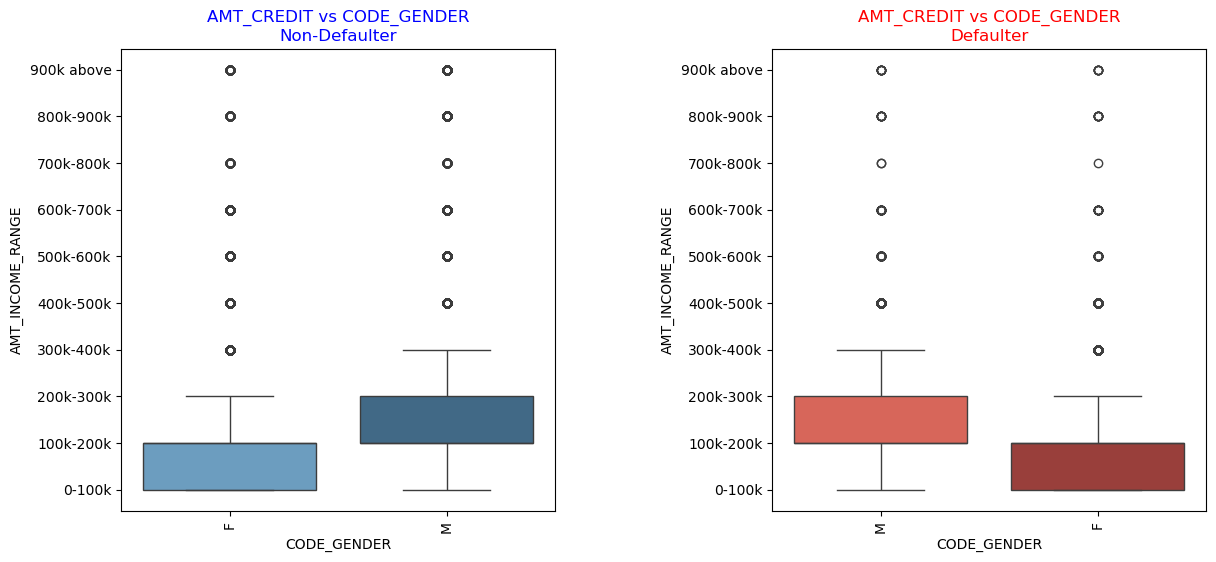

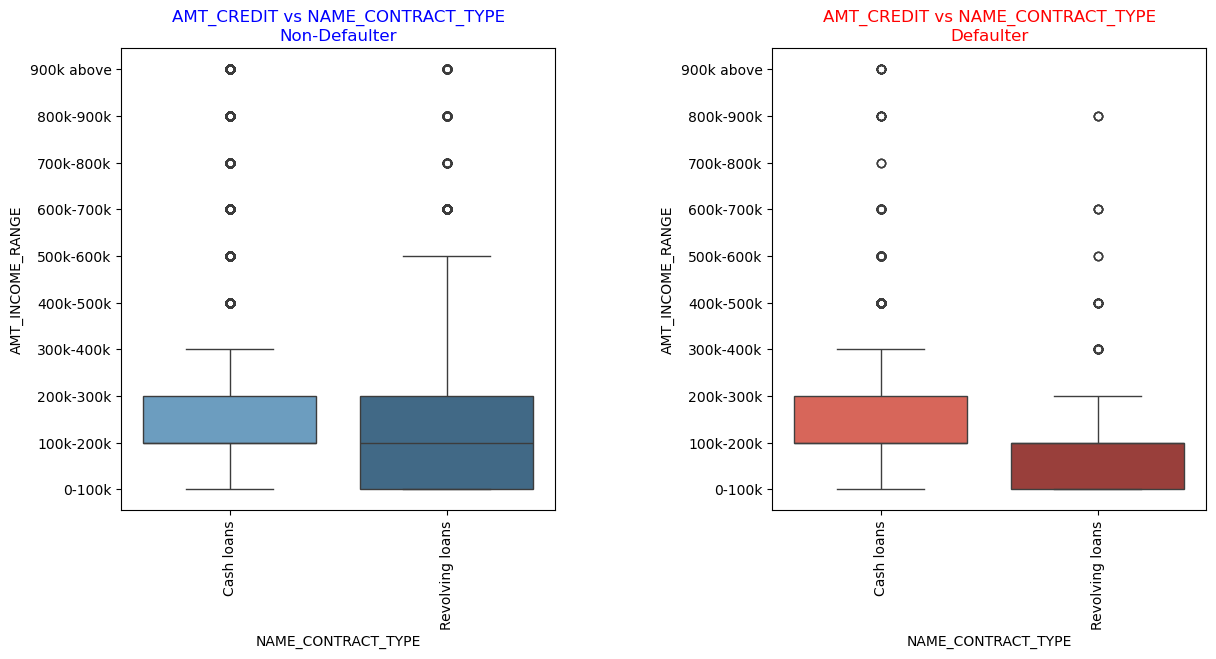

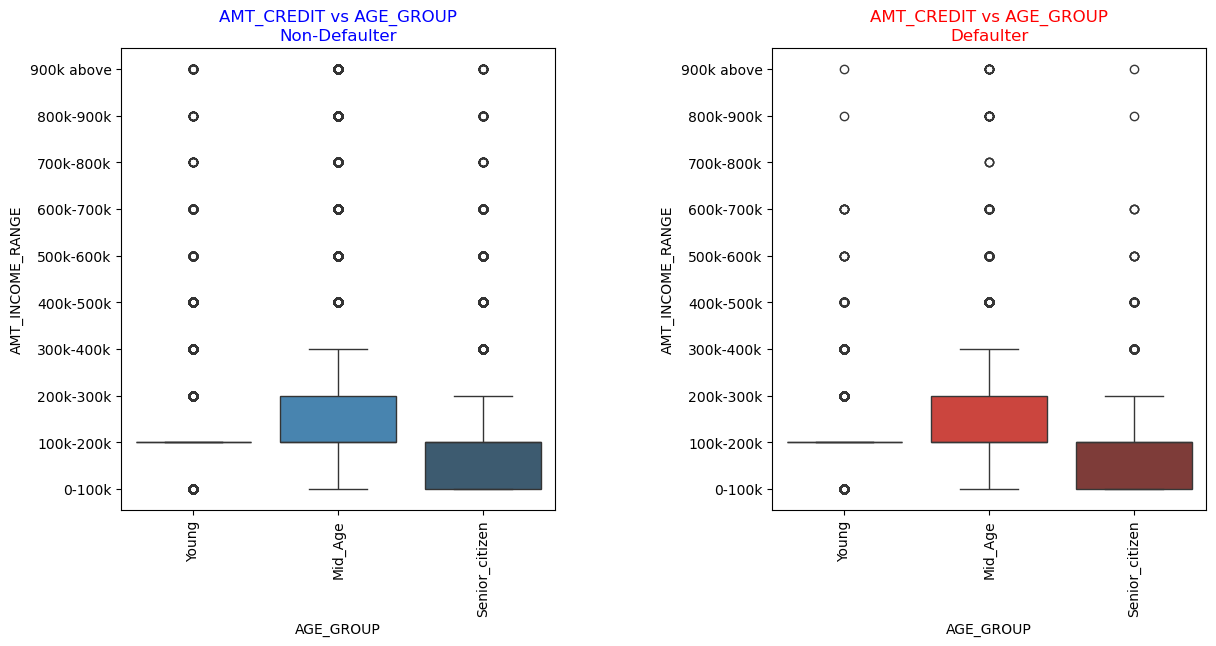

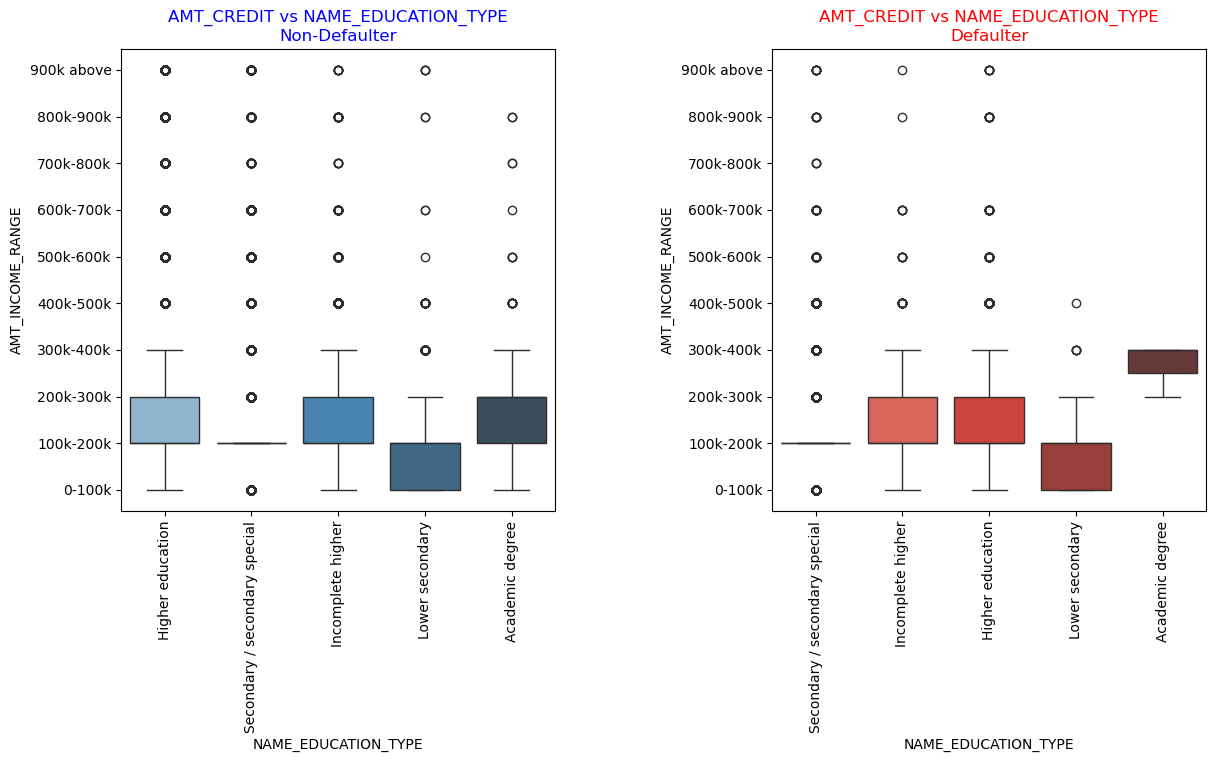

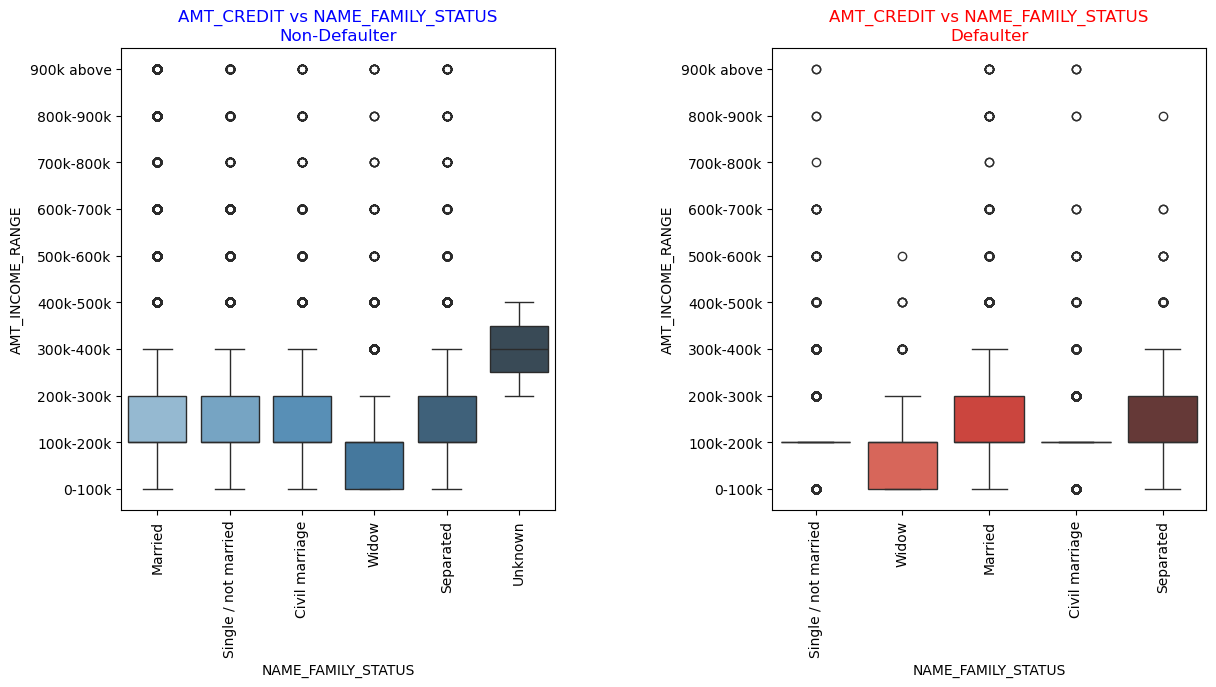

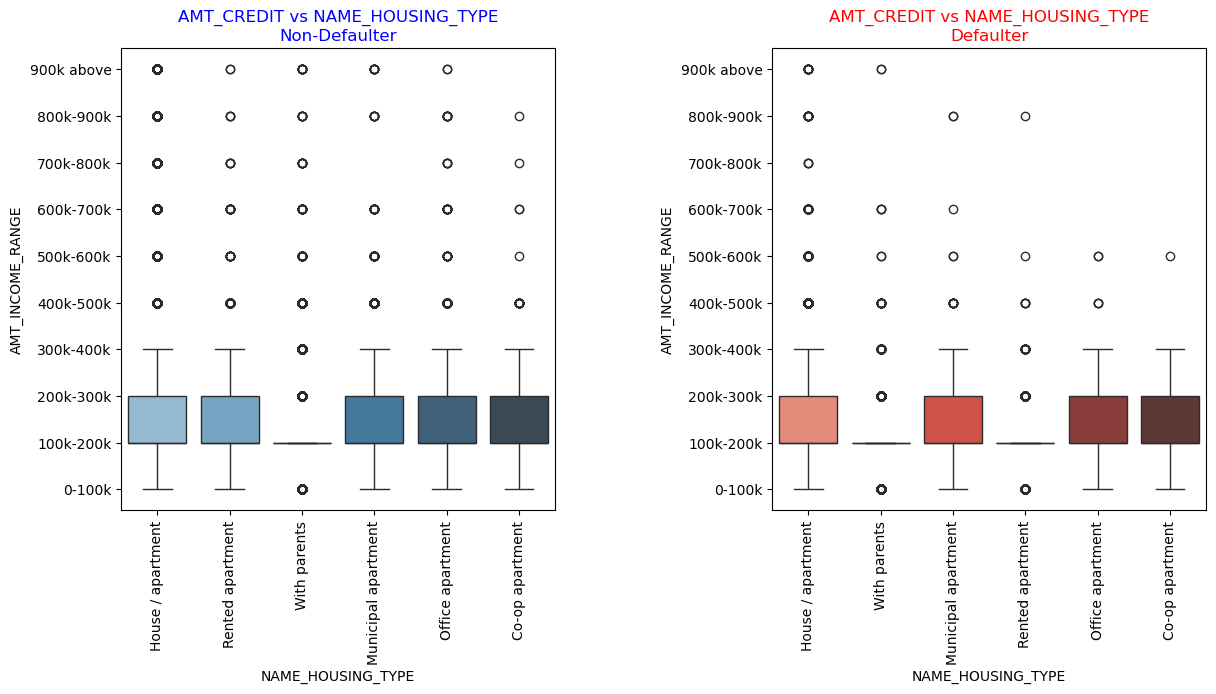

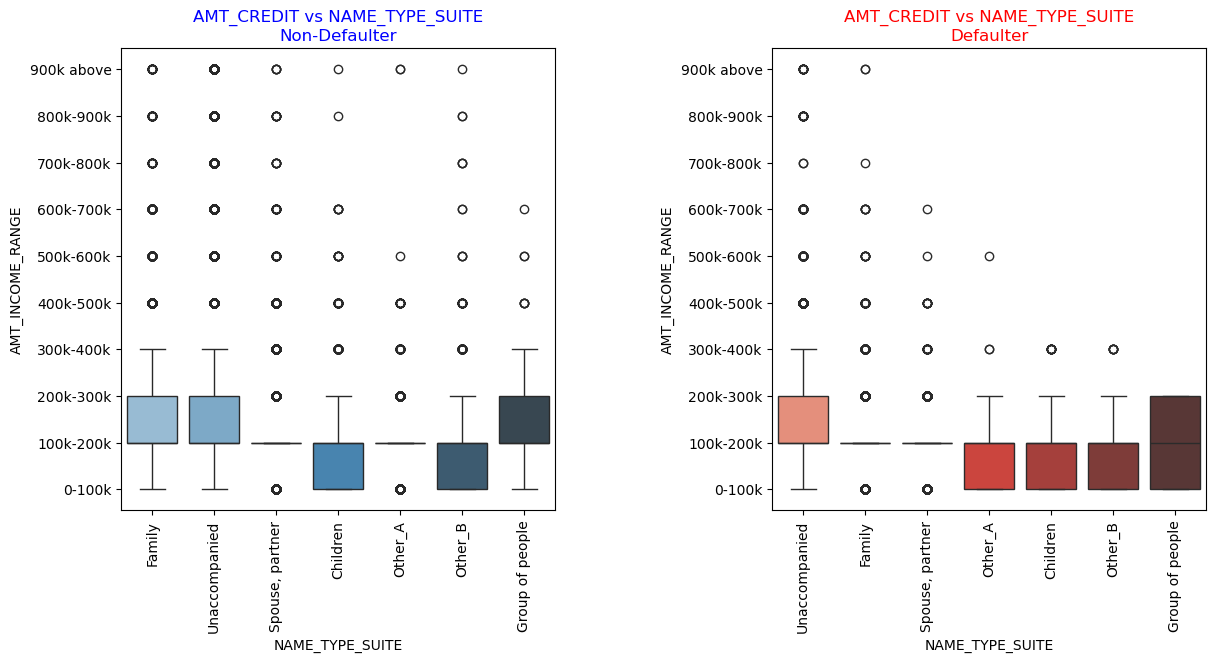

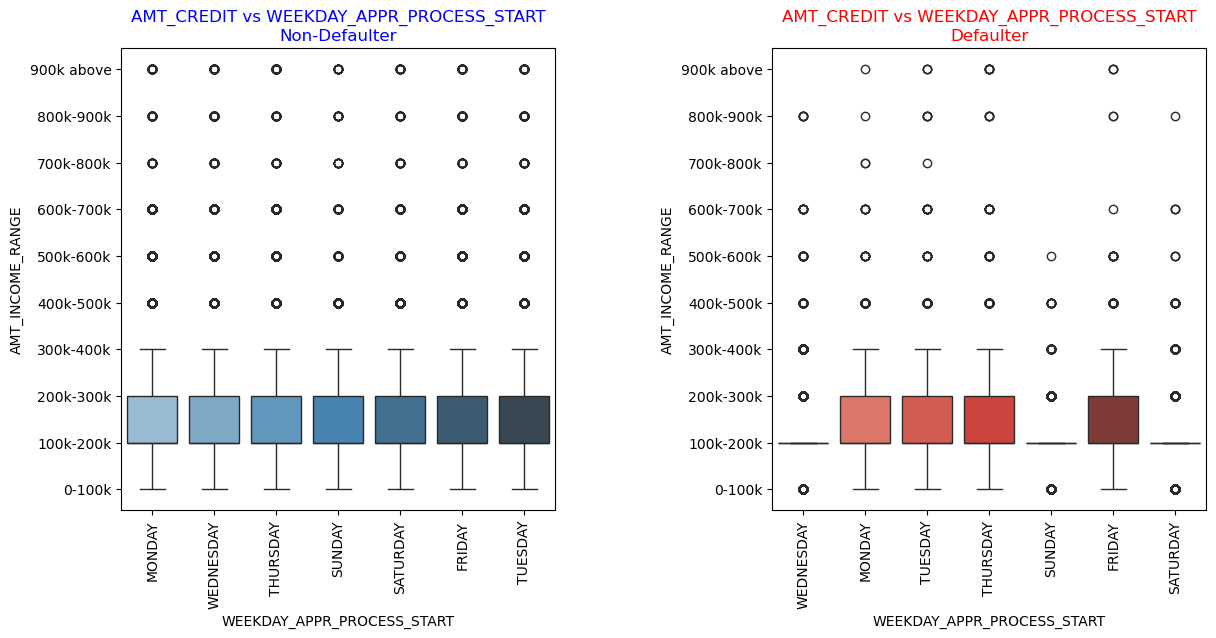

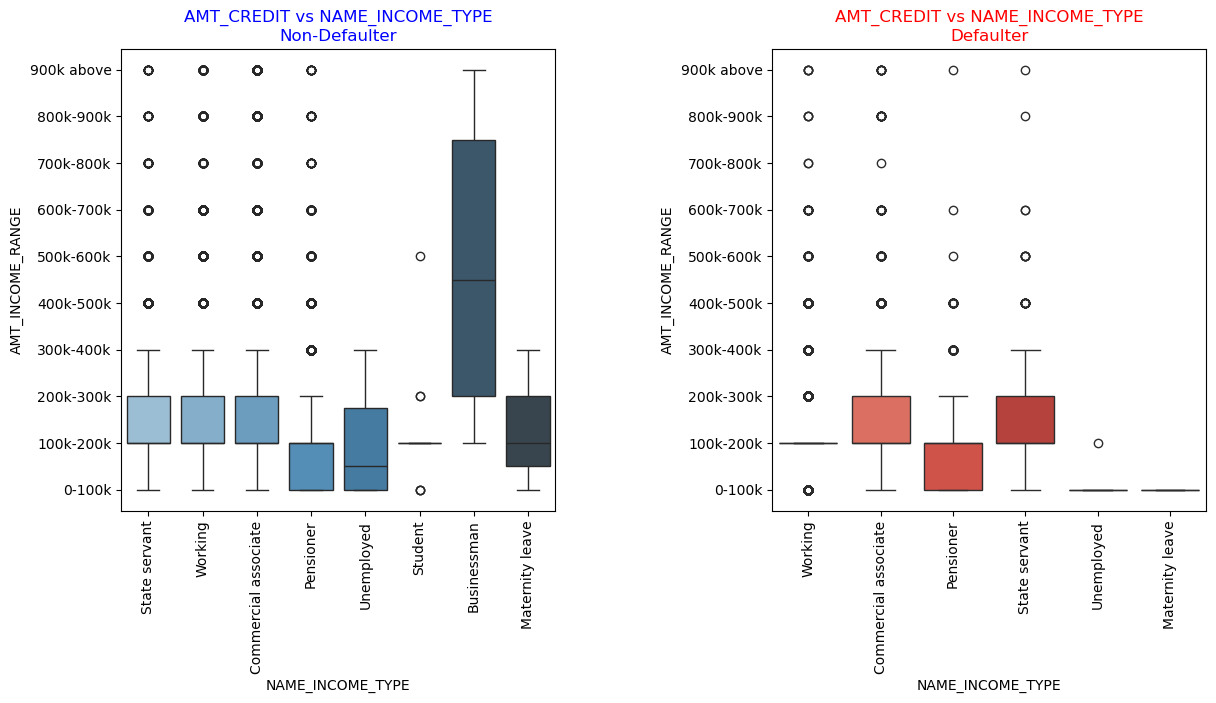

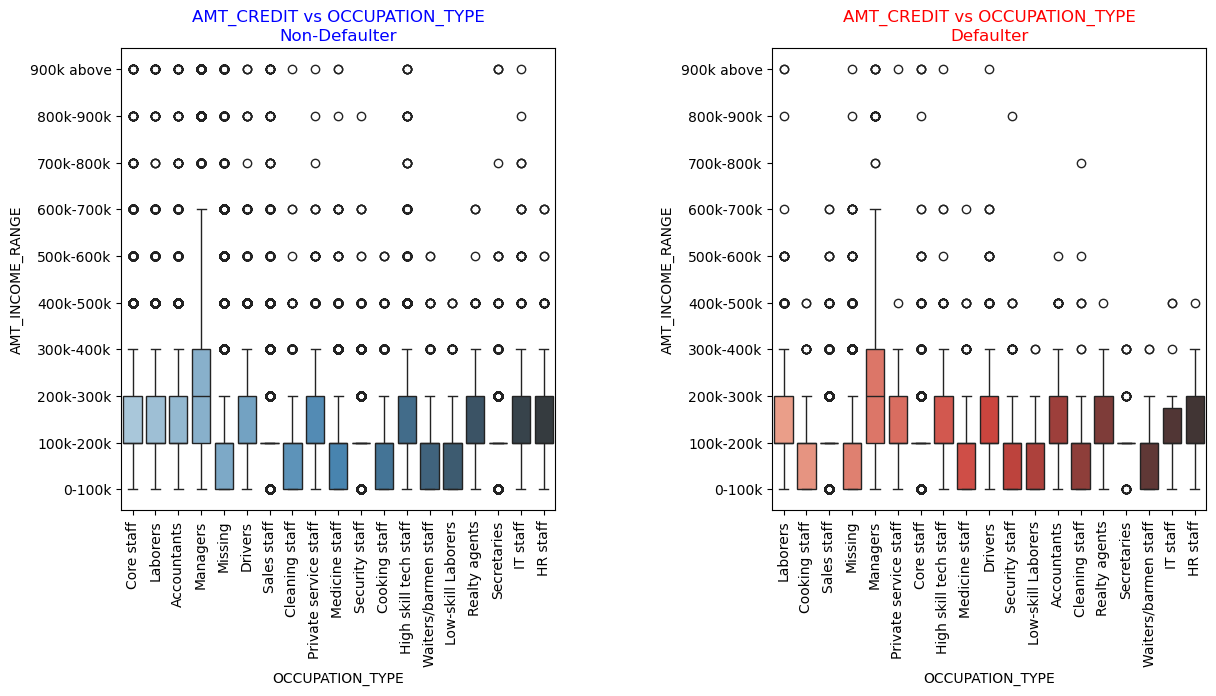

In [101]:
# plotting box plots for all the categorical columns for AMT_INCOME_RANGE
for i,j in enumerate(cat_cols):
    plt.figure(figsize=[14,6])
    plt.subplot(1,2,1)
    sns.boxplot(x = j, y = 'AMT_INCOME_RANGE', data=df_target0, palette='Blues_d')
    plt.title(('AMT_CREDIT vs '+j+'\nNon-Defaulter') , fontdict = {'size':12, 'color':'blue'})
    plt.xticks(rotation=90)
    plt.gca().invert_yaxis()
    
    plt.subplot(1,2,2)
    sns.boxplot(x = j, y = 'AMT_INCOME_RANGE', data=df_target1 ,palette='Reds_d')
    plt.title(('AMT_CREDIT vs '+j+'\nDefaulter') , fontdict = {'size':12, 'color':'red'})
    plt.xticks(rotation=90)
    plt.gca().invert_yaxis()
    plt.subplots_adjust(wspace=0.5, hspace=0.5)

>#### Observation:
>> 1. There is no income amount differnce between genders in both the cases
>> 2. Clients having revolving loan and less amount of income are more likely to be a defaulter
>> 3. There is no income amount differnce between any age groups in both the cases
>> 4. Clients who are Single/Unmarried or having civil marraige with less amount of income are more likely to be a defaulter
>> 5. Clients with rented apartment having less income are more likely to be a defaulter
>> 6. Clients who are working, Unemployed or on Maternity Leave having less income are more likely to be a defaulter

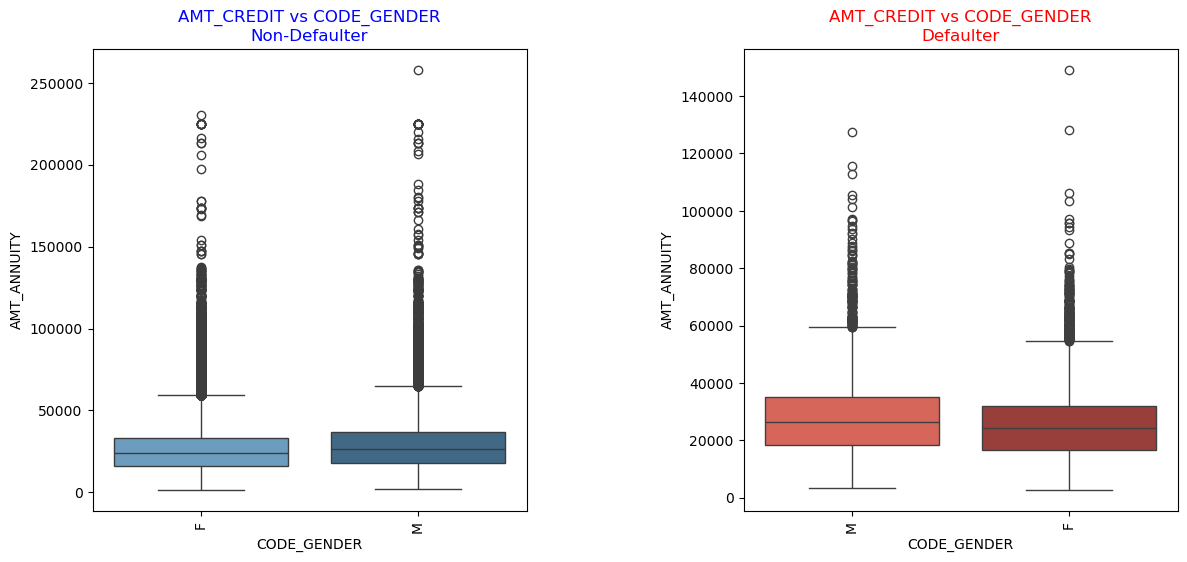

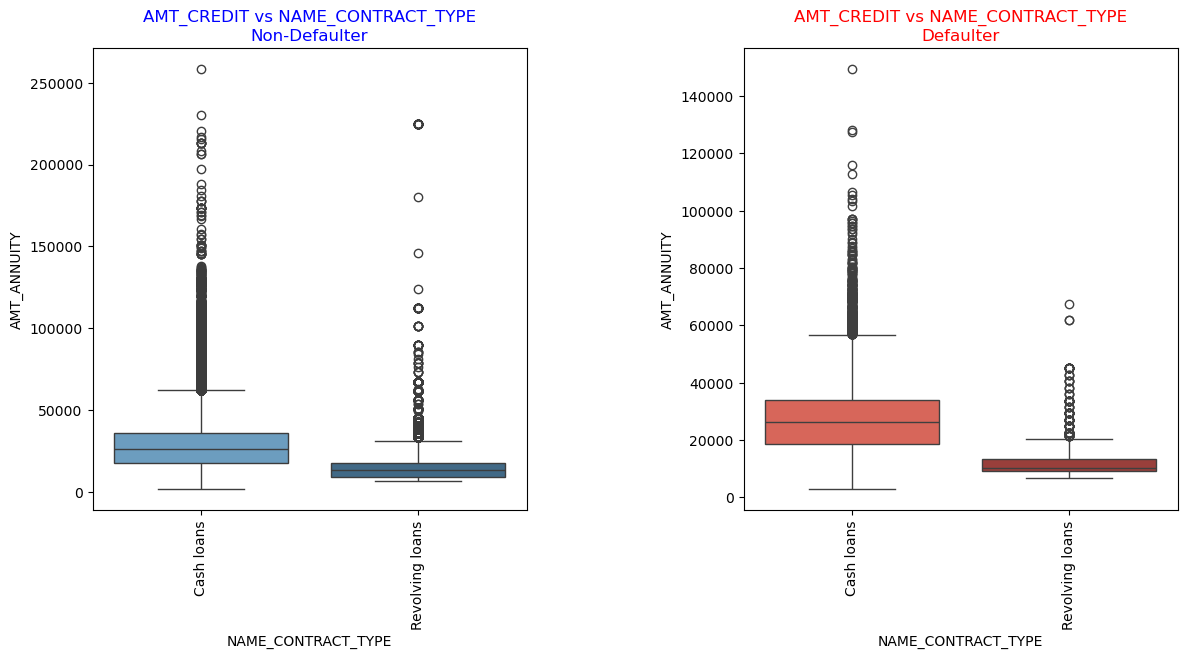

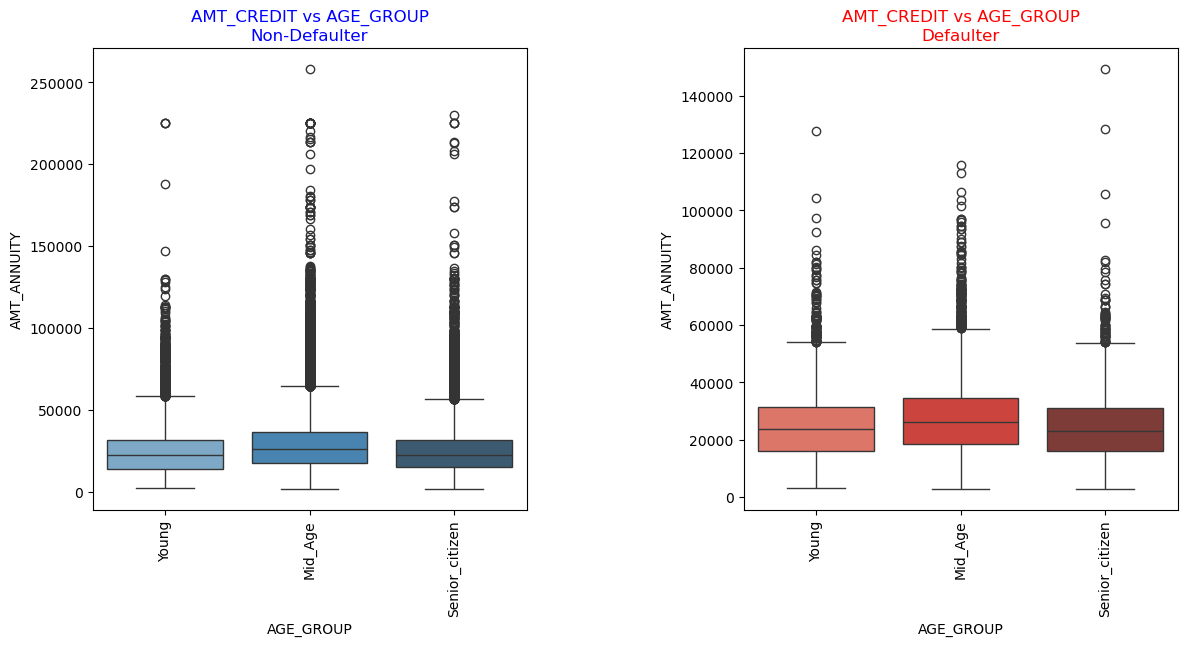

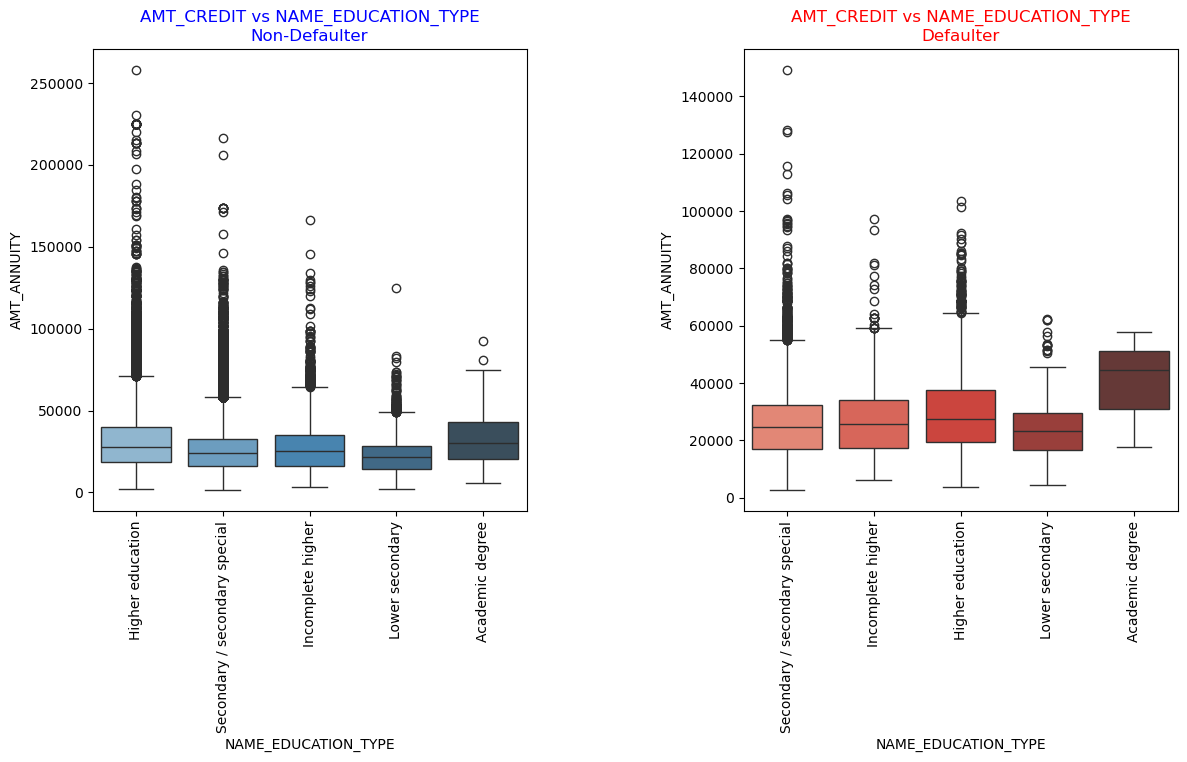

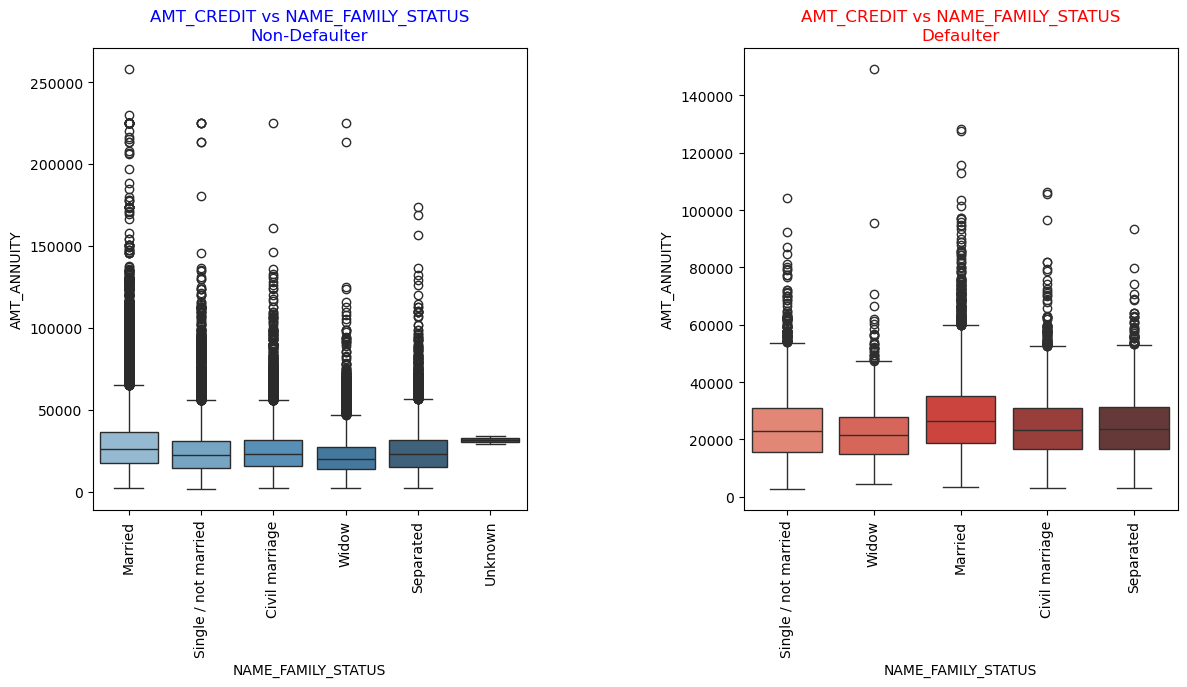

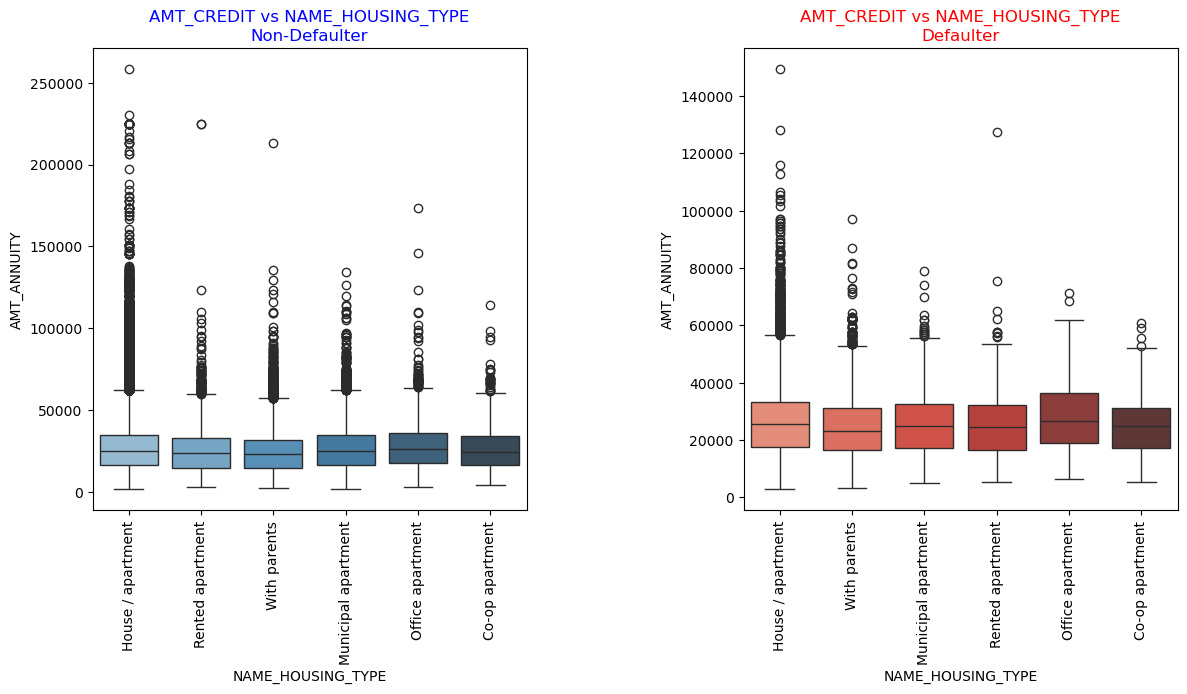

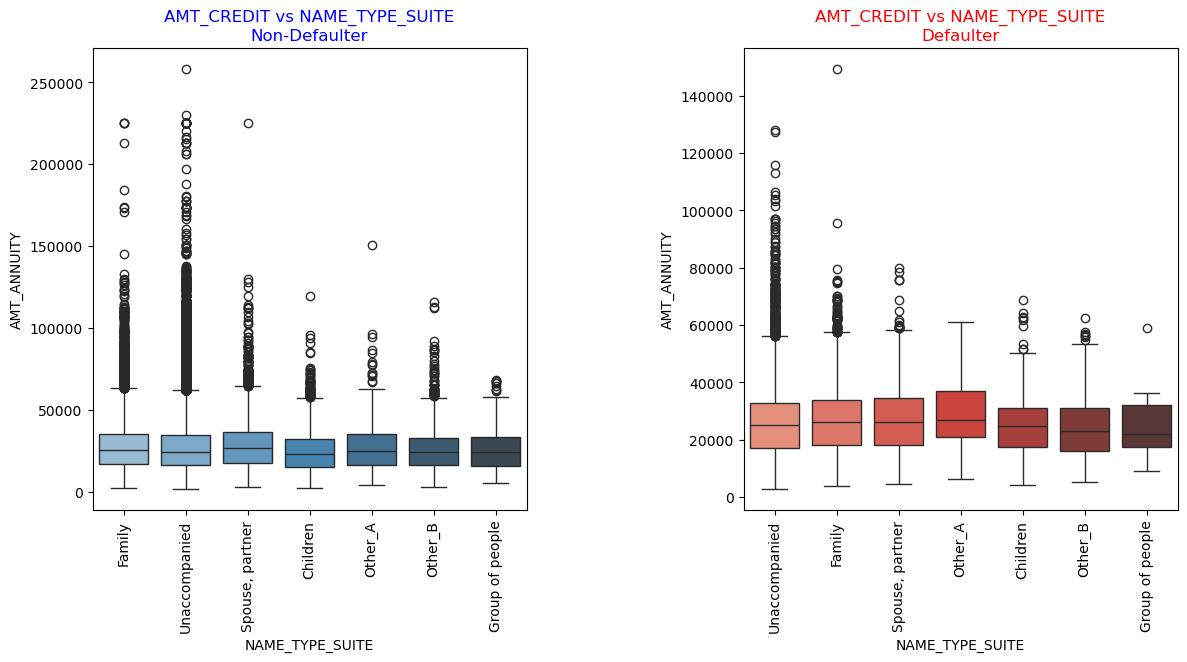

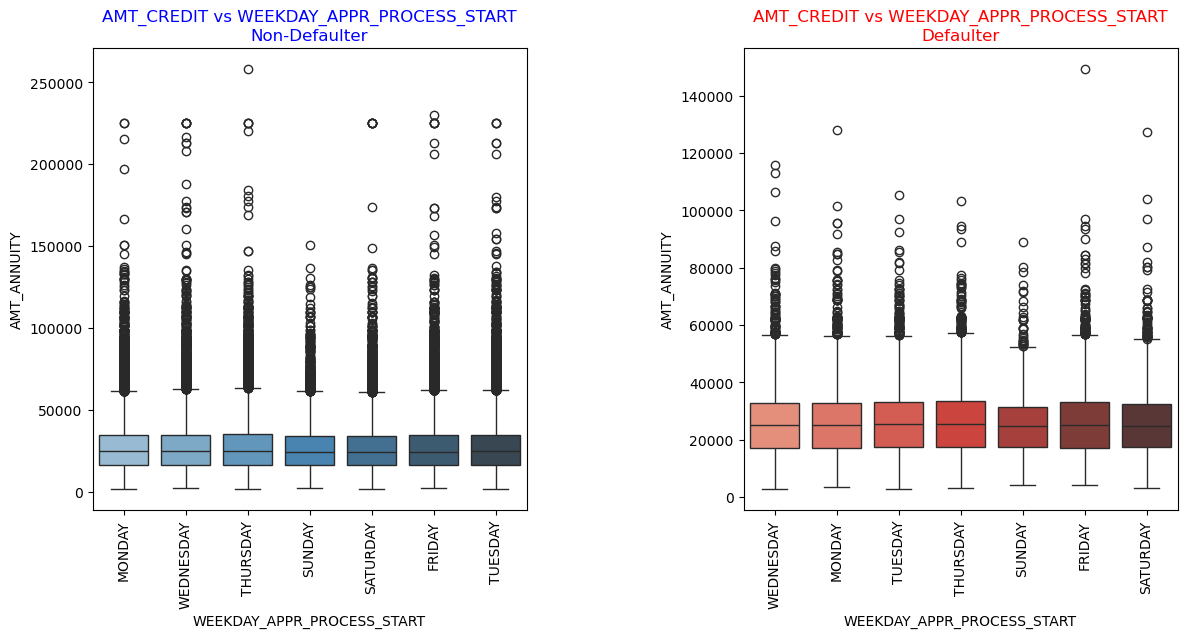

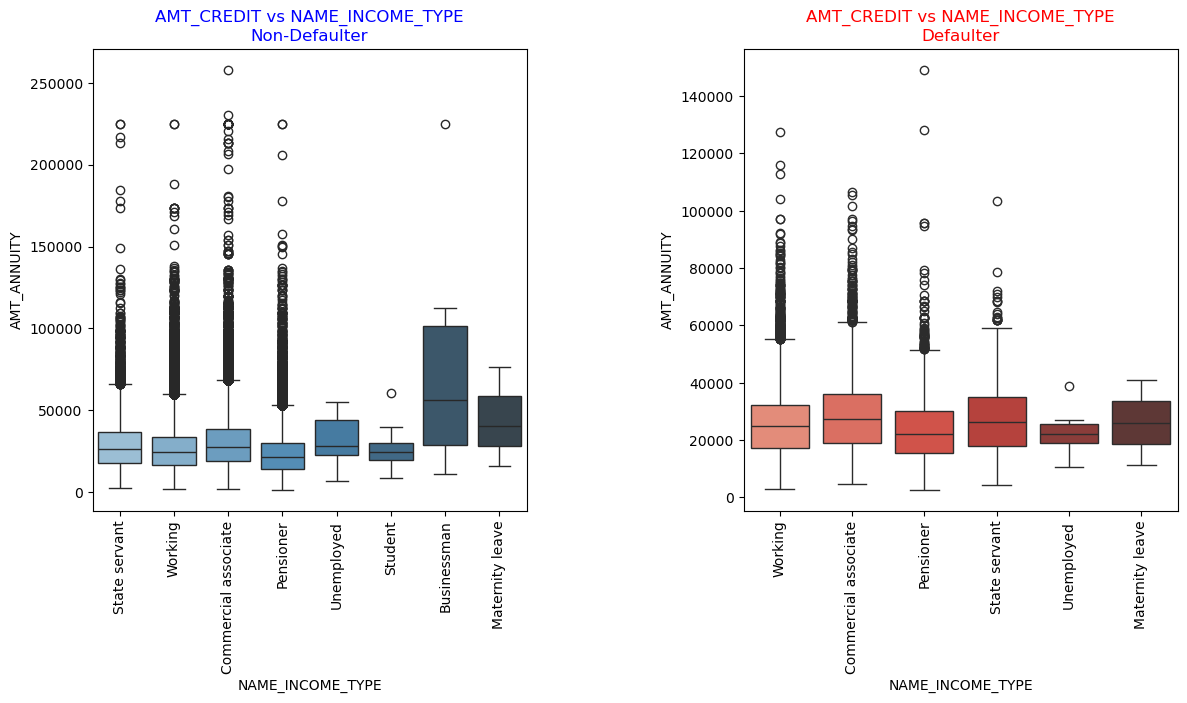

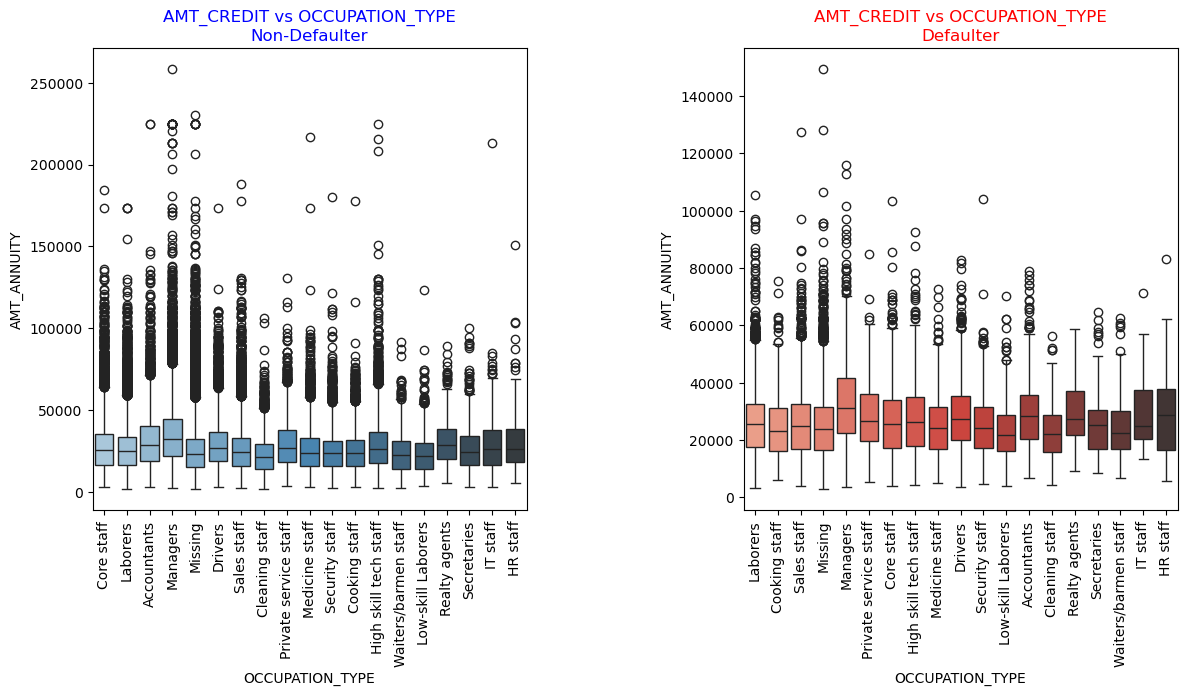

In [103]:
# plotting box plots for all the categorical columns for AMT_ANNUITY
for i,j in enumerate(cat_cols):
    plt.figure(figsize=[14,6])
    plt.subplot(1,2,1)
    sns.boxplot(x = j, y = 'AMT_ANNUITY', data=df_target0, palette='Blues_d')
    plt.title(('AMT_CREDIT vs '+j+'\nNon-Defaulter') , fontdict = {'size':12, 'color':'blue'})
    plt.xticks(rotation=90)
    
    plt.subplot(1,2,2)
    sns.boxplot(x = j, y = 'AMT_ANNUITY', data=df_target1 ,palette='Reds_d')
    plt.title(('AMT_CREDIT vs '+j+'\nDefaulter') , fontdict = {'size':12, 'color':'red'})
    plt.xticks(rotation=90)
    plt.subplots_adjust(wspace=0.5, hspace=0.5)

>#### Observation:
>> 1. There is no annuity amount differnce between genders in both the cases
>> 2. Clients having academic degree with high amount annuity are more likely to be a defaulte
>> 1. There is no annuity amount differnce between other categorical variables in both the cases

>### 3.Categorical-Categorical Bivariate Analysis


 - The 'TARGET' variable represents whether a loan applicant being a defaulter(1) or not(0), then a mean value closer to 1 would indicate a higher likelihood of default for a particular group, while a mean value closer to 0 would indicate a lower likelihood of default.

In [107]:
df['TARGET'] = df['TARGET'].apply(lambda x: 1 if x == 'Defaulter' else 0)

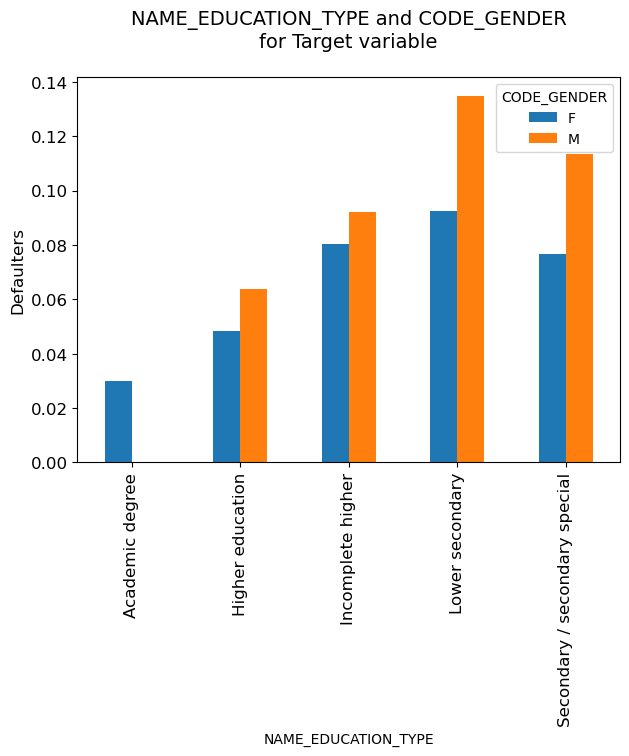

In [108]:
# for NAME_EDUCATION_TYPE and CODE_GENDER 
# Here the y-axis represents the mean value of the target. 

data = df.pivot_table(values='TARGET',index='NAME_EDUCATION_TYPE',columns='CODE_GENDER',aggfunc='mean').plot.bar(figsize=(7,5))
plt.ylabel('Defaulters', fontsize=12)
plt.title("NAME_EDUCATION_TYPE and CODE_GENDER\nfor Target variable\n", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

>#### Observation:
>> - Male who are having 'Lower Secondary' and 'Secondary/Secondary special' education qualification are more likely to be a defaulter
>> - There are no Male Defaulters in Academic degree Educational Qualification

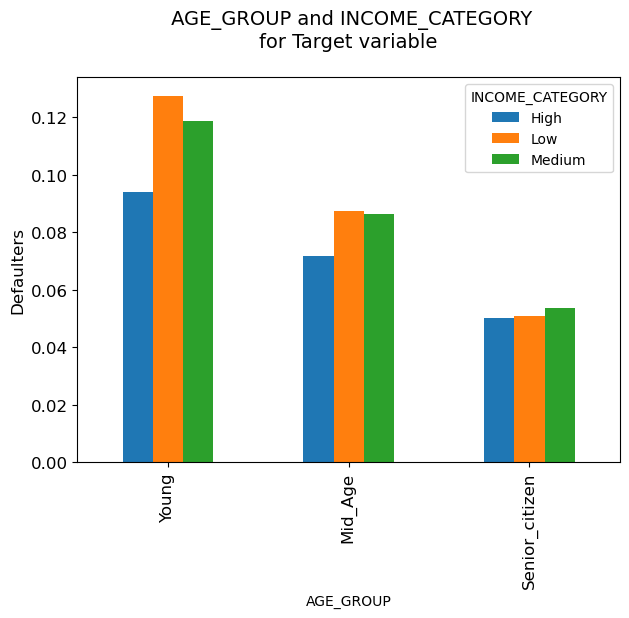

In [110]:
# for AGE_GROUP and INCOME_CATEGORY - 

df.pivot_table(values='TARGET',index='AGE_GROUP',columns='INCOME_CATEGORY',aggfunc='mean').plot.bar(figsize=(7,5))
plt.ylabel('Defaulters', fontsize=12)
plt.title(" AGE_GROUP and INCOME_CATEGORY\nfor Target variable\n", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

>#### Observation:
>> - Young clients with Low Income category are more defaulter
>> - Mid_Age clients with high Income category are less likely to be a defaulter 

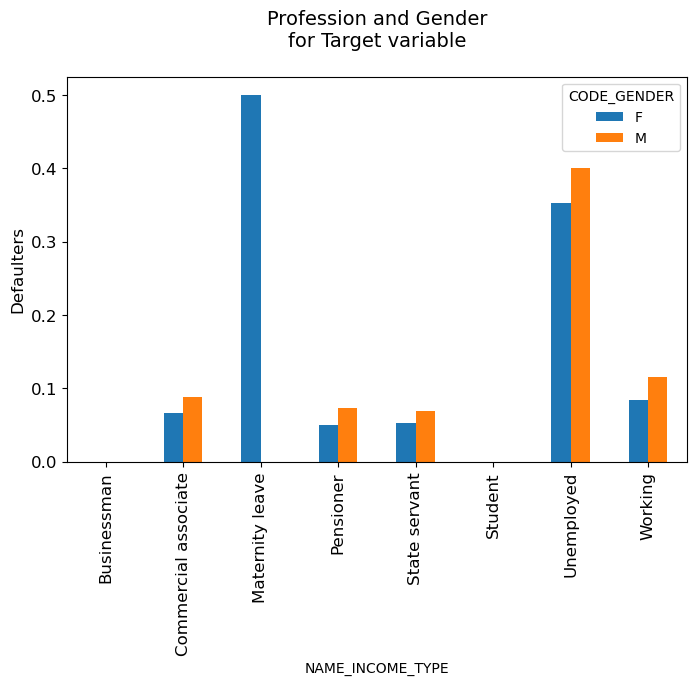

In [112]:
# for NAME_INCOME_TYPE and CODE_GENDER 

df.pivot_table(values='TARGET',index='NAME_INCOME_TYPE',columns='CODE_GENDER',aggfunc='mean').plot.bar(figsize=(8,5))
plt.ylabel('Defaulters', fontsize=12)
plt.title("Profession and Gender\nfor Target variable\n", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

>#### Observation:
>> - Clients having Maternity leave or are Unemploye are more likely to be a defaulter
>> - None of the student or Businessman are defaulter
>> - Males are more defaulted with their respective professions compared to females.

># MULTIVARIATE ANALYSIS

In [115]:
# list of columns to find correlation
corr_cols = ['CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','DAYS_EMPLOYED','CNT_FAM_MEMBERS','EXT_SOURCE_2',
               'EXT_SOURCE_3','REGION_POPULATION_RELATIVE','DAYS_BIRTH']  

<Axes: >

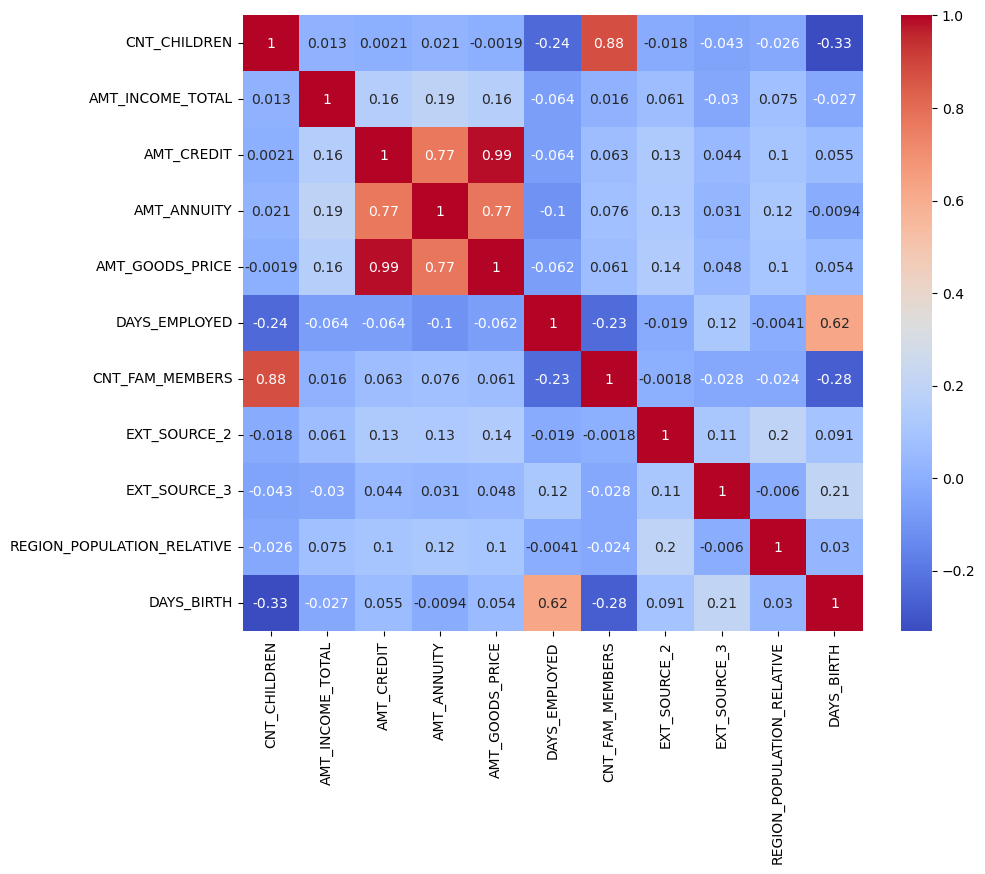

In [116]:
# Plotting heatmap
plt.figure(figsize=[10,8])
sns.heatmap(df[corr_cols].corr() , annot=True , cmap='coolwarm')

>#### Observation:
> - Variables with high correlation:
>> 1. CNT_FAM_MEMBERS & CNT_CHILDREN -> 0.88
>> 2. AMT_GOODS_PRICE & AMT_CREDIT -> 0.99
>> 3. AMT_CREDIT & AMT_ANNUITY -> 0.77
>> 4. AMT_GOODS_PRICE & AMT_ANNUITY -> 0.77
>> 5. DAYS_BIRTH & DAYS_EMPLOYED -> 0.62

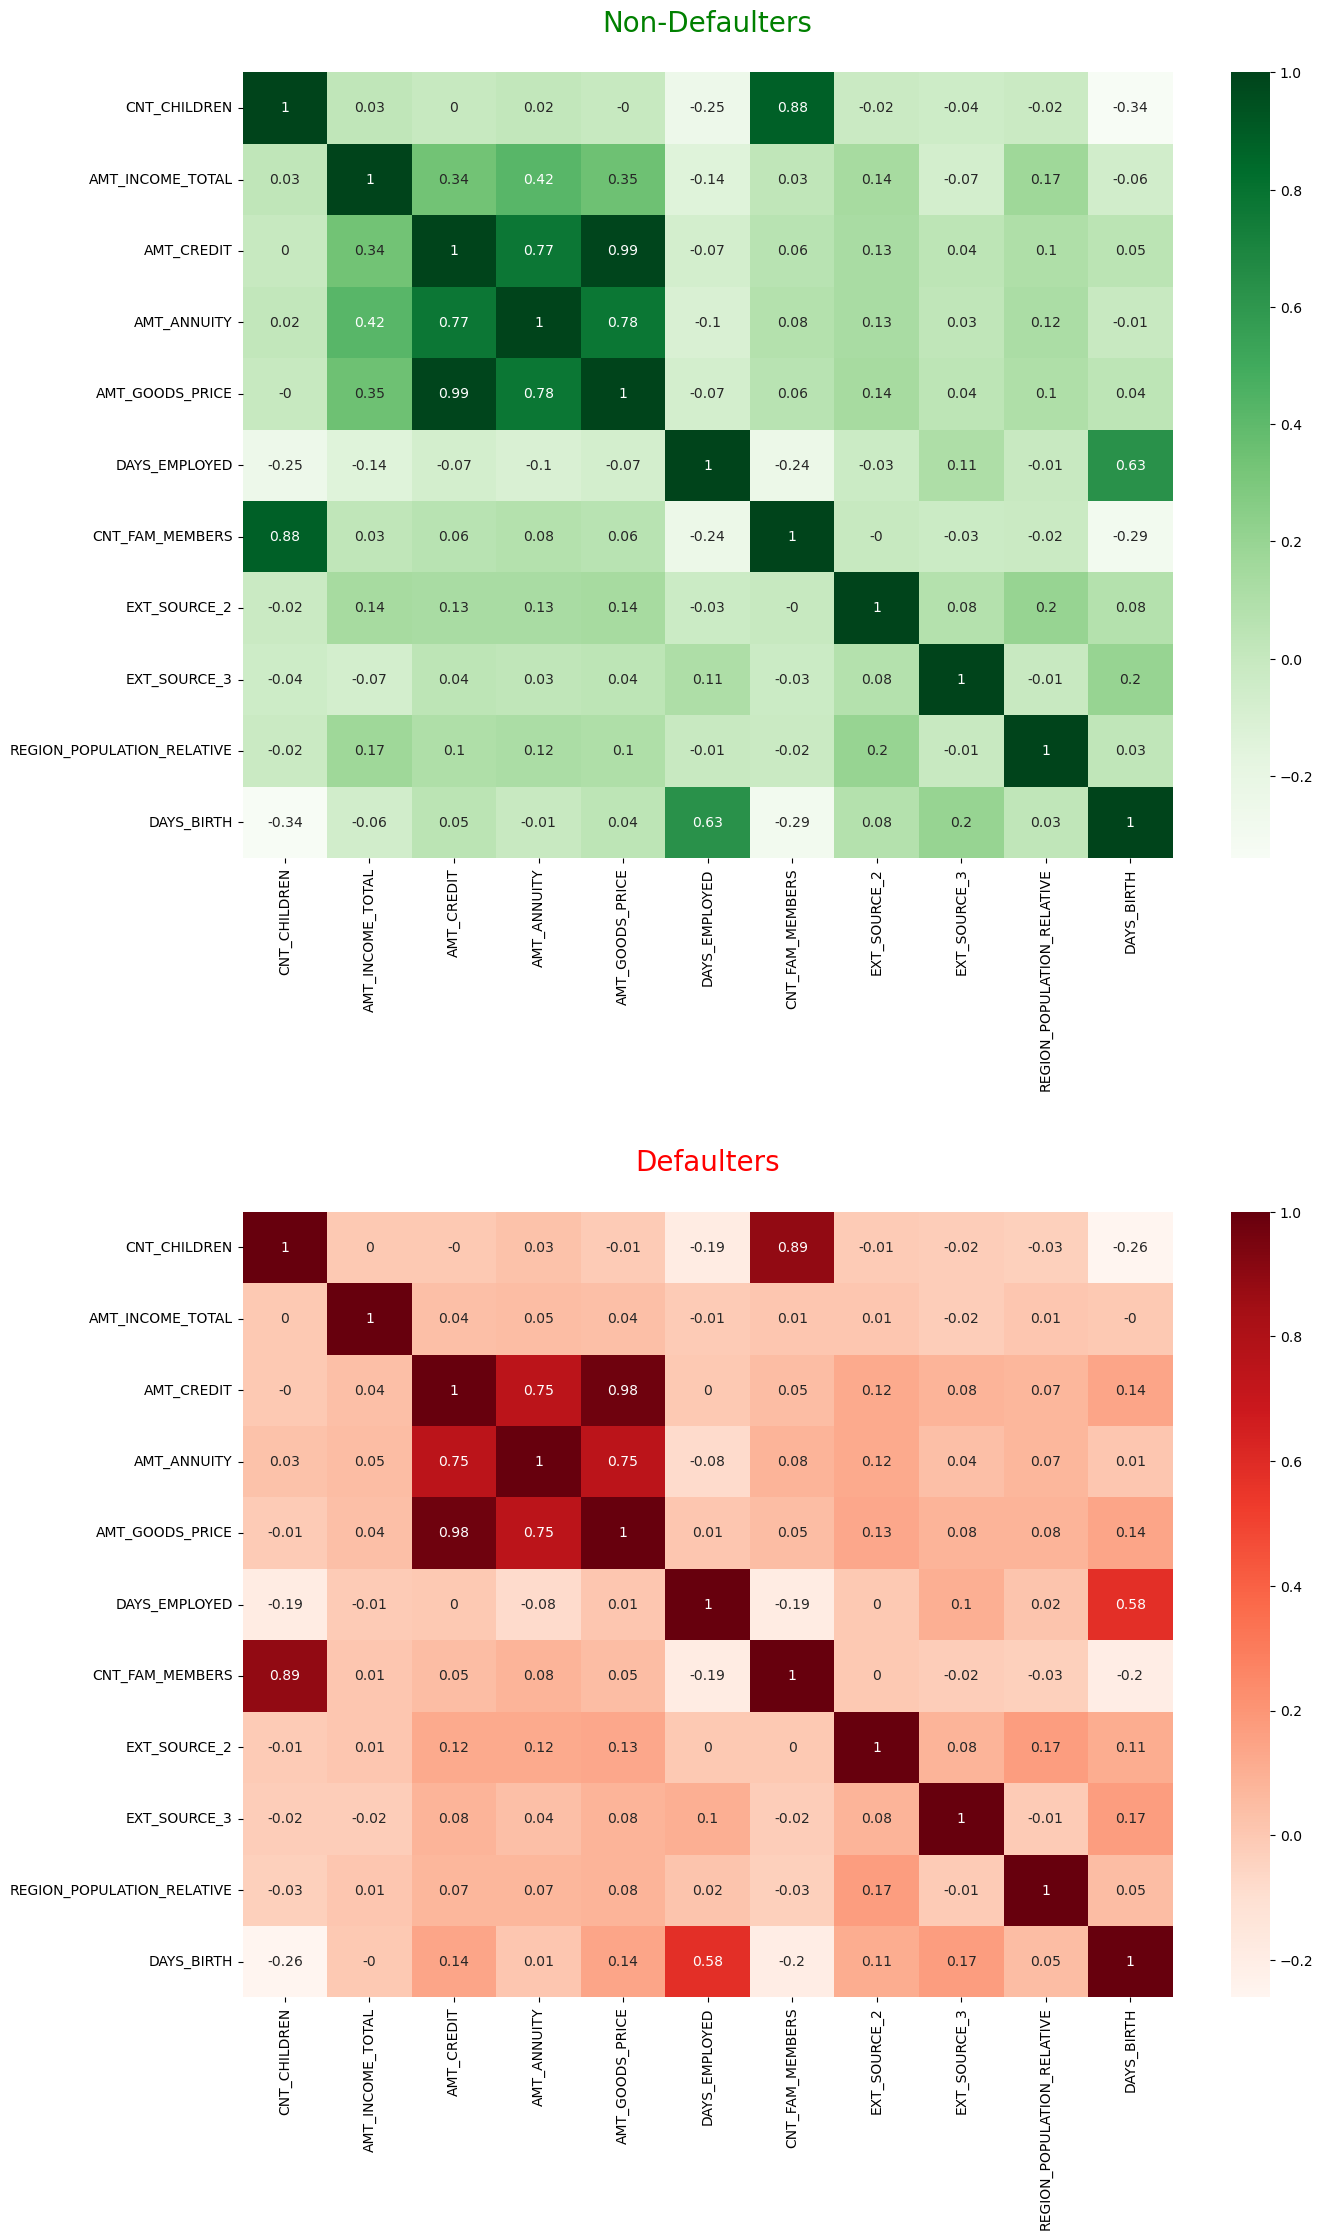

In [118]:
plt.figure(figsize=[15,25])
plt.subplot(2,1,1)
sns.heatmap(round(df_target0[corr_cols].corr(),2) , annot=True , cmap='Greens')
plt.title('Non-Defaulters\n',fontdict={'size':20 , 'color':'Green'})

plt.subplot(2,1,2)
sns.heatmap(round(df_target1[corr_cols].corr(),2) , annot=True , cmap='Reds')
plt.title('Defaulters\n',fontdict={'size':20,'color':'Red'})

plt.subplots_adjust(wspace=0.5, hspace=0.45)

>#### Observation:
> - Variables with high correlation for **Non-Defaulter**:
>> 1. CNT_FAM_MEMBERS & CNT_CHILDREN -> <u> 0.88 </u>
>> 2. AMT_GOODS_PRICE & AMT_CREDIT   -> <u>0.99</u>
>> 3. AMT_CREDIT & AMT_ANNUITY       -> <u>0.77</u>
>> 4. AMT_GOODS_PRICE & AMT_ANNUITY  -> <u>0.78</u>
>> 5. DAYS_BIRTH & DAYS_EMPLOYED     -> <u>0.63</u>

> - Variables with high correlation for **Defaulter**:
>> 1. CNT_FAM_MEMBERS & CNT_CHILDREN -> <u>0.89</u>
>> 2. AMT_GOODS_PRICE & AMT_CREDIT   -> <u>0.98</u>
>> 3. AMT_CREDIT & AMT_ANNUITY       -> <u>0.75</u>
>> 4. AMT_GOODS_PRICE & AMT_ANNUITY  -> <u>0.75</u>
>> 5. DAYS_BIRTH & DAYS_EMPLOYED     -> <u>0.58</u>

In [120]:
# Printing top 10 correlation for Non-Defaulters
correlation=round(df_target0[corr_cols].corr(),2).abs()
correlation=correlation.unstack().sort_values(ascending=False)
correlation=correlation.dropna()
correlation=correlation[correlation!=1.0]
correlation.head(10)

AMT_GOODS_PRICE  AMT_CREDIT         0.99
AMT_CREDIT       AMT_GOODS_PRICE    0.99
CNT_FAM_MEMBERS  CNT_CHILDREN       0.88
CNT_CHILDREN     CNT_FAM_MEMBERS    0.88
AMT_GOODS_PRICE  AMT_ANNUITY        0.78
AMT_ANNUITY      AMT_GOODS_PRICE    0.78
AMT_CREDIT       AMT_ANNUITY        0.77
AMT_ANNUITY      AMT_CREDIT         0.77
DAYS_BIRTH       DAYS_EMPLOYED      0.63
DAYS_EMPLOYED    DAYS_BIRTH         0.63
dtype: float64

In [121]:
# Printing top 10 correlation for Defaulters
correlation=round(df_target1[corr_cols].corr(),2).abs()
correlation=correlation.unstack().sort_values(ascending=False)
correlation=correlation.dropna()
correlation=correlation[correlation!=1.0]
correlation.head(10)

AMT_GOODS_PRICE  AMT_CREDIT         0.98
AMT_CREDIT       AMT_GOODS_PRICE    0.98
CNT_FAM_MEMBERS  CNT_CHILDREN       0.89
CNT_CHILDREN     CNT_FAM_MEMBERS    0.89
AMT_CREDIT       AMT_ANNUITY        0.75
AMT_GOODS_PRICE  AMT_ANNUITY        0.75
AMT_ANNUITY      AMT_GOODS_PRICE    0.75
                 AMT_CREDIT         0.75
DAYS_BIRTH       DAYS_EMPLOYED      0.58
DAYS_EMPLOYED    DAYS_BIRTH         0.58
dtype: float64

# <b> _Conclusion_

#### As data was highly imbalanced so the insights that we get from it aren't much conclusive but still there are few key factor that we can consider:
> **Education -** It is observed that people with higher education level are least likely to be a defaulter so Bank should be more focusing on clients having Higher education​

> **Age -** Young people(19-30 years old) are observed more likely of being a defaulter so Bank should be less focusing on young clients ​

> **Income -** People having low amount of income are found to be a defaulter. It is expected as people with lower income can't repay their loan​

> **Occupation -** It is observed that none of the business man is defaulter and they takes a loan of higher credit amount so Bank should be more focusing on clients having business​

> **Gender -** Among male and female it is observed that males are more likely to be a defaulters​

#### Top Major variables to consider:
> 1. NAME_EDUCATION_TYPE
> 2. AMT_INCOME_TOTAL
> 3. DAYS_BIRTH
> 4. AMT_CREDIT
> 5. DAYS_EMPLOYED
> 6. AMT_ANNUITY
> 7. NAME_INCOME_TYPE
> 8. CODE_GENDER